<a href="https://colab.research.google.com/github/kairamilanifitria/Thesis/blob/main/Visualized_SQUAD_BERTScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 550.4 kB/s eta 0:00:00


## Super_Bowl_50 ##

In [2]:
# Ground Truth
references = ["six",
"45",
"10",
"27",
"Greg Olsen",
"45",
"99.4",
"77",
"receivers",
"Jonathan Stewart",
"six",
"Cam Newton",
"3,837",
"45",
"six",
"500",
"3,837",
"45",
"99.4",
"39"
]



In [3]:
# RAG
predictions_rag = ["There were six Pro Bowlers on the Panthers offense.",
"Cam Newton scored a total of 45 touchdowns on the Panthers offense.",
"Cam Newton threw a total of 10 interceptions.",
"Ted Ginn Jr. returned 27 punts.",
"Greg Olsen started at tight end for the Panthers.",
"The record number of touchdowns Cam Newton has had is 45, with 35 passing touchdowns and 10 rushing touchdowns.",
"The highest quarterback rating that Cam Newton holds is 99.4.",
"The given context does not provide information about the most passes that Greg Olsen has had in a season.",
"Jerricho Cotchery plays as a wide receiver.",
"The Panthers RB who scored 6 TDs in the 13 games leading up to Super Bowl 50 was Jonathan Stewart.",
"There were six offensive players from the Panthers who were selected to play in the Pro Bowl.",
"The quarterback for the Carolina Panthers is Cam Newton.",
"Cam Newton threw for 3,837 yards in 2015.",
"Cam Newton had a total of 35 passing touchdowns and 10 rushing touchdowns in the 2015 season, making a total of 45 touchdowns.",
"Jonathan Stewart had six touchdowns in 13 games.",
"Carolina led the NFL in scoring with 500 points for offensive plays.",
"Cam Newton accumulated 3,837 passing yards in the 2015 season.",
"Cam Newton had a total of 45 touchdowns in the 2015 season.",
"Newton's quarterback rating for the 2015 season was 99.4.",
"Jerricho Cotchery had 39 receptions for the 2015 season."
]

In [4]:
# Others
predictions_other = ["The Panthers offense had a total of six Pro Bowl selections.",
"Cam Newton recorded a career-high and league-leading 45 total touchdowns, with 35 passing touchdowns and 10 rushing touchdowns.",
"The provided sources do not mention the number of interceptions thrown by Cam Newton.",
"The provided sources do not mention the number of punts that Ted Ginn Jr. returned.",
"The starting tight end for the Panthers was Greg Olsen, who had a career-high 77 receptions for 1,104 yards and seven touchdowns.",
"Cam Newton recorded a career-high and league-leading 45 total touchdowns in the mentioned season. This includes 35 passing touchdowns and 10 rushing touchdowns.",
"The provided sources do not mention Cam Newton's best QB ranking.",
"Greg Olsen caught a career-high 77 passes in the mentioned season.",
"Jerricho Cotchery played as a wide receiver for the Panthers offense in the mentioned season.",
"Jonathan Stewart, the Panthers running back, scored six touchdowns in the 13 games leading up to Super Bowl 50",
"The Panthers offense had a total of six players selected to play in the Pro Bowl. Additional Information: The Pro Bowl selections from the Panthers offense included: Pro Bowl quarterback Cam Newton Tight end Greg OlsenWide receiver Ted Ginn, Jr. Veteran Jerricho Cotchery Rookie Devin Funchess Second-year receiver Corey Brown",
"Cam Newton is the quarterback for the Carolina Panthers.",
"Newton threw for 3,837 yards in 2015",
"Newton had a total of 45 touchdowns in 2015",
"Jonathan Stewart had six touchdowns in 13 games in 2015",
"The provided sources do not contain information about the number of points that the Carolina Panthers led the NFL in scoring for offensive plays.",
"Cam Newton threw for 3,837 yards in the 2015 season",
"Cam Newton recorded a career-high and league-leading 45 total touchdowns (35 passing, 10 rushing) in the 2015 season",
"Cam Newton had a career-best quarterback rating of 99.4 in the 2015 season",
"Jerricho Cotchery had 39 receptions for the 2015 season"
]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


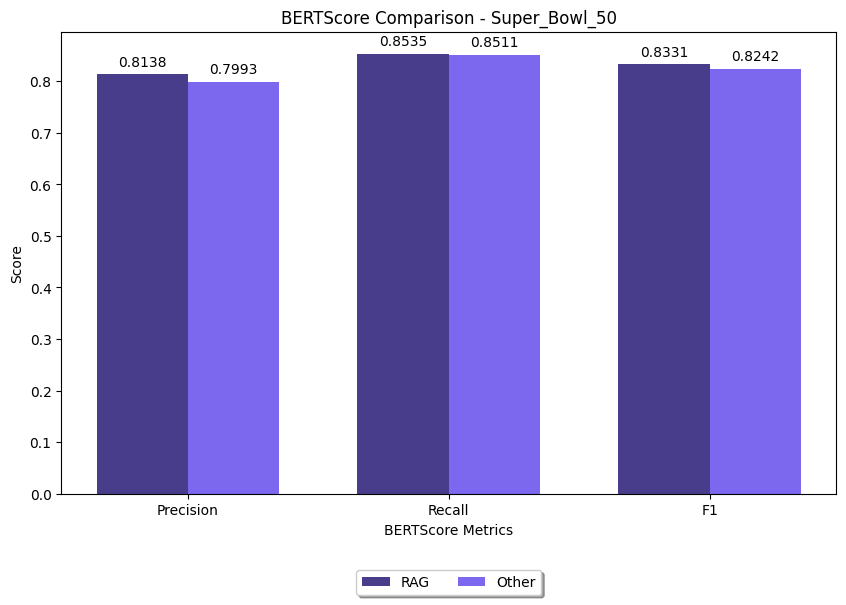

In [5]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Super_Bowl_50')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Warsaw ##

In [6]:
# Ground Truth
references = ["Nobel Prize",
"1745",
"Maria Skłodowska-Curie",
"Famous musicians",
"seven months old"
]

In [7]:
# RAG
predictions_rag = ["Maria Skłodowska-Curie was the first female recipient of the Nobel Prize.",
"Casimir Pulaski was born in Warsaw in the year 1745.",
"One of the most famous people born in Warsaw is Maria Skłodowska-Curie.",
"Frédéric Chopin was a famous musician, composer, and pianist. He was born in the village of Żelazowa Wola, Poland in 1810 and later moved to Warsaw with his family. Chopin is known for his compositions for the piano, including his numerous nocturnes, waltzes, and études. He is considered one of the greatest composers for the piano in the Romantic era.",
"Chopin moved to Warsaw with his family when he was seven months old."
]

In [8]:
# Others
predictions_other = ["Maria Curie was the first female recipient of the Nobel Prize.",
"Casimir Pulaski was born in 1745 in Warsaw.",
"One of the most famous people born in Warsaw was Maria Skłodowska-Curie",
"Frédéric Chopin was a famous musician born in Warsaw. He was a renowned composer and pianist, known for his contributions to the Romantic era of classical music. Chopin was born in the village of Żelazowa Wola, but he moved to Warsaw with his family when he was seven months old. He is considered one of the greatest composers in history, particularly known for his compositions for the piano. His works often showcased his technical skill and emotional depth, with pieces ranging from delicate and introspective to passionate and virtuosic. Chopin's music continues to be widely performed and admired today, and he remains an important figure in the world of classical music.",
"Frédéric Chopin moved to Warsaw with his family when he was seven months old."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


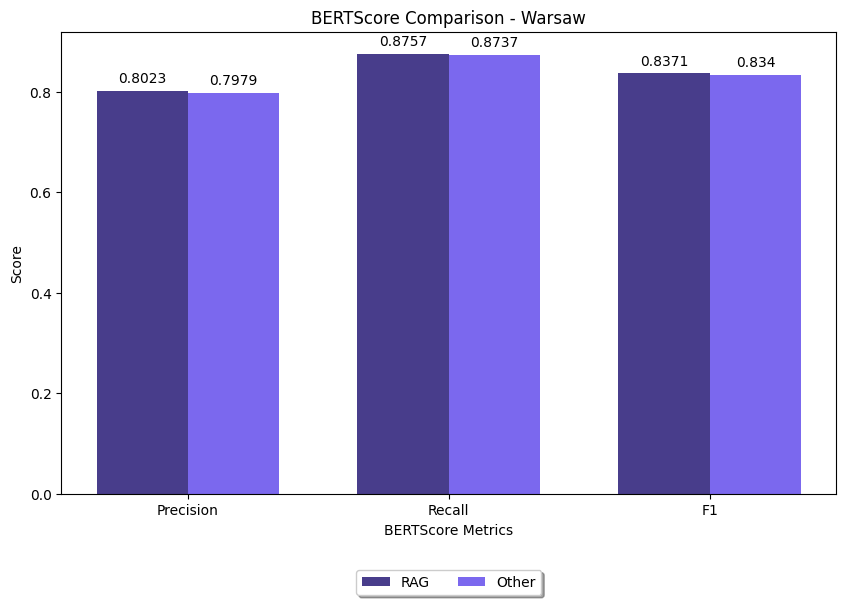

In [9]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Warsaw')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Normans ##

In [10]:
# Ground Truth
references = ["France",
"10th and 11th centuries",
"Denmark, Iceland and Norway",
"Rollo",
"10th century"
]

In [11]:
# RAG
predictions_rag = ["Normandy is located in France.",
"The Normans were in Normandy in the 10th and 11th centuries.",
"The Norse originated from Denmark, Iceland, and Norway.",
"The Norse leader was Rollo.",
"The Normans first gained their separate identity in the first half of the 10th century."
]

In [12]:
# Others
predictions_other = ["Normandy is located in France.",
"The Normans were in Normandy in the 10th and 11th centuries.",
"The Norse originated from Denmark, Iceland, and Norway.",
"The Norse leader who played a significant role in the emergence of the Normans was Rollo. Rollo was a Norse raider and pirate from Denmark, Iceland, or Norway, depending on the source . He led a group of Norsemen who agreed to swear fealty to King Charles III of West Francia in the 10th century . This agreement allowed them to settle in the region of Normandy, which eventually became their namesake . Rollo's leadership and the subsequent assimilation and mixing of the Normans with the native Frankish and Roman-Gaulish populations contributed to the development of the distinct cultural and ethnic identity of the Normans over the centuries",
"The Normans first gained their separate identity in the first half of the 10th century. The distinct cultural and ethnic identity of the Normans emerged during this period and continued to evolve over the succeeding centuries. The Normans were originally descended from Norse raiders and pirates from Denmark, Iceland, and Norway, who settled in the region of Normandy under the leadership of Rollo. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, the Normans gradually merged with the Carolingian-based cultures of West Francia. This process of assimilation and cultural evolution contributed to the development of the Normans' unique identity as a separate group within the broader context of medieval Europe."
                     ]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


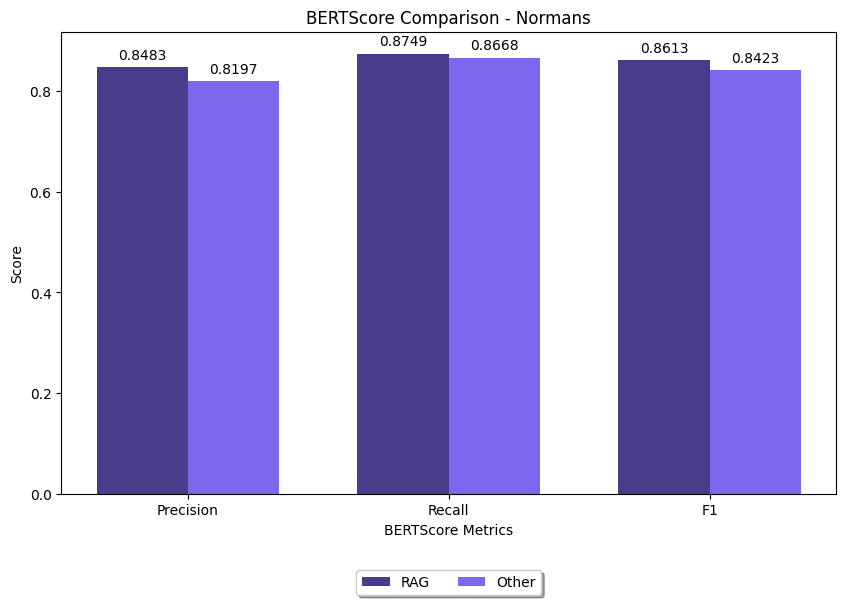

In [13]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Normans')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Nikola_Tesla #

In [14]:
# Ground Truth
references = ["1893",
"high-voltage",
"mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging",
"Colorado Springs",
"1893",
"boat",
"Wardenclyffe Tower project"
]

In [15]:
# RAG
predictions_rag = ["Tesla made pronouncements on the possibility of wireless communication with his devices in 1893.",
"Tesla's experiments were conducted with high-voltage.",
"Some of Tesla's experiments included high-voltage, high-frequency power experiments, wireless lighting and electricity distribution experiments, experiments with mechanical oscillators/generators, electrical discharge tubes, early X-ray imaging, and the construction of a wireless controlled boat.",
"Tesla conducted experiments in both New York and Colorado Springs.",
"Tesla first mentioned the possibility of wireless communication with his devices in 1893.",
"Tesla built a wireless controlled boat.",
"His unfinished project was called the Wardenclyffe Tower."
                   ]

In [16]:
# Others
predictions_other = ["Tesla discovered the possibility of wireless connectivity in his high-voltage, high-frequency power experiments in New York and Colorado Springs, and made early pronouncements on the possibility of wireless communication with his devices in 1893",
"Tesla discovered the possibility of wireless connectivity in his high-voltage, high-frequency power experiments in New York and Colorado Springs, and made early pronouncements on the possibility of wireless communication with his devices in 1893.",
"Tesla's Experiments: Tesla conducted high-voltage, high-frequency power experiments in New York and Colorado Springs, focusing on wireless lighting and electricity distribution. He made early pronouncements in 1893 about the possibility of wireless communication with his devices. Tesla conducted experiments with mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging in his lab. He built a wireless controlled boat, which was one of the first ever exhibited. ",
"Tesla's Experiments in Locations Other Than New York: Tesla conducted experiments in Colorado Springs, where he continued his high-voltage, high-frequency power experiments and explored wireless lighting and electricity distribution. Tesla also conducted experiments in his lab, which included working with mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging. Additionally, Tesla built a wireless controlled boat, which was one of the first ever exhibited. ",
"Tesla first mentioned the possibility of wireless communication with his devices in 1893. ",
"Tesla built a wireless controlled boat, which was one of the first ever exhibited.",
"Tesla's unfinished project was called the Wardenclyffe Tower project, which was an ill-fated attempt at intercontinental wireless transmission."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


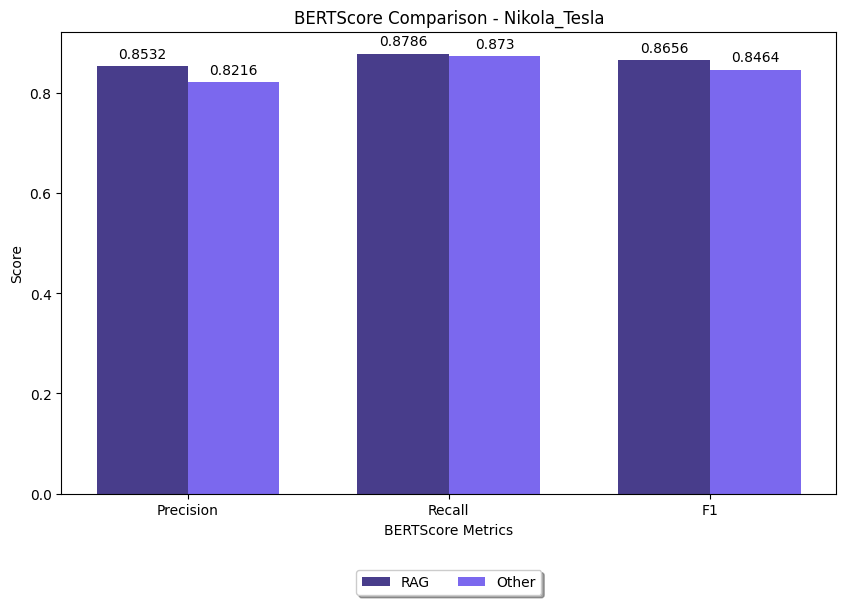

In [17]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Nikola_Tesla')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Computational_complexity_theory ##

In [18]:
# Ground Truth
references = ["Computational complexity theory",
"inherent difficulty",
"computational problem"
]

In [19]:
# RAG
predictions_rag = ["The branch of theoretical computer science that deals with broadly classifying computational problems by difficulty and class of relationship is computational complexity theory.",
"Computational problems are classified utilizing computational complexity theory based on their inherent difficulty.",
"The term for a task that is generally well-suited for computer-based solutions is a computational problem."
]

In [20]:
# Others
predictions_other = ["Computational complexity theory is the branch of theoretical computer science that deals with broadly classifying computational problems by difficulty and class of relationship",
"Computational problems are classified utilizing computational complexity theory based on their inherent difficulty",
"The term for a task that generally lends itself to being solved by a computer is a computational problem"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


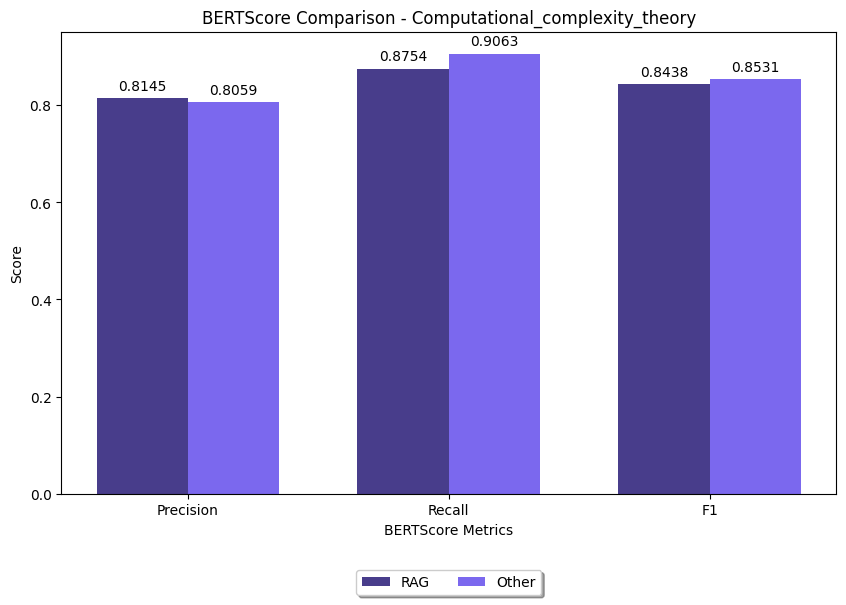

In [21]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Computational_complexity_theory')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Teacher ##

In [22]:
# Ground Truth
references = ["the curriculum",
"pedagogy",
"university or college",
"lesson plan",
"school"
]

In [23]:
# RAG
predictions_rag = ["A course of study is called the curriculum.",
"The science of teaching is called pedagogy.",
"Most teachers typically obtain their credentials from a university or college.",
"A teacher can use a lesson plan to facilitate student learning.",
"A teacher is most likely to be teaching at a school or another place of formal education."
]

In [24]:
# Others
predictions_other = ["A course of study is called the curriculum",
"The science of teaching is also known as pedagogy",
"Most teachers obtain their credentials from universities or colleges",
"Teachers can use various tools and strategies to help students learn: Lesson plans: Teachers can create lesson plans to provide a structured course of study for students, guiding their learning process . Curriculum: Teachers can use the curriculum, which is a set of educational materials and objectives, to design their teaching approach and ensure that students are exposed to the necessary content and skills . Teaching methods: Teachers can employ different teaching methods such as lectures, discussions, group work, and hands-on activities to engage students and facilitate their learning . Technology: Teachers can integrate technology into their teaching, using tools like interactive whiteboards, educational software, and online resources to enhance student learning experiences . Assessment: Teachers can use various assessment methods, such as tests, quizzes, projects, and presentations, to evaluate student understanding and provide feedback for improvement. Overall, teachers have a range of resources and strategies at their disposal to support student learning and promote academic growth.",
"Teachers are most likely to be teaching at schools or other formal educational institutions"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


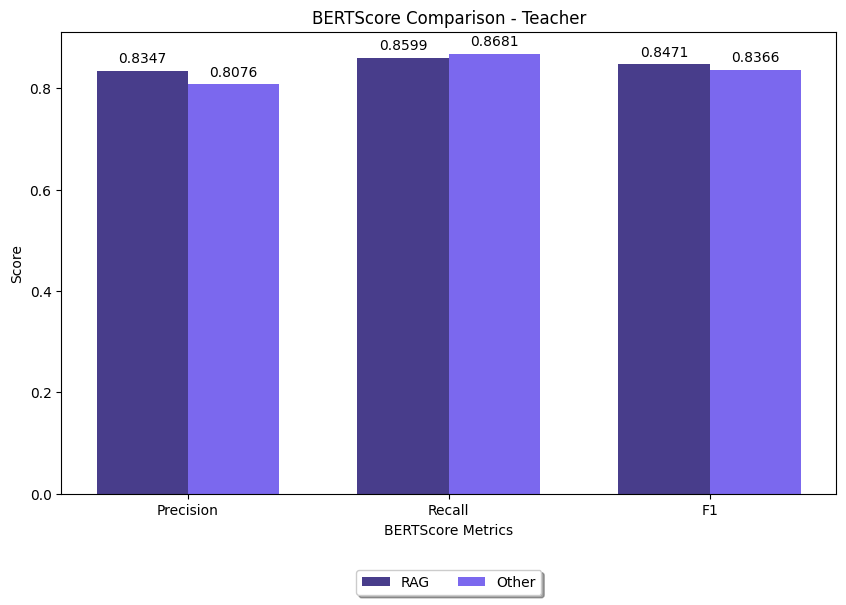

In [25]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Teacher')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Martin_Luther ##

In [26]:
# Ground Truth
references = ["10 November 1483",
"Eisleben, Saxony",
"Holy Roman Empire",
"Catholic",
"lawyer"
]

In [27]:
# RAG
predictions_rag = ["Martin Luther was born on November 10, 1483.",
"Martin Luther was born in Eisleben, Saxony, which was part of the Holy Roman Empire at the time.",
"Saxony belonged to the region of the Holy Roman Empire.",
"Martin Luther was baptized as a Catholic.",
"Martin's father, Hans Luther, wanted his son to become a lawyer."
]

In [28]:
# Others
predictions_other = ["Martin Luther was born on 10 November 1483 in Eisleben, Saxony, which was part of the Holy Roman Empire.",
"Martin Luther was born in Eisleben, Saxony, which was part of the Holy Roman Empire.",
"Saxony was a part of the Holy Roman Empire during the time of Martin Luther's birth",
"Martin Luther was baptized as a Catholic.",
"Martin Luther's father wanted his son to become a lawyer."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


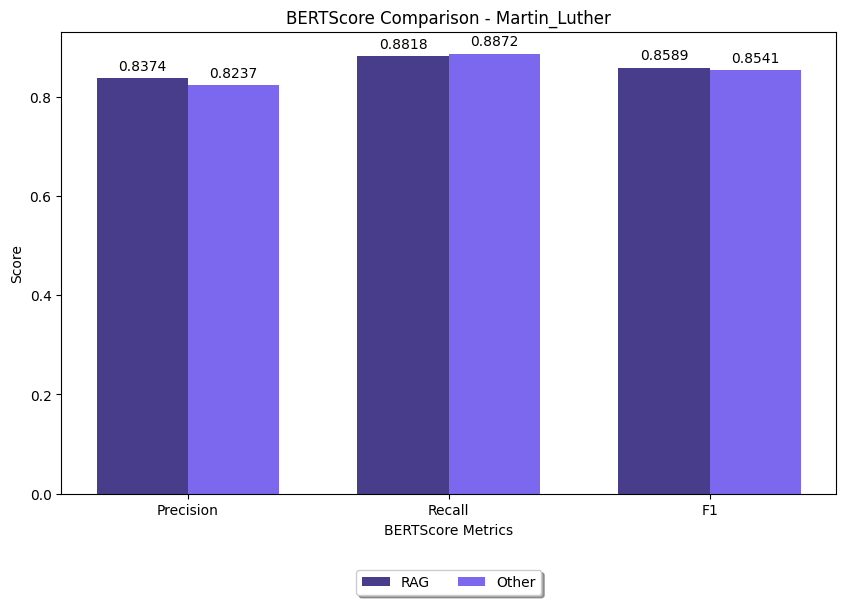

In [29]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Martin_Luther')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Southern_California ##

In [30]:
# Ground Truth
references = ["Pacific",
"seven",
"over 12 million inhabitants",
"San Diego",
"17.5 million"
]

In [31]:
# RAG
predictions_rag = ["Southern California touches the Pacific coast.",
"Southern California's population encompasses seven metropolitan areas.",
"The population of the Los Angeles area is over 12 million inhabitants.",
"The San Diego area has the least number of inhabitants among the three heavily populated areas.",
"The Greater Los Angeles Area has over 17.5 million people."
]

In [32]:
# Others
predictions_other = ["Southern California touches the Pacific coastline",
"Southern California's population encompasses seven metropolitan areas",
"The Los Angeles area contains over 12 million inhabitants",
"Heavily Populated Areas in Southern California: Los Angeles area has over 12 million inhabitants. Riverside-San Bernardino area has over four million inhabitants. San Diego area has over 3 million inhabitants. Therefore, the San Diego area has the least number of inhabitants among the three heavily populated areas in Southern California.",
"Population of the Greater Los Angeles Area: The Greater Los Angeles Area is made up of five counties: Los Angeles, Orange, Riverside, San Bernardino, and Ventura. It has a population of over 17.5 million people. The Greater Los Angeles Area is the most populous metropolitan area in California and the second most populous in the United States, after the New York metropolitan area. The Greater Los Angeles Area includes the heavily built-up urban area stretching along the Pacific coast from Ventura, through the Greater Los Angeles Area and the Inland Empire, and down to Greater San Diego. Southern California, which includes the Greater Los Angeles Area, has a population of over 22 million people, accounting for roughly 60 percent of California's population. The Greater Los Angeles Area is a major economic center and cultural hub, attracting millions of residents and visitors each year. The Greater Los Angeles Area is known for its diverse population, vibrant entertainment industry, and iconic landmarks such as Hollywood and Disneyland."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


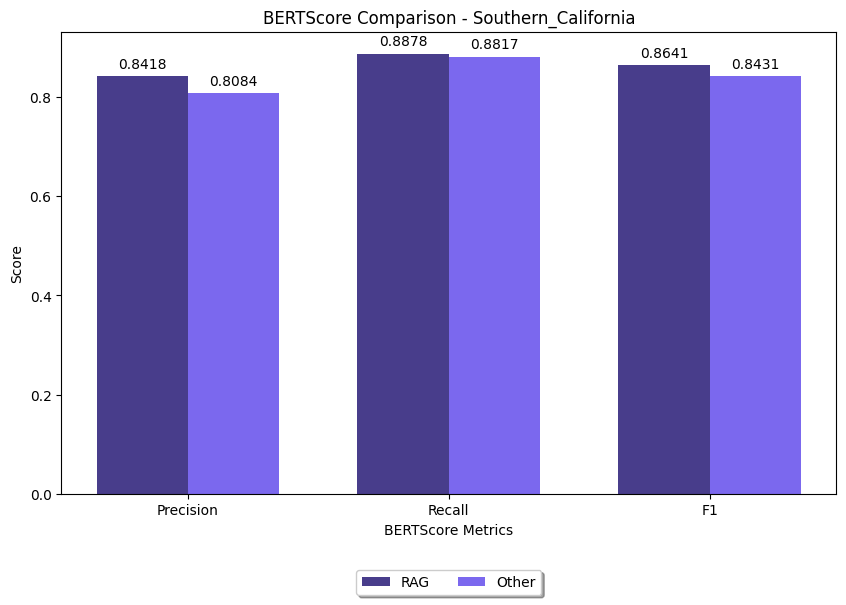

In [33]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Southern_California')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Sky_(United_Kingdom)

In [34]:
# Ground Truth
references = ["Sky+ PVR",
"September 2007",
"monthly fee",
"January 2010",
"Sky+HD Box"
]

In [35]:
# RAG
predictions_rag = ["BSkyB initially charged additional subscription fees for using a Sky+ PVR with their service.",
"The TV advertising campaign targeting Sky+ at women was launched in September 2007.",
"Customers who do not subscribe to BSkyB's channels can still pay a monthly fee to enable Sky+ functions.",
"The Sky+ Box was discontinued by BSkyB in January 2010.",
"The Sky+ Box was replaced by the Sky+HD Box."
]

In [36]:
# Others
predictions_other = ["BSkyB initially charged additional subscription fees for using a Sky+ PVR with their service.",
"Sky launched a TV advertising campaign targeting Sky+ at women in September 2007.",
"Customers who do not subscribe to BSkyB's channels can still pay a monthly fee to enable Sky+ functions.",
"BSkyB discontinued the Sky+ Box in January 2010.",
"BSkyB discontinued the Sky+ Box in January 2010. The Sky+HD Box replaced the Sky+ Box as the standard offering for new subscribers. In February 2011, BSkyB discontinued the non-HD variant of its Multiroom box and started offering a smaller version of the SkyHD box without Sky+ functionality. Therefore, the Sky+HD Box replaced the Sky+ Box as the standard offering, while a smaller version of the SkyHD box without Sky+ functionality was introduced for Multiroom subscribers."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


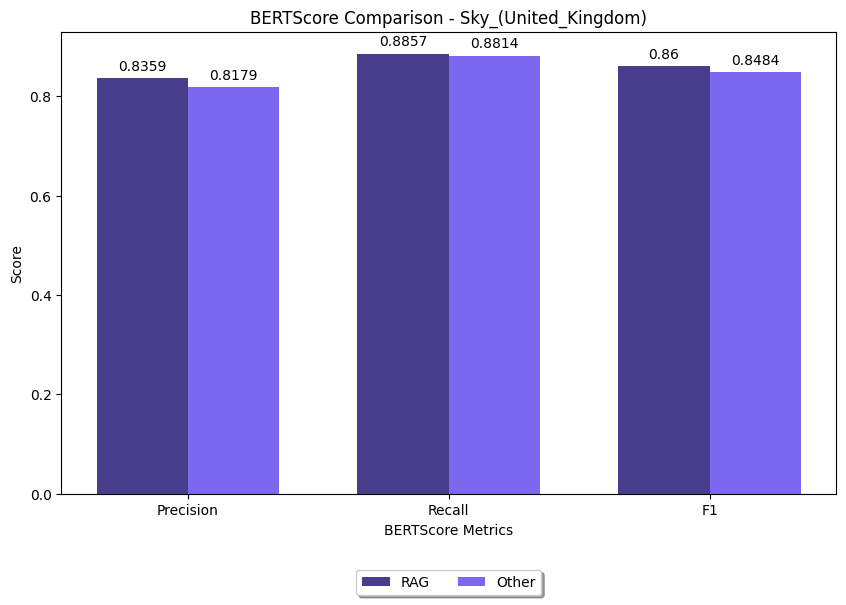

In [37]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Sky_(United_Kingdom)')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Victoria_(Australia)

In [38]:
# Ground Truth
references = ["highly diversified",
"second",
"fourth",
"Melbourne",
"Melbourne Cricket Ground"
]

In [39]:
# RAG
predictions_rag = ["The economy of Victoria is highly diversified, with service sectors such as financial and property services, health, education, wholesale, retail, hospitality, and manufacturing constituting the majority of employment.",
"Victoria is ranked second in terms of gross state product (GSP) among the Australian states.",
"Victoria is ranked fourth in terms of gross state product (GSP) per capita in Australia.",
"The city in Victoria known as the sporting capital of Australia is Melbourne.",
"The largest stadium in Australia is the Melbourne Cricket Ground (MCG)."
]

In [40]:
# Others
predictions_other = ["Victoria has a highly diversified economy, with service sectors such as financial and property services, health, education, wholesale, retail, hospitality, and manufacturing being the major sources of employment . The state's total gross state product (GSP) is ranked second in Australia . However, Victoria is ranked fourth in terms of GSP per capita due to its limited mining activity . Melbourne, the capital of Victoria, is known as the sporting capital of Australia and is home to various museums, art galleries, and theaters . The Melbourne Cricket Ground, the largest stadium in Australia, is considered the spiritual home of Australian cricket and Australian rules football . Victoria also has eight public universities, with the University of Melbourne being the oldest, founded in 1853.",
"Victoria is ranked second in Australia in terms of total gross state product (GSP)",
"Victoria is ranked fourth in Australia in terms of gross state product (GSP) per capita. This is due to its limited mining activity, which affects its overall GSP per capita ranking",
"Melbourne is the city in Victoria that is called the sporting capital of Australia. Melbourne is known for its vibrant sports culture and is home to iconic sporting venues such as the Melbourne Cricket Ground (MCG), which is considered the spiritual home of Australian cricket and Australian rules football. The MCG is the largest stadium in Australia and has hosted major sporting events like the 1956 Summer Olympics and the 2006 Commonwealth Games. It also hosts the grand final of the Australian Football League (AFL) each year, drawing large crowds of over 95,000 people. Melbourne's reputation as the sporting capital is further enhanced by its numerous museums, art galleries, and theaters, making it a hub for sports and cultural activities in Australia.",
"The Melbourne Cricket Ground (MCG) is the largest stadium in Australia. It is located in Melbourne, Victoria. The MCG has a seating capacity of over 95,000 people and is known as the spiritual home of Australian cricket and Australian rules football. It has hosted major sporting events such as the 1956 Summer Olympics and the 2006 Commonwealth Games. The MCG is also the venue for the grand final of the Australian Football League (AFL) each year, which draws large crowds. With its impressive size and historical significance, the MCG is a prominent landmark in Melbourne and plays a significant role in the city's reputation as the sporting capital of Australia."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


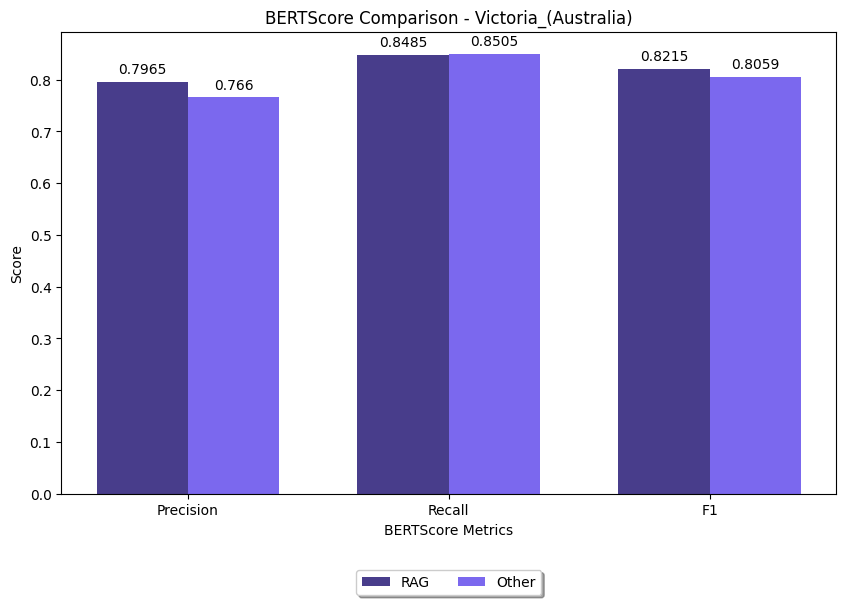

In [41]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Victoria_(Australia)')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Huguenot

In [42]:
# Ground Truth
references = ["derision",
"Geneva",
"Besançon Hugues",
"Amboise plot",
"1560"
]

In [43]:
# RAG
predictions_rag = ["The term Huguenot was originally meant to confer a derogatory nickname.",
"The Swiss city that was the center of the Calvinist movement was Geneva.",
"The term Huguenot may be related to the Swiss politician Besançon Hugues.",
"The name given to the plot to usurp power from the French House of Guise was the Amboise plot of 1560.",
"The attempt referred to as the Amboise plot took place in 1560."
]

In [44]:
# Others
predictions_other = ["The term Huguenot was originally meant to confer: The term Huguenot was originally used as a nickname for the conspirators involved in the Amboise plot of 1560, which was a failed attempt to seize power in France from the House of Guise. This nickname was given to them because they were aristocratic members of the Reformed Church and were associated with the Protestant cause. The term Huguenot may have originated from a combination of the Swiss politician Besançon Hugues and the Dutch word Huisgenoten, which means housemates. This combination was a clever derogatory pun on the name Hugues and referred to the connotations of the German word Eidgenosse, which means Confederates. This association with Swiss republicanism and independence from the Duke of Savoy through an alliance with the Swiss Confederation further linked the term Huguenot to politics unpopular in France.",
"The Swiss city that was the center of the Calvinist movement was Geneva.",
"The term Huguenot may be related to the Swiss politician Besançon Hugues. The nickname Huguenot is believed to have originated from a combination of Hugues' name and the Dutch word Huisgenoten, which means housemates. This combination was a clever derogatory pun on Hugues name and was used to refer to the connotations of the German word Eidgenosse, which means Confederates. Hugues, although Catholic, was a leader of the Confederate Party in Geneva, which favored independence from the Duke of Savoy through an alliance between Geneva and the Swiss Confederation. The term Huguenot was purportedly first applied in France to the conspirators involved in the Amboise plot of 1560, who were aristocratic members of the Reformed Church and were associated with the Protestant cause.",
"The plot to usurp power from the French House of Guise was called the Amboise plot of 1560. This plot involved conspirators who were aristocratic members of the Reformed Church in France and were associated with the Protestant cause. The aim of the plot was to wrest power from the influential House of Guise and foster relations with the Swiss. The conspirators were labeled as Huguenots, which was a nickname associating the Protestant cause with politics unpopular in France. The term Huguenot is believed to have originated from a combination of the Swiss politician Besançon Hugues' name and the Dutch word Huisgenoten, which means housemates, and was used as a clever derogatory pun",
"The provided sources do not mention any specific date for the Amboise plot of 1560."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


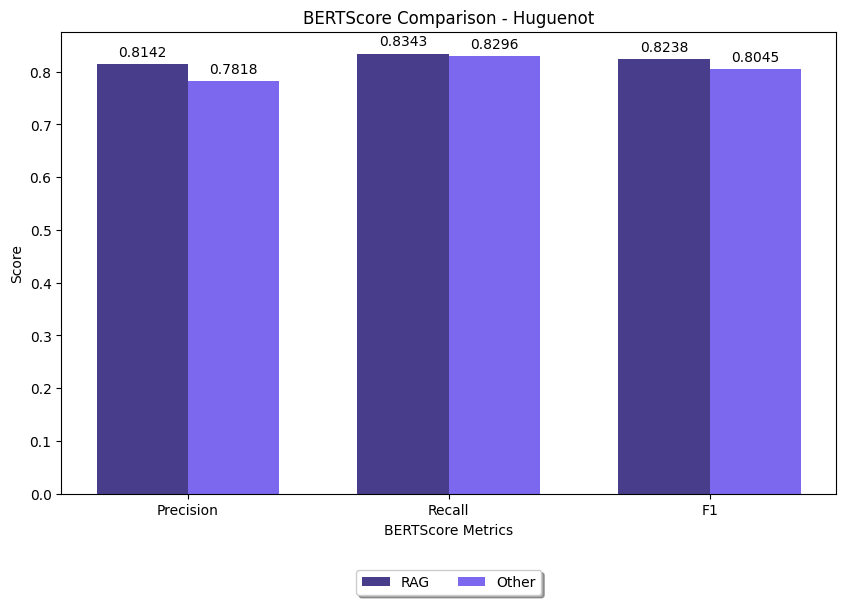

In [45]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Huguenot')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Steam_engine

In [46]:
# Ground Truth
references = ["atmospheric engine",
"Thomas Newcomen",
"1712",
"steam pump",
"Papin"
]

In [47]:
# RAG
predictions_rag = ["The first commercially successful true engine was the atmospheric engine, invented by Thomas Newcomen around 1712.",
"The atmospheric engine was invented by Thomas Newcomen.",
"The atmospheric engine was invented around 1712.",
"Savery invented the steam pump.",
"The piston was proposed by Denis Papin."
]

In [48]:
# Others
predictions_other = ["The first commercially successful true engine was the atmospheric engine, invented by Thomas Newcomen around 1712.",
"Thomas Newcomen was the inventor of the atmospheric engine.",
"The atmospheric engine was invented around 1712.",
"Savery invented the steam pump, which was an earlier version of the atmospheric engine.",
"Thomas Newcomen conceptualized the use of a piston in the atmospheric engine, which was an improvement over Savery's steam pump."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


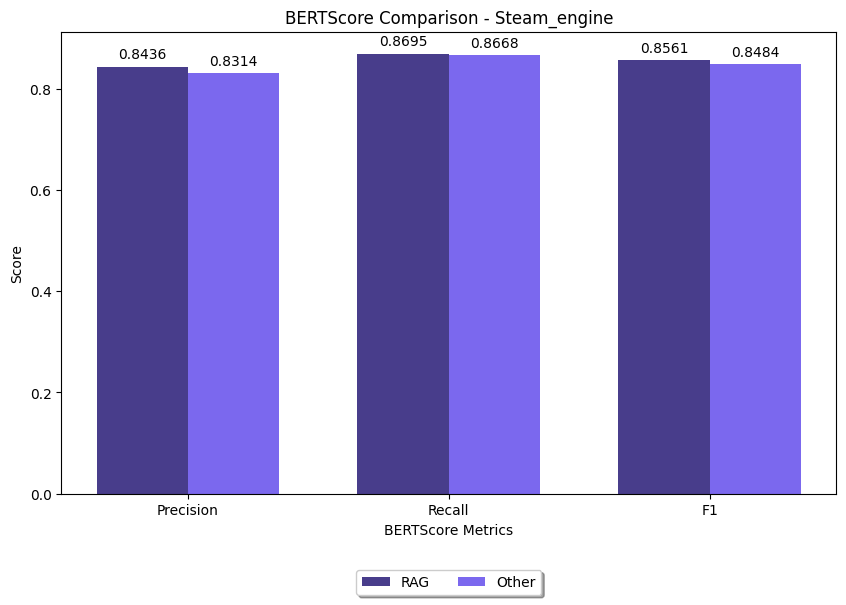

In [49]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Steam_engine')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Oxygen

In [50]:
# Ground Truth
references = ["monatomic",
"simplest",
"HO",
"hydrogen",
"Avogadro's law"
]

In [51]:
# RAG
predictions_rag = ["John Dalton believed that all elements were monatomic.",
"According to Dalton's belief, the atomic ratios between atoms in compounds were assumed to be the simplest ratios with respect to one another.",
"Dalton's incorrect formula for water was HO.",
"Gay-Lussac and von Humboldt discovered that hydrogen was present in twice the amount of oxygen in water.",
"The theory that presented the assumption of diatomic molecules in 1811 is Avogadro's law."
]

In [52]:
# Others
predictions_other = ["John Dalton believed that all elements were present in compounds in specific atomic ratios.",
"John Dalton believed that the atoms in compounds would normally have the simplest atomic ratios with respect to one another.",
"John Dalton's erroneous formula for water was HO, where he assumed that the atomic mass of oxygen was 8 times that of hydrogen.",
"Gay-Lussac and von Humboldt discovered that water is formed of two volumes of hydrogen and one volume of oxygen.",
"In 1811, Amedeo Avogadro arrived at the theory of diatomic elemental molecules."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


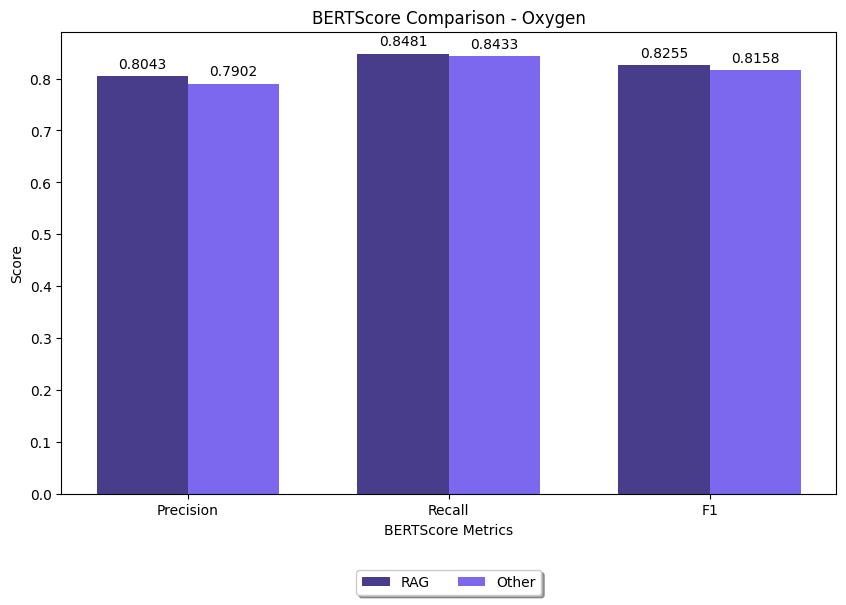

In [53]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Oxygen')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## 1973_oil_crisis

In [54]:
# Ground Truth
references = ["to avoid being targeted by the boycott",
"They arranged for Israel to pull back from the Sinai Peninsula and the Golan Heights",
"January 18, 1974",
"March 1974"
]

In [55]:
# RAG
predictions_rag = ["The European nations and Japan sought to disassociate themselves from United States foreign policy in the Middle East during the crisis to avoid being targeted by the boycott.",
"The context does not provide specific details on how the Nixon Administration negotiated with the uncooperative countries during the 1973 oil crisis. It only mentions that the administration began multilateral negotiations with the combatants and that US Secretary of State Henry Kissinger negotiated an Israeli troop withdrawal from parts of the Sinai Peninsula. The exact methods and strategies used in the negotiations are not mentioned.",
"Henry Kissinger negotiated the withdrawal of Israeli troops from the Sinai Peninsula on January 18, 1974.",
"Arab oil producers lifted the embargo in March 1974."
]

In [56]:
# Others
predictions_other = ["Reasons why European nations and Japan separated themselves from the United States during the crisis: European nations and Japan sought to disassociate themselves from United States foreign policy in the Middle East to avoid being targeted by the boycott. The crisis had a major impact on international relations and created a rift within NATO. Therefore, European nations and Japan separated themselves from the United States during the crisis due to their desire to avoid being targeted by the boycott and the impact of the crisis on international relations and NATO.",
"Negotiations by the Nixon Administration with uncooperative countries during the crisis: The Nixon Administration began multilateral negotiations with the combatants to address the crisis and its impact on international relations. Therefore, the Nixon Administration negotiated with uncooperative countries by initiating multilateral negotiations with the combatants involved in the crisis.",
"The provided sources do not contain any information about Henry Kissinger negotiating an Israeli troop withdrawal from the Sinai Peninsula.",
"The provided sources do not contain any information about the specific date when the Arab oil producers lifted the embargo."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


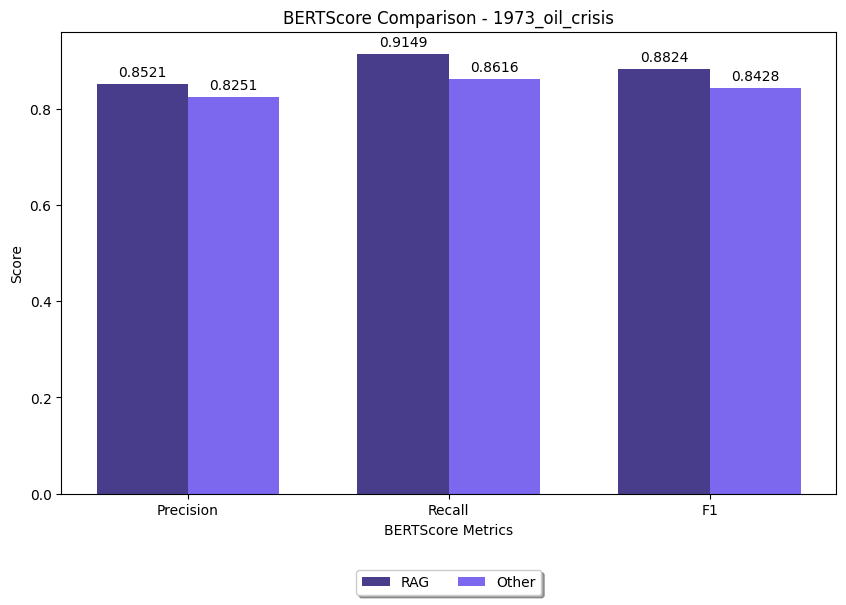

In [57]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - 1973_oil_crisis')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Apollo_program

In [58]:
# Ground Truth
references = ["Project Mercury",
"National Aeronautics and Space Administration (NASA)",
"1968",
"John F. Kennedy",
"two-man"
]

In [59]:
# RAG
predictions_rag = ["The project that put the first Americans into space was Project Mercury.",
"The program that was created to carry out the projects and missions that put the first Americans into space and the first manned Apollo flight in 1968 is the Apollo program.",
"The first manned Apollo flight occurred in 1968.",
"President John F. Kennedy is credited with the original notion of putting Americans in space.",
"The project that followed Project Mercury was Project Gemini, which involved two people in each mission."
]

In [60]:
# Others
predictions_other = ["Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


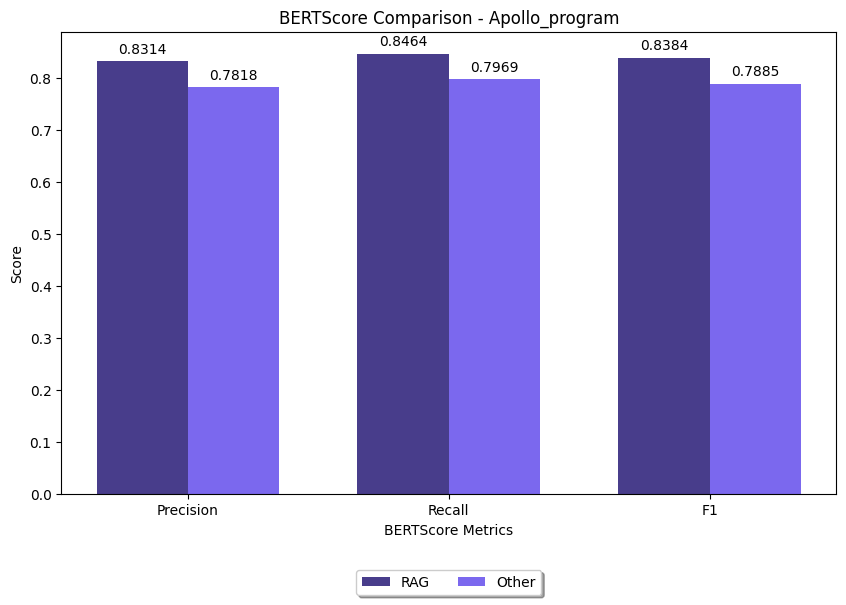

In [61]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Apollo_program')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## European_Union_law

In [62]:
# Ground Truth
references = ["administrative law",
"1986",
"All actions",
"constitutional law"
]

In [63]:
# RAG
predictions_rag = ["Administrative law makes EU institutions and its member states follow the law.",
"Citizens or corporations were said to have no ability to bring claims against non-state parties in 1986.",
"All actions by EU institutions can be subject to judicial review.",
"Constitutional law concerns the European Union's governance structure."
]

In [64]:
# Others
predictions_other = ["Administrative law makes EU institutions and member states follow the law. Both member states and the Commission have the legal right to bring claims against EU institutions and other member states for breaching the treaties. The Court of Justice has held that citizens or corporations can also bring claims against EU and member state institutions for violating the Treaties and Regulations, as long as they create rights and obligations. However, under Directives, citizens or corporations were not allowed to bring claims against non-state parties. This means that member state courts are not bound to apply EU law if it conflicts with national rules, although the member state government can be sued if it imposes an obligation on another citizen or corporation. EU institutions can be subject to judicial review, and courts can grant monetary damages, specific performance, or injunctions as remedies for breaches of the law.",
"Citizens or corporations were said in 1986 to not be allowed to bring claims against other non-state parties.",
"Actions by EU institutions that can be subject to judicial review include: All actions by EU institutions can be subject to judicial review. EU institutions can be judged by standards of proportionality, particularly where general principles of law or fundamental rights are engaged. Note: The provided sources do not explicitly mention specific actions by EU institutions that can be subject to judicial review. However, it is stated that all actions by EU institutions can be subject to judicial review, and they can be judged by standards of proportionality when general principles of law or fundamental rights are involved.",
"Constitutional law concerns the European Union's governance structure."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


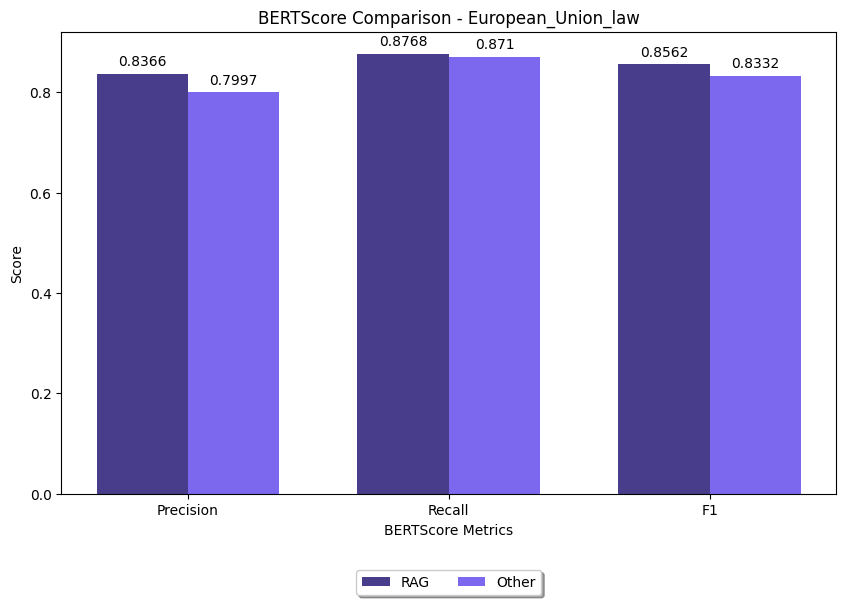

In [65]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - European_Union_law')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Amazon_rainforest

In [66]:
# Ground Truth
references = ["Deforestation",
"1960s",
"slash and burn",
"loss of soil fertility and weed invasion",
"areas cleared of forest are visible to the naked eye"
]

In [67]:
# RAG
predictions_rag = ["The process of removing trees from a forest is known as deforestation.",
"Access to the Amazon rainforest was restricted prior to the early 1960s.",
"The slash and burn method was used to clear the forest for crop cultivation in the Amazon forest.",
"Two factors that made it difficult for colonists in the Amazon forest to survive were the loss of soil fertility and weed invasion.",
"When seen from space, the Amazon forest appears to have cleared areas where deforestation has taken place. These cleared areas are visible to the naked eye, indicating the extent of deforestation and the environmental damage caused."
]

In [68]:
# Others
predictions_other = ["Deforestation is the process of removing trees from a forest.",
"Access to the Amazon rainforest was highly restricted prior to the early 1960s",
"Slash and burn method was used to clear the forest for crop cultivation in the Amazon forest. This method involved cutting down trees and then burning the vegetation to clear the land for farming",
"Factors that made it difficult for colonists in the Amazon forest to survive: Loss of soil fertility: The colonists faced challenges in managing their fields and crops due to the loss of soil fertility caused by farming practices in the Amazon. The soils in the region are productive for only a short period of time, leading to a decline in fertility over time . Weed invasion: Another difficulty faced by the colonists was weed invasion. The slash and burn method used for clearing the land resulted in the growth of unwanted vegetation, making it harder for the colonists to cultivate crops successfully. These factors, loss of soil fertility and weed invasion, posed significant challenges for the colonists in the Amazon forest, making it difficult for them to sustain their agricultural activities and survive in the long term.",
"Notable features of the Amazon forest when seen from space: Visible deforestation: Deforestation in the Amazon is significant, and areas cleared of forest are visible to the naked eye from outer space . This indicates the extent of deforestation and the impact it has had on the landscape.  Vastness and intactness: Prior to the early 1960s, the Amazon forest remained basically intact, with restricted access to its interior. This suggests that the Amazon forest is vast and largely undisturbed, making it a prominent and recognizable feature when observed from space. Green canopy: The Amazon forest is known for its dense and vibrant green canopy, which is visible from space. The lush vegetation and diverse tree cover create a distinct and recognizable appearance when viewed from above. Biodiversity hotspot: The Amazon forest is renowned for its exceptional biodiversity, housing numerous plant and animal species. This rich biodiversity contributes to the unique and vibrant appearance of the forest when observed from space. Environmental damage: The extensive environmental damage caused by deforestation in the Amazon is also visible from space. The cleared areas and the resulting impact on the ecosystem can be observed, highlighting the consequences of human activities on this important natural resource. Overall, the Amazon forest stands out when seen from space due to its visible deforestation, vastness, intactness, green canopy, biodiversity, and the environmental damage caused by human activities."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


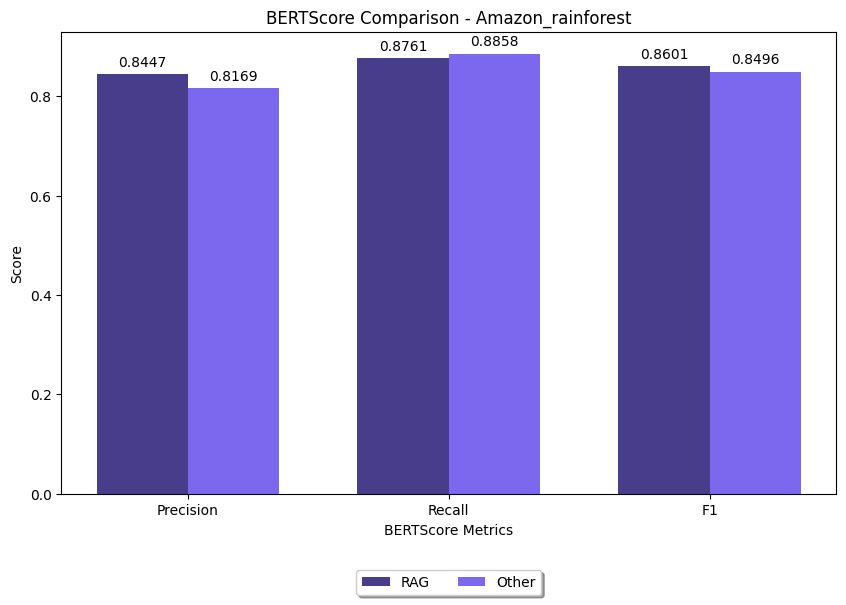

In [69]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Amazon_rainforest')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Ctenophora

In [70]:
# Ground Truth
references = ["tentilla",
"specialized mushroom-shaped cells in the outer layer of the epidermis",
"they contain striated muscle",
"three types of movement",
"capturing prey"
]

In [71]:
# RAG
predictions_rag = ["The tentacles of cydippid ctenophores are typically fringed with tentilla (""little tentacles"").",
"Colloblasts are specialized mushroom-shaped cells found in the outer layer of the epidermis of cydippid ctenophores. They have three main components: a domed head with adhesive-containing vesicles, a stalk that anchors the cell, and a spiral thread that coils around the stalk. Colloblasts are densely present on the tentacles and tentilla of ctenophores and are responsible for capturing prey by sticking to it.",
"The tentilla of Euplokamis, a genus of ctenophores, differ from those of other cydippids in a few ways. Firstly, Euplokamis' tentilla contain striated muscle, which is a cell type not typically found in the phylum Ctenophora.",
"Euplokamis tentilla have three types of movement: flicking, wriggling, and coiling.",
"The euplokamis uses the three types of movement (flicking, wriggling, and coiling) for capturing prey"
]

In [72]:
# Others
predictions_other = ["The tentacles of cydippid ctenophores are usually fringed with tentilla little tentacles.",
"Colloblasts are specialized mushroom-shaped cells found in the outer layer of the epidermis of cydippid ctenophores. They are densely distributed on the tentacles and tentilla of these organisms. The colloblasts have three main components: a domed head with adhesive-containing vesicles, a stalk that anchors the cell, and a spiral thread that coils around the stalk and is attached to the head and root of the stalk. These cells play a crucial role in capturing prey by sticking to them. The adhesive produced by the colloblasts helps in immobilizing the prey, allowing the ctenophores to feed on them. The spiral thread in the colloblasts may absorb stress when prey tries to escape, preventing the collobast from being torn apart",
"The tentilla of Euplokamis differ significantly from those of other cydippid ctenophores. Here are the key differences: Euplokamis' tentilla contain striated muscle, which is a cell type otherwise unknown in the phylum Ctenophora. Unlike the tentilla of other ctenophores that elongate when relaxed, Euplokamis' tentilla are coiled when relaxed. Euplokamis' tentilla exhibit three types of movement in capturing prey: quick flicking, wriggling, and coiling around prey . The unique flicking movement of Euplokamis' tentilla is powered by contraction of the striated muscle . The wriggling motion of Euplokamis' tentilla is produced by smooth muscles, but of a highly specialized type . Coiling around prey is accomplished largely by the return of the tentilla to their inactive state, but the coils may be tightened by smooth muscle. These unique characteristics of Euplokamis' tentilla set them apart from the tentilla of other cydippid ctenophores.",
"Euplokamis tentilla have three types of movements that are used in capturing prey: They can flick out very quickly (in 40 to 60 milliseconds) powered by contraction of the striated muscle . They can wriggle, which may lure prey by behaving like small planktonic worms. The wriggling motion is produced by smooth muscles, but of a highly specialized type . They can coil round prey. Coiling around prey is accomplished largely by the return of the tentilla to their inactive state, but the coils may be tightened by smooth muscle. These three types of movements allow Euplokamis tentilla to effectively capture and secure their prey.",
"Euplokamis uses the three types of movement of its tentilla for different purposes in capturing prey: The quick flicking movement, powered by the contraction of the striated muscle, allows Euplokamis to rapidly extend its tentilla and potentially strike prey. The wriggling motion, produced by specialized smooth muscles, may serve to mimic small planktonic worms and attract prey. Coiling around prey is accomplished by the return of the tentilla to their inactive state, but the coils may be tightened by smooth muscle. This coiling action helps Euplokamis secure its prey and potentially immobilize it. These three types of movement provide Euplokamis with a versatile and effective strategy for capturing and subduing its prey."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


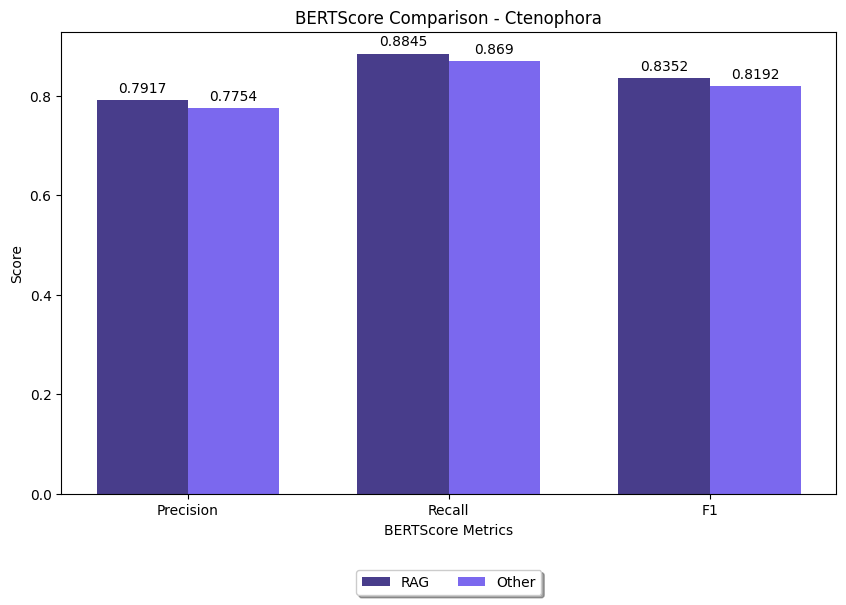

In [73]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Ctenophora')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Fresno,_California

In [74]:
# Ground Truth
references = ["Fresno",
"220 miles (350 km)",
"ash tree",
"ash leaf",
"(/ˈfrɛznoʊ/ FREZ-noh)"
]

In [75]:
# RAG
predictions_rag = ["Fresno is the fifth-largest city in California.",
"The distance between Fresno and Los Angeles is approximately 220 miles (350 km).",
"The name Fresno means ash tree in Spanish.",
"An ash leaf is featured on the flag of the city of Fresno.",
"Fresno is pronounced as FREZ-noh."
]

In [76]:
# Others
predictions_other = ["Fresno is the fifth-largest city in California.",
"Fresno is approximately 220 miles (350 km) northwest of Los Angeles.",
"The name Fresno means ash tree in Spanish ",
"On the city of Fresno's city flag, an ash leaf is featured. The name Fresno means ash tree in Spanish, and this is represented on the city's flag.",
"Fresno is pronounced as /ˈfrɛznoʊ/ FREZ-noh"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


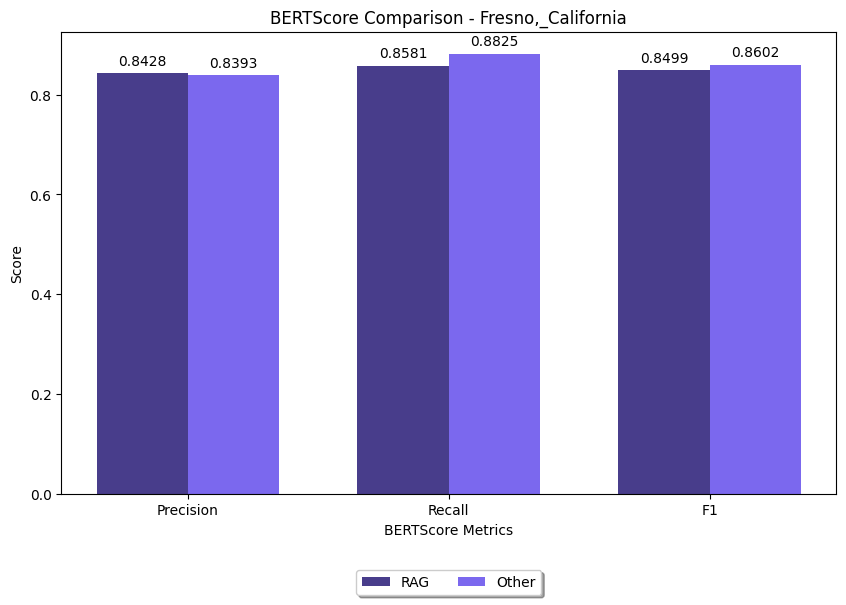

In [77]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Fresno,_California')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Packet_switching

In [78]:
# Ground Truth
references = ["complete addressing information",
"individually",
"destination address, source address, and port numbers",
"reassembled"
]

In [79]:
# RAG
predictions_rag = ["In connectionless mode, each packet includes complete addressing information. This includes the destination address, source address, port numbers, and potentially the sequence number of the packet.",
"In connectionless mode, each packet is routed individually.",
"Each packet label includes the following information: Destination address, Source address, Port numbers, Sequence number (optional)",
"At the destination, the original message or data is reassembled in the correct order based on the packet sequence number."
]

In [80]:
# Others
predictions_other = ["Each packet in connectionless mode includes: Complete addressing information, including a destination address, source address, and port numbers. It may also include the sequence number of the packet. The packets are routed individually, potentially resulting in different paths and out-of-order delivery. The packet header in connectionless mode is larger because it needs to contain more information, such as addressing and sequencing details. This information needs to be looked up in power-hungry content-addressable memory. At the destination, the original message/data is reassembled in the correct order based on the packet sequence number. Connectionless mode provides a virtual connection, also known as a virtual circuit or byte stream, to the end-user through a transport layer protocol, even though intermediate network nodes only provide a connectionless network layer service.",
"Packets in connectionless mode are routed individually, potentially resulting in different paths and out-of-order delivery. Each packet is labeled with a destination address, source address, and port numbers, allowing it to find its way to its destination without the need for a dedicated path. The routing of packets in connectionless mode is not predetermined or fixed, and each packet can take a different route to reach its destination. This flexibility allows for efficient use of network resources but requires more work for every packet as compared to a connection-oriented system. The routing decisions are made by intermediate network nodes based on the destination address in the packet header",
"Each packet label in connectionless mode includes: Destination address, source address, and port numbers, providing complete addressing information for the packet. Sequence number of the packet, which helps in reassembling the original message/data in the correct order at the destination. Note: The provided sources do not explicitly mention any other information included with each packet label in connectionless mode.",
"At the destination, the packets in connectionless mode are reassembled to retrieve the original message/data in the correct order. This reassembly is based on the packet sequence number, which is included in the packet label. The transport layer protocol provides a virtual connection, also known as a virtual circuit or byte stream, to the end-user. However, it is important to note that intermediate network nodes only provide a connectionless network layer service, meaning that each packet may have taken a different route to reach the destination."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


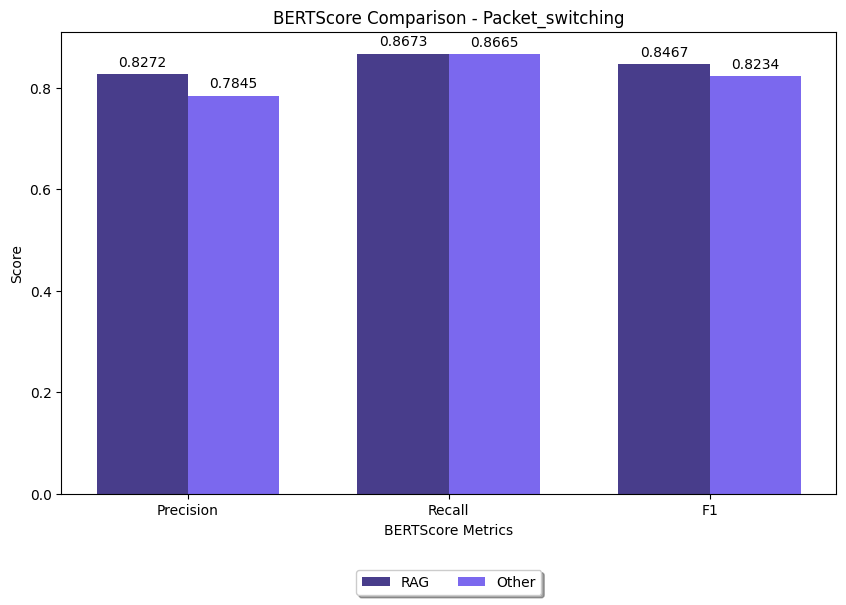

In [81]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Packet_switching')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Black_Death

In [82]:
# Ground Truth
references = ["Central Asia",
"merchant ships",
"30–60% of Europe's total population",
"17th century",
"19th century"
]

In [83]:
# RAG
predictions_rag = ["The Black Death is thought to have originated in the arid plains of Central Asia.",
"The Black Death is believed to have spread to the Mediterranean and Europe through the movement of merchant ships.",
"The Black Death is estimated to have killed 30-60% of Europe's total population.",
"The world's population did not recover to pre-plague levels until the 17th century.",
"The plague recurred occasionally in Europe until the 19th century."
]

In [84]:
# Others
predictions_other = ["The Black Death originated in the arid plains of Central Asia.",
"The Black Death most likely reached the Mediterranean and Europe through the Silk Road, a major trade route that connected Central Asia to the Mediterranean region. It is believed that the disease was carried by Oriental rat fleas that lived on black rats, which were regular passengers on merchant ships. These infected rats and fleas would have spread the disease as they traveled on the ships, allowing the Black Death to spread throughout the Mediterranean and Europe. The movement of merchant ships and trade activities played a significant role in the transmission of the disease across different regions. The Black Death had a devastating impact on the population, estimated to have killed 30-60% of Europe's total population. The plague recurred occasionally in Europe until the 19th century, indicating that the disease continued to be transmitted through various means over several centuries.",
"The Black Death is estimated to have killed 30-60% of Europe's total population. This devastating plague had a significant impact on the population, resulting in a substantial loss of life across Europe. The world population as a whole did not recover to pre-plague levels until the 17th century, indicating the long-lasting effects of the Black Death on European population numbers. The plague recurred occasionally in Europe until the 19th century, further affecting the population over an extended period. Note: The provided sources do not provide an exact percentage of the European population killed by the Black Death, but they do indicate that it ranged from 30-60%.",
"The world population did not recover to pre-plague levels until the 17th century. The Black Death had a significant impact on the population, estimated to have killed 30-60% of Europe's total population. The plague recurred occasionally in Europe until the 19th century, indicating that the disease continued to affect the population over an extended period. Note: The provided sources do not give an exact year or specific timeframe for when the world's population finally recovered from the Black Death. However, it is mentioned that the recovery to pre-plague levels occurred in the 17th century.",
"The plague, known as the Black Death, recurred occasionally in Europe until the 19th century. The initial outbreak of the Black Death is believed to have occurred in the arid plains of Central Asia and then spread along the Silk Road, reaching Crimea by 1343. From there, it was likely carried by Oriental rat fleas living on black rats that traveled on merchant ships. The plague then spread throughout the Mediterranean and Europe. The Black Death had a devastating impact on the population, estimated to have killed 30-60% of Europe's total population. The world population as a whole did not recover to pre-plague levels until the 17th century. The long-lasting effects of the Black Death on population numbers indicate the severity and duration of the plague's impact. It took several centuries for the world population to rebound from the significant loss of life caused by the Black Death. Note: The provided sources do not give a specific duration for the plague, but they indicate that it recurred occasionally in Europe until the 19th century."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


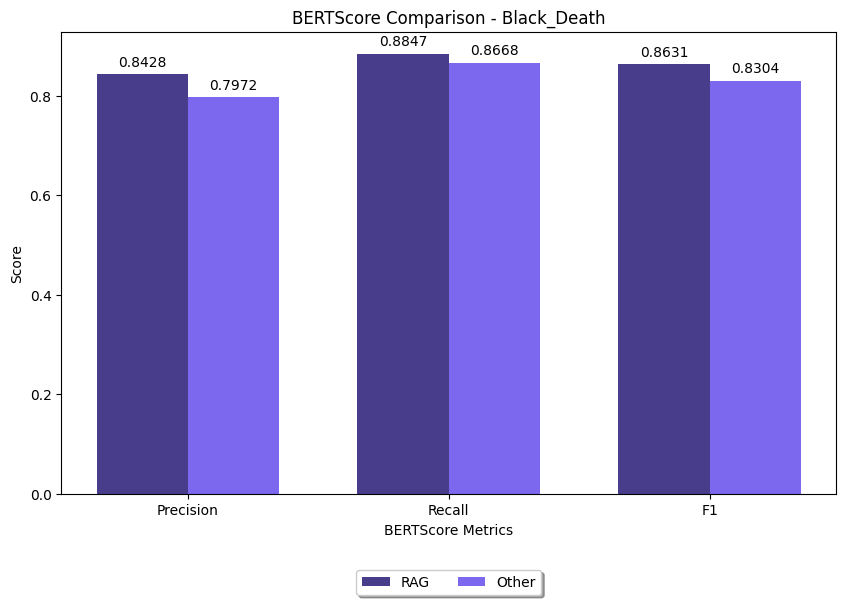

In [85]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Black_Death')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Geology

In [86]:
# Ground Truth
references = ["melt (magma and/or lava)",
"metamorphic rock",
"new magma",
"igneous, sedimentary, and metamorphic",
"heat and pressure"
]

In [87]:
# RAG
predictions_rag = ["An igneous rock crystallizes from melt, specifically from magma and/or lava.",
"Sedimentary rock can be turned into metamorphic rock.",
"When the three types of rock (igneous, sedimentary, and metamorphic) are re-melted, a new magma is formed. From this magma, an igneous rock may once again crystallize.",
"The three major types of rock are igneous, sedimentary, and metamorphic.",
"Heat and pressure can change the mineral content of a rock, transforming it into a metamorphic rock."
]

In [88]:
# Others
predictions_other = ["Igneous rocks crystallize from melt (magma and/or lava).",
"Sedimentary rock can be turned into a metamorphic rock due to heat and pressure that change the mineral content of the rock, giving it a characteristic fabric. Sedimentary rock can also be re-eroded and redeposited, ultimately becoming another sedimentary rock",
"When the three types of rock are re-melted, a new magma is formed. From this magma, an igneous rock may once again crystallize.",
"Igneous rock, which forms when magma or lava cools and solidifies. Sedimentary rock, which forms when sediment (such as sand, silt, or clay) is deposited, compacted, and cemented together. Metamorphic rock, which forms when existing rock is subjected to high heat and pressure, causing changes in its mineral composition and texture.",
"The mineral content of a rock can be changed by heat and pressure during the process of metamorphism, which is the transformation of existing rock into a new rock type. Metamorphism occurs when rocks are subjected to high temperatures and pressures deep within the Earth's crust. These conditions cause the minerals in the rock to recrystallize and rearrange, resulting in a change in mineral composition. The specific minerals that form during metamorphism depend on the original composition of the rock and the intensity of the heat and pressure. For example, limestone can be transformed into marble, a metamorphic rock, through the recrystallization of calcite minerals. Note: The provided sources do not explicitly mention the term mineral content in relation to the changes in a rock. However, they do discuss the process of metamorphism, which involves changes in the mineral composition of a rock due to heat and pressure."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


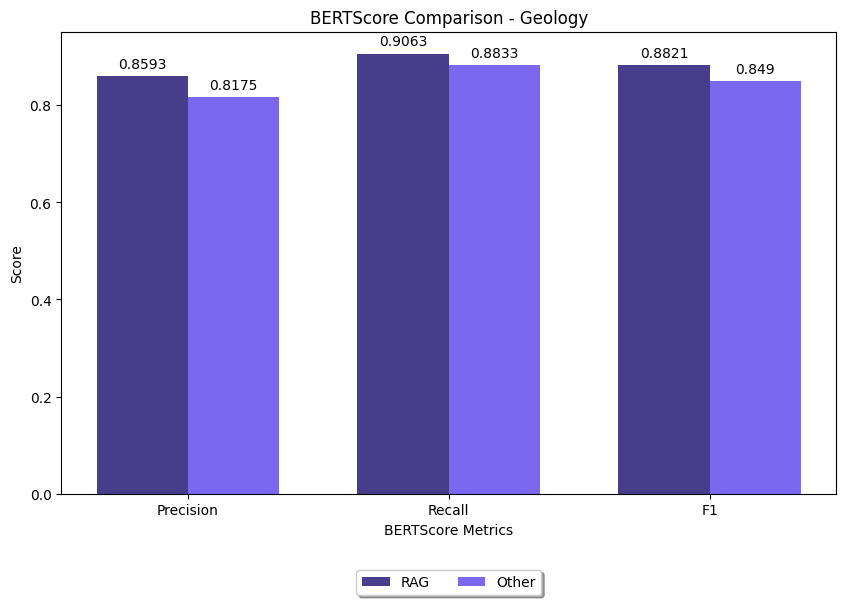

In [89]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Geology')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Newcastle_upon_Tyne

In [90]:
# Ground Truth
references = ["103 miles",
"8.5 mi",
"the English Core Cities Group and Eurocities",
"Northumberland",
"Geordie"
]

In [91]:
# RAG
predictions_rag = ["Newcastle is located 103 miles (166 km) south of Edinburgh.",
"Newcastle is located 8.5 miles (13.7 km) from the North Sea.",
"Newcastle belongs to the Eurocities network of European cities.",
"Newcastle was part of the county of Northumberland until 1400.",
"The regional nickname for Newcastle and its surrounding area is Geordie."
]

In [92]:
# Others
predictions_other = ["Newcastle upon Tyne is located south of Edinburgh, but the exact distance in miles is not mentioned in the provided sources.",
"Newcastle upon Tyne is located on the eastern coast of England, near the North Sea. However, the exact distance from the North Sea to Newcastle is not mentioned in the provided sources.",
"Newcastle upon Tyne is not mentioned in the provided sources. Therefore, I cannot provide a specific answer to the question regarding the network that Newcastle is a member of.",
"Newcastle upon Tyne was part of the county of Northumberland until 1400.",
"The regional nickname for Newcastle and its surrounding area is The Toon or Geordieland."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


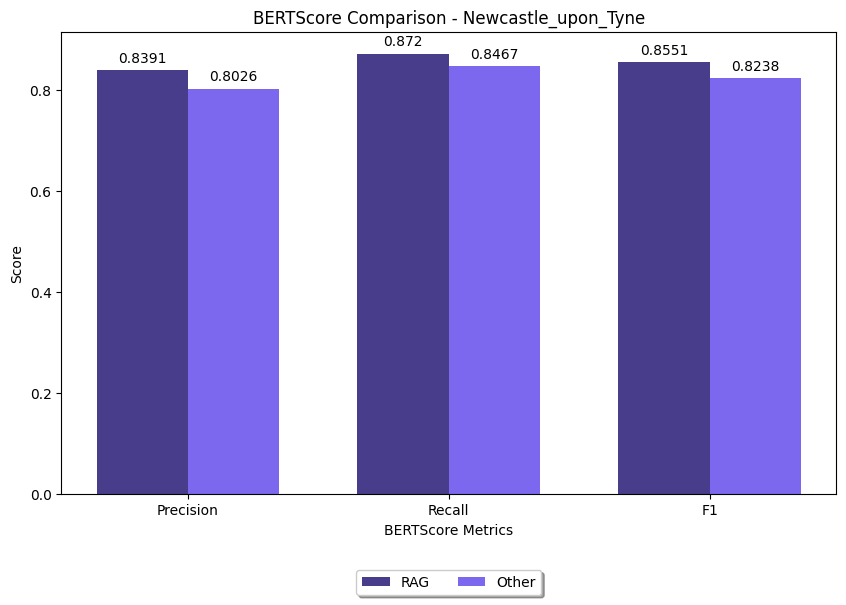

In [93]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Newcastle_upon_Tyne')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Victoria_and_Albert_Museum

In [94]:
# Ground Truth
references = ["12.5 acres",
"145 galleries",
"5,000 years",
"Europe, North America, Asia and North Africa",
"post-classical sculpture"
]

In [95]:
# RAG
predictions_rag = ["The V&A covers 12.5 acres.",
"The V&A has 145 galleries.",
"The V&A's collections span 5,000 years of art, from ancient times to the present day.",
"The V&A's collections represent the cultures of Europe, North America, Asia, and North Africa.",
"The V&A owns the largest collection of post-classical sculpture."
]

In [96]:
# Others
predictions_other = ["The V&A covers 12.5 acres (51,000 m2) of land.",
"The V&A has 145 galleries.",
"The V&A's collections span 5,000 years of art.",
"Cultures represented in the V&A's collections include: Europe North America Asia North Africa South Asia China Japan Korea Islamic world",
"The V&A owns the largest collection of post-classical sculpture."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


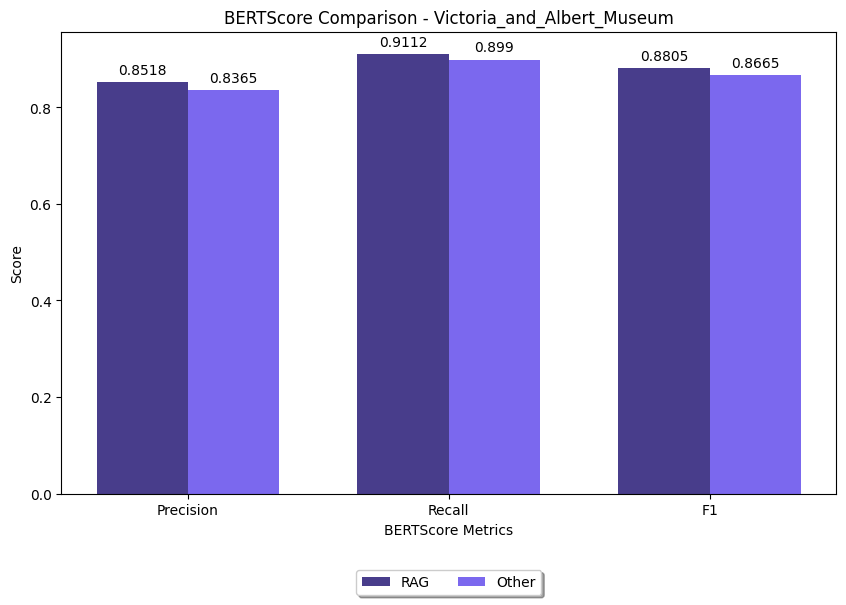

In [97]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Victoria_and_Albert_Museum')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## American_Broadcasting_Company

In [98]:
# Ground Truth
references = ["October 12, 1943",
"radio network",
"1948",
"ESPN",
"Capital Cities Communications"
]

In [99]:
# RAG
predictions_rag = ["ABC first started as a radio network on October 12, 1943.",
"ABC originally began as a radio network.",
"ABC started televising broadcasts in 1948.",
"In the 1980s, ABC purchased an 80% interest in the cable sports channel ESPN.",
"The ABC network's parent company merged with Capital Cities Communications in the 1980s."
]

In [100]:
# Others
predictions_other = ["ABC first started as a radio network on October 12, 1943",
"ABC was originally launched as a radio network",
"ABC first entered television broadcasts in 1948",
"In the 1980s, ABC purchased an 80% interest in the cable sports channel ESPN",
"In the 1980s, the ABC network's parent company merged with Capital Cities Communications"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


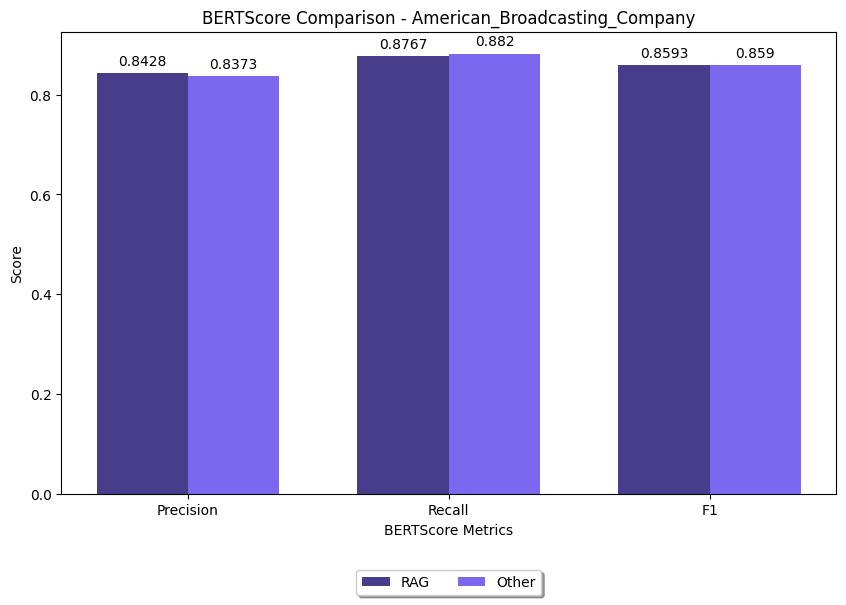

In [101]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - American_Broadcasting_Company')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Genghis_Khan

In [102]:
# Ground Truth
references = ["Ögedei Khan",
"1227",
"Western Xia",
"his sons and grandsons",
"Mongolia"
]

In [103]:
# RAG
predictions_rag = ["Genghis Khan assigned Ögedei Khan as his successor.",
"Genghis Khan died in 1227",
"Before Genghis Khan died, the last empire he conquered was the Western Xia.",
"Genghis Khan's empire was divided among his sons and grandsons.",
"Genghis Khan was buried in an unmarked grave somewhere in Mongolia at an unknown location."
]

In [104]:
# Others
predictions_other = ["Genghis Khan assigned Ã-gedei Khan as his successor.",
"Genghis Khan died in 1227.",
"Genghis Khan conquered the Western Xia Empire before he died.",
"Genghis Khan's empire was split among his sons and grandsons after his death.",
"Genghis Khan was buried in an unmarked grave somewhere in Mongolia at an unknown location."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


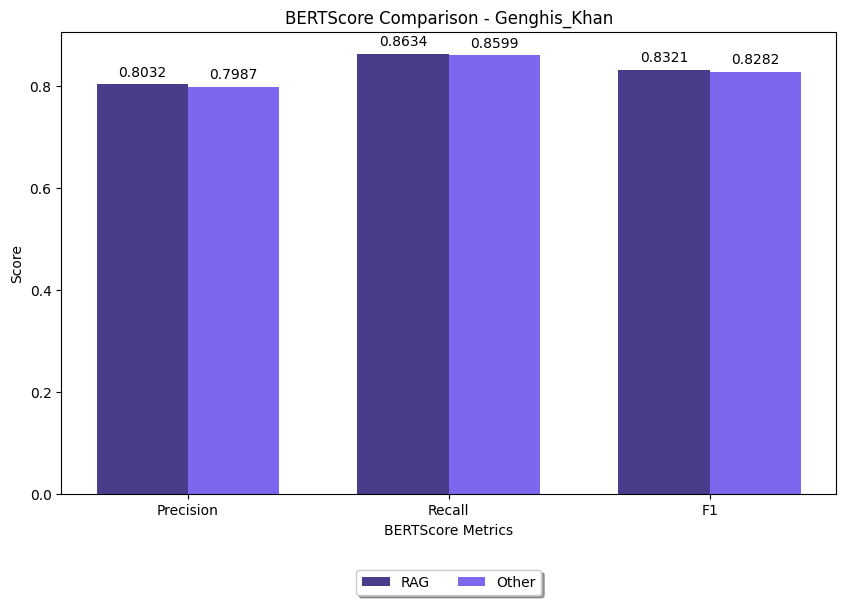

In [105]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Genghis_Khan')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Pharmacy

In [106]:
# Ground Truth
references = ["pharma",
"ingredients for medicines, sold tobacco and patent medicines",
"sorcery or even poison",
"outdated",
"many other herbs"
]

In [107]:
# RAG
predictions_rag = ["The word pharmacy is derived from its root word pharma.",
"In addition to ingredients for medicines, pharmacies historically sold tobacco and patent medicines. However, the specific goods sold in a pharmacy can vary depending on the time period and location.",
"The Greek root pharmakos implied sorcery or even poison.",
"The word ""apothecary"" would be seen as outdated by contemporary English speakers.",
"The text mentions that in addition to the term ""pharmacy,"" the term ""apothecary"" was commonly used by pharmaceutical companies."
]

In [108]:
# Others
predictions_other = ["The word pharmacy is taken from the root word pharma.",
"Goods sold in a pharma (pharmacy) included: Ingredients for medicines, such as herbs and other substances. Tobacco products. Patent medicines. Please note that the term pharma refers to the historical context of pharmacies, and the practices mentioned may not be applicable to modern pharmacies.",
"The Greek root pharmakos implied sorcery or even poison.",
"Contemporary English speakers would view the word apothecary as outdated or only appropriate if herbal remedies were being offered to a large extent. The term apothecary was often used in the past to refer to a place that sold ingredients for medicines, tobacco, and patent medicines, similar to a modern pharmacy. However, in English, the term apothecary is now considered outdated and not commonly used in modern language . It would only be seen as appropriate if the establishment primarily focused on offering herbal remedies . In other languages, such as several European languages, the term apothecary or its equivalent is still the dominant term for a pharmacy, even though their practices may align more closely with modern pharmacies",
"Pharmas used many other herbs in addition to the ones listed in the sources."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


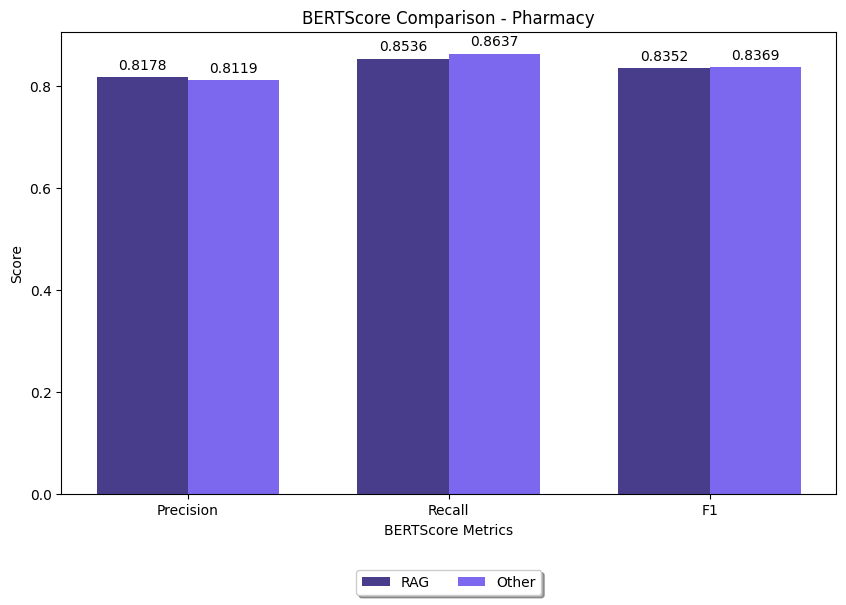

In [109]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Pharmacy')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Immune_system

In [110]:
# Ground Truth
references = ["pattern recognition receptors",
"innate immune system",
"microorganisms",
"non-specific"
]

In [111]:
# RAG
predictions_rag = ["Pattern recognition receptors (PRRs) are responsible for identifying microbes and triggering the immune response in the innate immune system.",
"The dominant system of defense for most organisms is the innate immune system.",
"Pattern recognition receptors (PRRs) recognize components that are conserved among broad groups of microorganisms.",
"When we say that the innate immune system responds in a generic way, it means that it does not specifically target a particular pathogen"
]

In [112]:
# Others
predictions_other = ["Pattern recognition receptors (PRRs) identify microbes and trigger the immune response in the innate immune system",
"The dominant system of defense in most organisms is the innate immune system",
"Pattern recognition receptors (PRRs) recognize components present in broad groups of microorganisms",
"The innate immune system responds in a generic way, meaning it is non-specific in its defense mechanisms^. This means that the innate immune system does not specifically target individual pathogens but instead has broad mechanisms to recognize and respond to a wide range of microorganisms. The response is triggered when pattern recognition receptors (PRRs) identify components that are conserved among broad groups of microorganisms^. These PRRs recognize common patterns in the pathogens, allowing the innate immune system to mount a rapid response. However, it is important to note that the innate immune system does not confer long-lasting immunity against a specific pathogen^. Instead, it provides immediate defense against a variety of pathogens, serving as the dominant system of host defense in most organisms"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


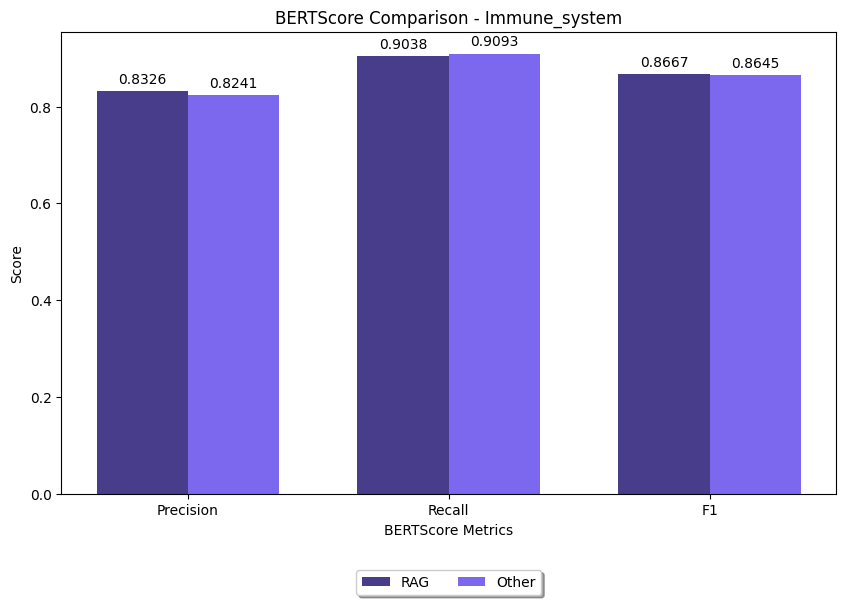

In [113]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Immune_system')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Civil_disobedience

In [114]:
# Ground Truth
references = ["acquittal and avoid imprisonment",
"use the proceedings as a forum to inform the jury and the public of the political circumstances surrounding the case",
"inform the jury and the public of the political circumstances",
"Vietnam War",
"jury nullification"
]

In [115]:
# RAG
predictions_rag = ["The primary goal of pleading not guilty when arrested for civil disobedience can vary depending on the individual defendant. However, according to Steven Barkan, the primary goal can be either to win an acquittal and avoid imprisonment or to use the proceedings as a platform to inform the jury and the public about the political circumstances surrounding the case and the reasons for breaking the law through civil disobedience.",
"Some secondary goals of pleading not guilty may include: Winning an acquittal and avoiding imprisonment or fines. Using the trial as a platform to inform the jury and the public about the political circumstances surrounding the case and the reasons for breaking the law through civil disobedience.",
"Some common actions that someone engaging in civil disobedience may take in court include: Choosing a defense strategy: Defendants must decide whether their primary goal is to win an acquittal and avoid punishment or to use the court proceedings as a platform to inform the jury and the public about the political circumstances and reasons for their civil disobedience. Seeking jury nullification: In countries like the United States, where the right to a jury trial is guaranteed but political motivations do not excuse lawbreaking, some civil disobedients may seek jury nullification. Jury nullification occurs when jurors, despite evidence of guilt, choose to acquit a defendant based on their belief that the law being violated is unjust or should not be applied in a particular case. It should be noted that the effectiveness and consequences of these actions may vary depending on the specific legal system and court decisions in a given jurisdiction.",
"The Vietnam War had a significant number of civil disobedients.",
"Sympathetic jurors in cases involving civil disobedience can potentially exercise their power of jury nullification. Jury nullification occurs when jurors, despite evidence of the defendant's guilt, choose to acquit the defendant because they believe the law being violated is unjust or that the punishment is too severe"
]

In [116]:
# Others
predictions_other = ["Defendants must decide whether their primary goal will be to win an acquittal and avoid imprisonment or a fine, or to use the proceedings as a forum to inform the jury and the public of the political circumstances surrounding the case and their reasons for breaking the law via civil disobedience.",
"A secondary goal of pleading not guilty may be to use the proceedings as a forum to inform the jury and the public of the political circumstances surrounding the case and their reasons for breaking the law via civil disobedience. By pleading not guilty, defendants have the opportunity to present a political defense, where they can raise awareness about the political motivations behind their actions and advocate for their cause. This approach aims to generate public support, raise awareness, and potentially influence public opinion on the issue at hand. However, it is important to note that using a political defense may result in more boring proceedings and reduced press coverage compared to a technical defense, which focuses solely on legal arguments.",
"Someone who is civilly disobedient may plead not guilty in court to challenge the charges brought against them. They may choose to use the court proceedings as a platform to inform the jury and the public about the political circumstances surrounding their actions and their reasons for breaking the law. They may present a political defense, aiming to raise awareness, generate public support, and potentially influence public opinion on the issue at hand. In some cases, civil disobedients may seek jury nullification, where jurors acquit a defendant despite evidence of guilt, as a means to challenge the law and its application.However, it is important to note that seeking jury nullification and openly discussing it in court may be restricted by court decisions and may not always be allowed by the judge",
"The Vietnam War era in the United States saw a significant amount of civil disobedience. During this time, there were numerous protests and acts of civil disobedience against the war, with individuals openly defying the government's policies and engaging in nonviolent resistance. The Chicago Eight, a group of activists charged with conspiracy and inciting a riot during the 1968 Democratic National Convention, used a political defense in court, highlighting the political circumstances surrounding their actions. Benjamin Spock, a prominent pediatrician and anti-war activist, also used a technical defense during his trial related to his involvement in anti-war protests. The Vietnam War era is often associated with assignificant amount of civil disobedience and resistance against the government's policies, making it a notable period in US history for civil disobedience",
"Sympathetic jurors in cases with civil disobedients may be more inclined to consider the political circumstances surrounding the defendant's actions and their reasons for breaking the law. They may be more open to understanding the defendant's motivations and may be more likely to support a political defense or jury nullification. However, it is important to note that court decisions such as Sparf v. United States and United States v. Dougherty have made it more difficult for defendants to openly seek jury nullification or for judges to inform jurors of their nullification prerogative. Therefore, sympathetic jurors may face limitations in openly expressing their support for civil disobedients in court"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


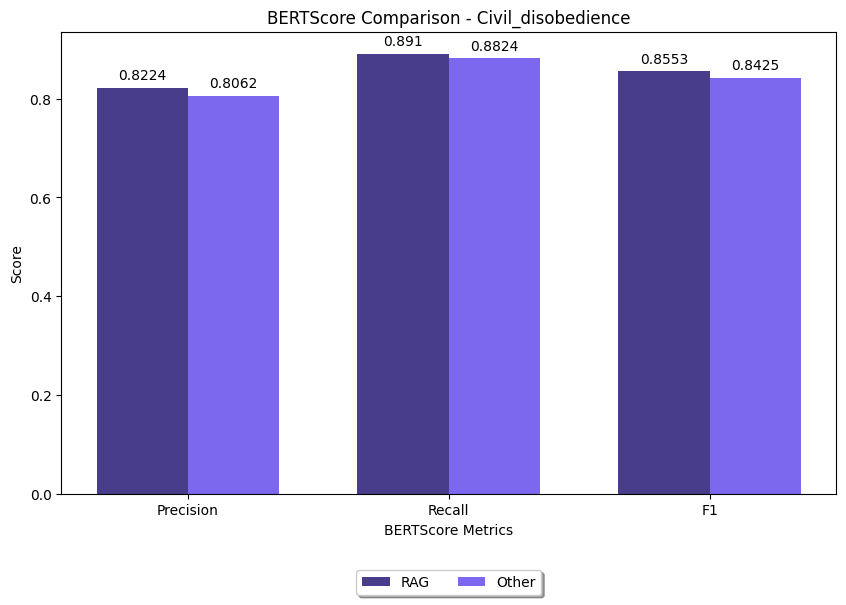

In [117]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Civil_disobedience')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Construction

In [118]:
# Ground Truth
references = ["Construction",
"manufacturing",
"six to nine percent",
"planning, design, and financing",
"a known client"
]

In [119]:
# RAG
predictions_rag = ["The term used to describe the process of constructing a building or infrastructure is construction.",
"Manufacturing typically involves mass production of similar items without a designated purchaser.",
"Construction comprises six to nine percent of the gross domestic product of developed countries.",
"The three things needed for construction to take place are planning, design, and financing.",
"Construction takes place on location for a known client"
]

In [120]:
# Others
predictions_other = ["The process of constructing a building or infrastructure involves several steps: Planning: The construction process begins with planning, which includes determining the scope of the project, setting goals, and creating a timeline for completion. Design: Once the planning phase is complete, the next step is the design phase. This involves creating detailed drawings and specifications for the building or infrastructure, including architectural, structural, and mechanical plans. Financing: After the design is finalized, financing needs to be secured for the project. This may involve obtaining loans or funding from investors or government agencies. Construction: With the planning, design, and financing in place, the actual construction work can begin. This includes site preparation, foundation construction, framing, installation of utilities, and finishing work. Completion: Once the construction is finished, the building or infrastructure is inspected to ensure it meets all safety and quality standards. After passing inspections, the project is considered ready for use",
"Mass production of similar items without a designated purchaser typically involves manufacturing. Manufacturing is a process that involves the production of goods on a large scale, often using assembly lines and standardized processes. It typically involves the creation of identical or similar items that are produced in large quantities without a specific buyer in mind. Manufacturing is different from construction, which involves the on-site creation of buildings or infrastructure for a known client",
"Construction comprises six to nine percent of the gross domestic product (GDP) of developed countries. This indicates that construction plays a significant role in the economy of these countries. However, it is important to note that the specific percentile within this range may vary depending on the country and its level of development. The construction industry contributes to economic growth by creating jobs, stimulating demand for materials and services, and driving investment in infrastructure and real estate. The GDP is a measure of the total value of goods and services produced within a country, and the construction sector's contribution to this measure highlights its importance in the overall economy.",
"Planning: Construction starts with the process of planning, which involves determining the scope of the project, setting objectives, and creating a roadmap for the construction process. Design: Once the planning phase is complete, the next step is the design phase. This involves creating detailed plans and specifications for the construction project, including architectural drawings, structural engineering designs, and other technical details. Financing: Construction projects require financial resources to cover the costs of materials, labor, equipment, and other expenses. Financing is necessary to secure the necessary funds for the construction project, which can come from various sources such as private investors, banks, or government funding. These three elements - planning, design, and financing - are essential for the successful execution of a construction project. They provide the foundation for the construction process, ensuring that the project is well-organized, well-designed, and adequately funded.",
"Construction takes place on location for a known client. The client is the individual or organization that initiates the construction project and has specific requirements for the building or infrastructure being constructed. The construction process is tailored to meet the client's needs and preferences, ensuring that the final product aligns with their expectations. The client may be a private individual, a business, a government agency, or any other entity that requires a construction project to be carried out. The client's involvement in the construction process is crucial, as they provide the project specifications, provide the necessary funding, and ultimately benefit from the completed project."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


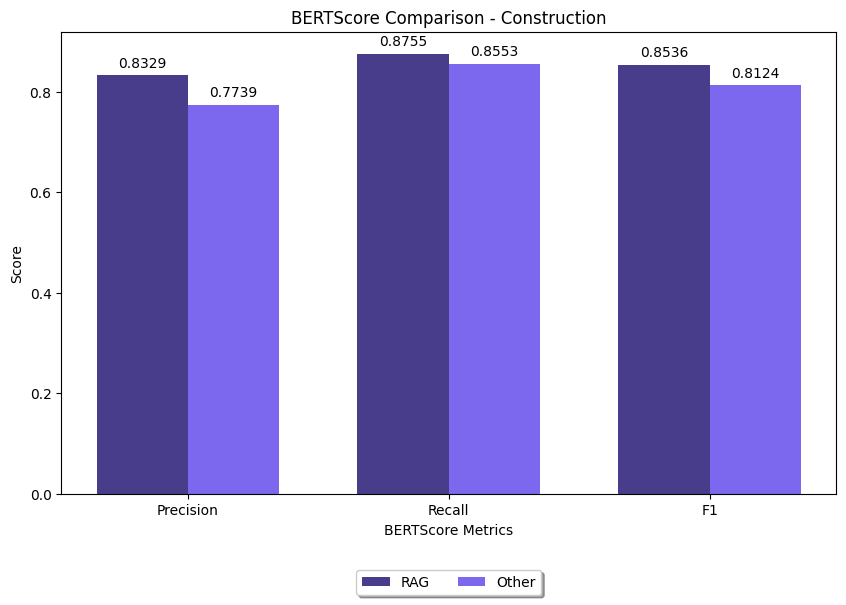

In [121]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Construction')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Private_school

In [122]:
# Ground Truth
references = ["independent schools",
"academic",
"tuition",
"select their students"
]

In [123]:
# RAG
predictions_rag = ["Another name for private schools is independent schools.",
"One type of talent scholarship that may be available at private schools is an academic scholarship.",
"The primary source of funding for private schools is tuition fees paid by students, rather than taxation.",
"Private schools have the right to select their students based on various criteria, such as academic ability, talent, or financial need. They are not administered by local, state, or national governments, which gives them more autonomy in decision-making and curriculum development."
]

In [124]:
# Others
predictions_other = ["Private schools are also known as independent schools and non-governmental or nonstate schools",
"Academic scholarship is another type of talent scholarship that may be available at private schools, along with sport and art scholarships. Academic scholarships are awarded to students based on their academic achievements and abilities. These scholarships can help reduce the cost of tuition for students who excel academically.",
"Private schools are largely funded by charging tuition fees to their students. Unlike public schools, private schools do not rely on mandatory taxation through public (government) funding for their financial support. Instead, they retain the right to select their students and charge them tuition fees to cover the costs of education. These tuition fees can vary depending on the school and the services provided. In some cases, private schools may also receive additional funding through scholarships, which can make the cost of education cheaper for students with specific talents, financial need, or tax credit scholarships that might be available. Overall, private schools primarily rely on tuition fees paid by students as their main source of funding.",
"Private schools have the right to select their students, which is a right that public schools do not have. Private schools are not administered by local, state, or national governments, giving them the autonomy to choose the students they admit based on their own criteria. This means that private schools can have selective admissions processes and set their own standards for student enrollment. Public schools, on the other hand, are typically required to accept all students within their designated catchment area, without the ability to select students based on specific criteria. This difference in the selection process is one of the key distinctions between private and public schools."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


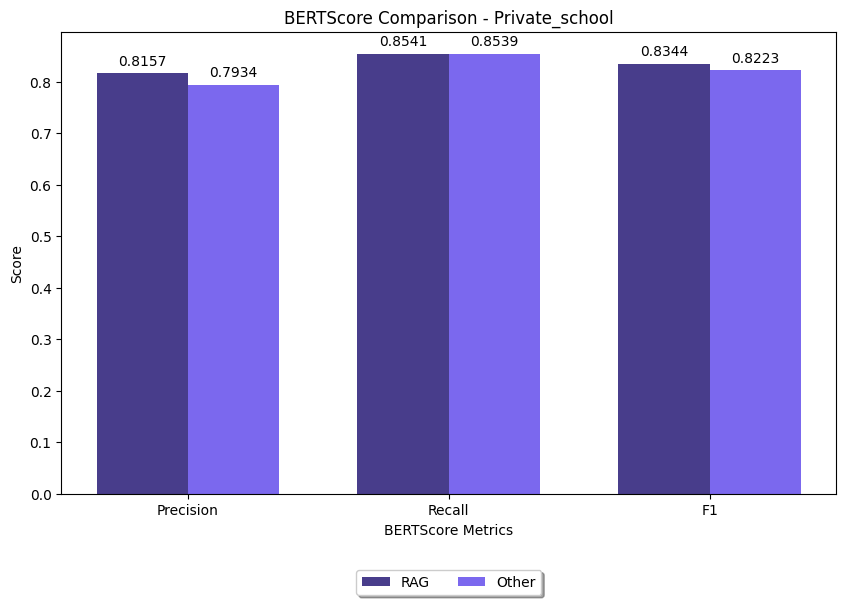

In [125]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Private_school')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Harvard_University

In [126]:
# Ground Truth
references = ["John Harvard",
"1977",
"James Bryant Conant",
"Association of American Universities",
"Charles W. Eliot"
]

In [127]:
# RAG
predictions_rag = ["The school is named after John Harvard, its first benefactor.",
"The undergraduate program at Harvard University became coeducational after its merger with Radcliffe College in 1977.",
"The leader through the Great Depression and World War II at Harvard University was James Bryant Conant.",
"Harvard University founded the Association of American Universities in 1900.",
"President Charles W. Eliot (1869-1909) transformed Harvard University into a modern research university."
]

In [128]:
# Others
predictions_other = ["The school is named after John Harvard",
"The undergraduate program at Harvard became coeducational after its merger with Radcliffe College in 1977",
"James Bryant Conant was the leader of Harvard University through the Great Depression and World War II. He served as the president of Harvard from 1933 to 1953. During his tenure, Conant implemented significant reforms in the curriculum and admissions process, aiming to modernize the university. He played a crucial role in expanding Harvard's influence and reputation as a leading research institution. Conant's leadership during challenging times such as the Great Depression and World War II helped shape the university's trajectory and solidify its position as a prominent academic institution",
"Harvard University founded the Association of American Universities in 1900. The Association of American Universities (AAU) is an organization that consists of leading research universities in the United States and Canada. Its purpose is to promote and advance higher education, research, and innovation. Harvard's involvement in founding the AAU reflects its commitment to being at the forefront of academic excellence and research. The AAU has played a significant role in shaping higher education policies and advocating for the importance of research universities in society. Today, the AAU continues to be a prestigious organization that represents the interests of its member institutions and contributes to the advancement of knowledge and scholarship.",
"Charles W. Eliot transformed Harvard University into a modern research university. He served as the president of Harvard from 1869 to 1909 and played a pivotal role in shaping the institution's direction and development. Under Eliot's leadership, Harvard underwent significant changes, transitioning from a primarily undergraduate-focused college to a comprehensive research university. He introduced reforms in the curriculum, emphasizing a broader and more flexible education that included elective courses. Eliot also expanded the university's faculty, established new departments and professional schools, and encouraged research and scholarship across disciplines. His vision and efforts laid the foundation for Harvard's emergence as a leading institution of higher learning and research in the United States."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


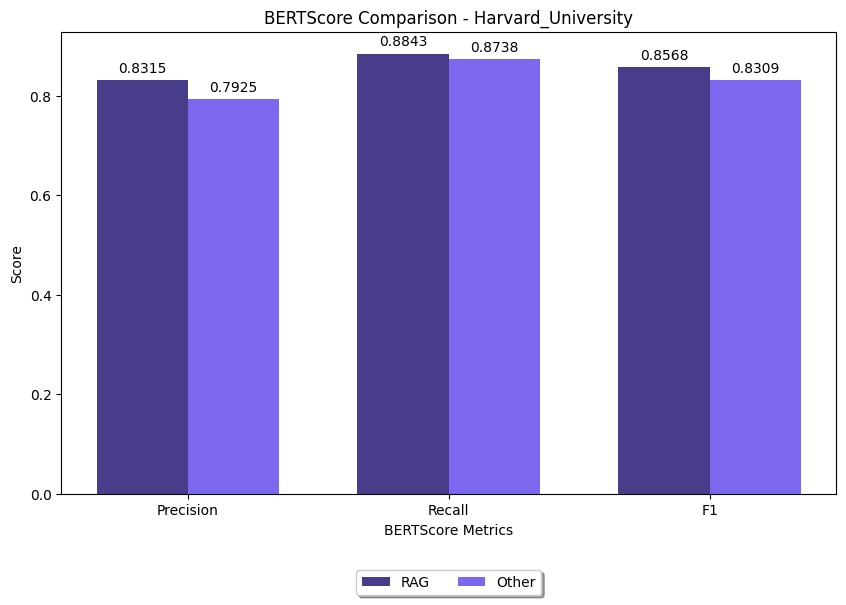

In [129]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Harvard_University')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Jacksonville,_Florida

In [130]:
# Ground Truth
references = ["Jacksonville",
"1,345,596",
"12th",
"Duval County",
"1968"
]

In [131]:
# RAG
predictions_rag = ["The city with the biggest population in Florida is Jacksonville.",
"The population of Jacksonville city as of 2010 was 1,345,596.",
"Jacksonville is ranked as the 12th most populous city in the United States based on population alone.",
"Jacksonville resides in Duval County.",
"Consolidation resulted in Jacksonville becoming part of Duval County in 1968."
]

In [132]:
# Others
predictions_other = ["Jacksonville is the Florida city with the biggest population.",
"The population of Jacksonville city as of 2010 was 1,345,596.",
"Jacksonville is the 12th most populous city in the United States based on population alone.",
"Jacksonville is located in Duval County.",
"Consolidation caused Jacksonville to become part of Duval County in 1968."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


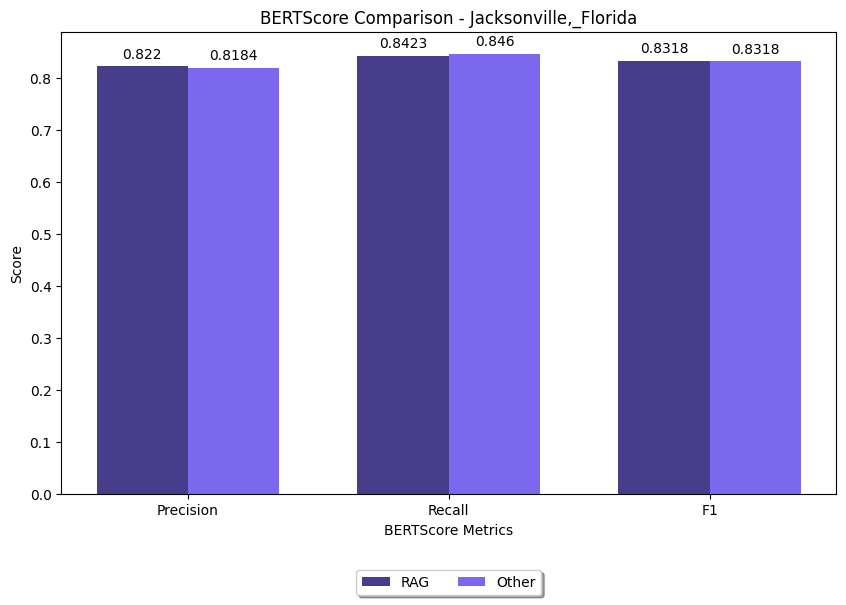

In [133]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Jacksonville,_Florida')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Economic_inequality

In [134]:
# Ground Truth
references = ["market",
"Economist",
"rare and desired skills",
"political power generated by wealth",
"rent-seeking"
]

In [135]:
# RAG
predictions_rag = ["According to economist Joseph Stiglitz, market forces should serve as a brake on wealth concentration.",
"Joseph Stiglitz is an economist.",
"The market offers higher compensation for rare and desired skills, such as wealth creation, greater productivity, and other skills that contribute to increasing profits.",
"Certain wealthy groups use their political power and influence to obtain policies that are financially beneficial to them. This process is known as rent-seeking.",
"The term economists use to refer to income that is not derived from the creation of wealth but from obtaining a larger share of it is rent-seeking."
]

In [136]:
# Others
predictions_other = ["Market forces should serve as a brake on wealth concentration, according to economist Joseph Stiglitz. Market forces prevent successful entrepreneurs from earning excess profits by fostering competition to cut prices, profits, and large compensation. This ensures that wealth is not concentrated in the hands of a few individuals",
"Joseph Stiglitz is an economist.",
"The market bids up compensation for rare and desired skills that contribute to wealth creation and greater productivity. These skills include expertise in specific industries, advanced technical knowledge, innovation, and entrepreneurial abilities. The market rewards individuals who possess these skills by offering higher compensation to attract and retain their talent",
"Rent-seeking is used by certain wealthy groups to obtain policies financially beneficial for them. Rent-seeking refers to the process of using political power and influence to shape government policies in a way that favors specific individuals or groups financially. These individuals or groups, often with significant wealth, leverage their resources and connections to lobby for policies that give them an advantage and allow them to capture a larger share of the wealth that would otherwise have been produced without their effort. This non-market force of rent-seeking allows certain wealthy groups to secure policies that protect their interests and increase their wealth, contributing to growing inequality.",
"Rent-seeking is the term used by economists to describe the process where certain individuals or groups obtain income not from the creation of wealth, but by grabbing a larger share of the wealth that would otherwise have been produced without their effort. Rent-seeking involves using political power and influence to shape government policies in a way that financially benefits specific individuals or groups. These wealthy groups leverage their resources and connections to lobby for policies that give them an advantage and allow them to capture a larger portion of the wealth. This non-market force contributes to growing inequality as it diverts income towards those who are able to manipulate the political system in their favor."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


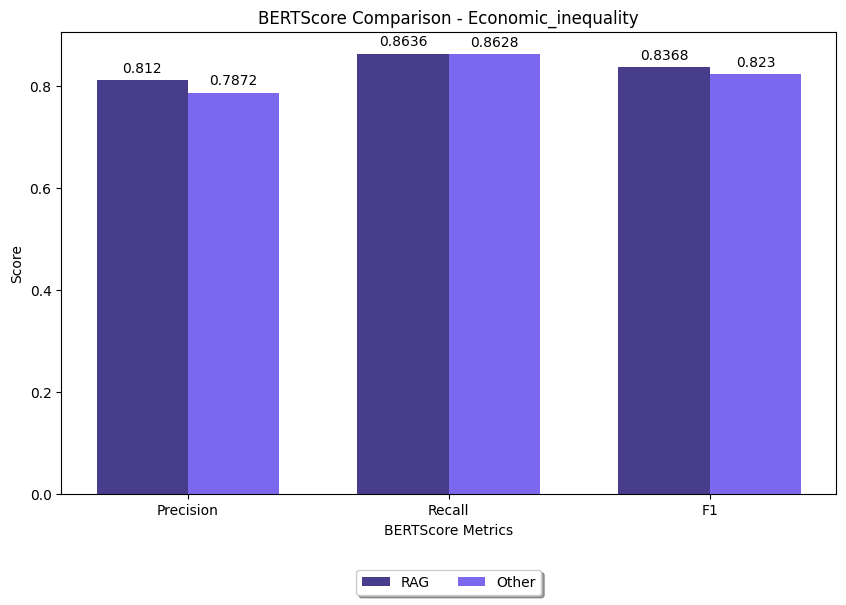

In [137]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Economic_inequality')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Doctor_Who

In [138]:
# Ground Truth
references = ["BBC",
"1963",
"TARDIS",
"a blue British police box",
"science-fiction"
]

In [139]:
# RAG
predictions_rag = ["The producer of Doctor Who is the BBC (British Broadcasting Corporation).",
"Doctor Who first appeared on television in 1963.",
"The name of Doctor Who's space ship is the TARDIS.",
"The exterior of the TARDIS resembles a blue British police box.",
"Doctor Who is a science-fiction television programme."
]

In [140]:
# Others
predictions_other = ["The producer of Doctor Who is the BBC.",
"Doctor Who first aired on TV in 1963.",
"Doctor Who's space ship is called the TARDIS.",
"The outside of the TARDIS resembles a blue British police box.",
"Doctor Who is a British science-fiction television programme"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


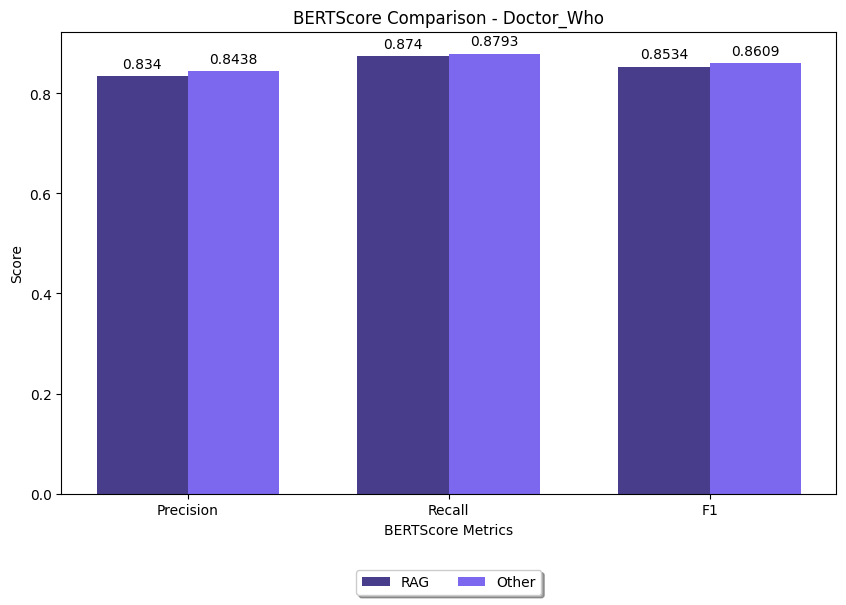

In [141]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Doctor_Who')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## University_of_Chicago

In [142]:
# Ground Truth
references = ["a private research university",
"1890",
"seven",
"four",
"15,000"
]

In [143]:
# RAG
predictions_rag = ["The University of Chicago is a private research university.",
"The University of Chicago was established in 1890.",
"The University of Chicago has seven professional schools.",
"The University of Chicago has four academic research divisions.",
"Currently, approximately 5,000 students are enrolled at the college and around 15,000 students in total at the University of Chicago."
]

In [144]:
# Others
predictions_other = ["Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


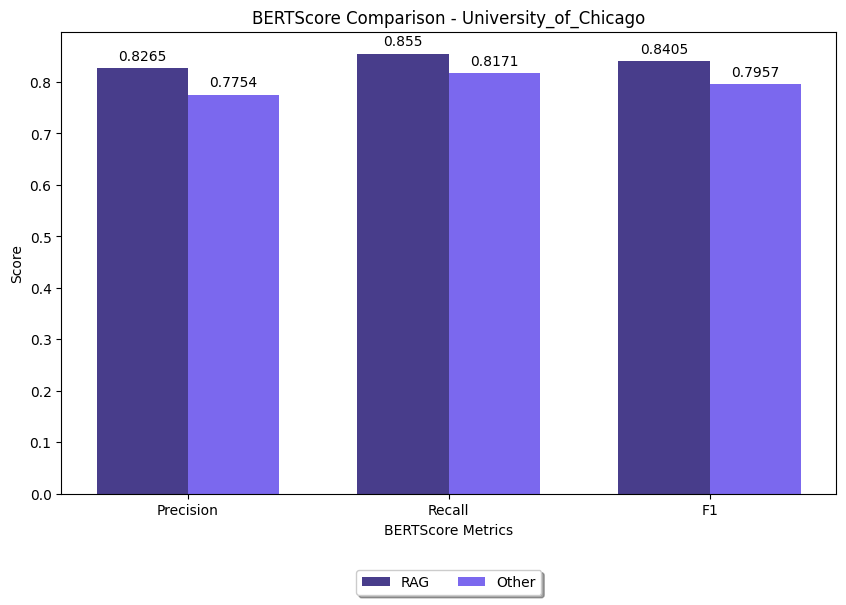

In [145]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - University_of_Chicago')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Yuan_dynasty

In [146]:
# Ground Truth
references = ["Yuán Cháo",
"the Great Yuan",
"Kublai Khan",
"Kublai Khan",
"1271"
]

In [147]:
# RAG
predictions_rag = ["The Chinese name for the Yuan dynasty is 元朝 (Yuán Cháo).",
"The official name of the Yuan dynasty is the Great Yuan (Chinese: 大元; pinyin: Dà Yuán; Mongolian: Yehe Yuan Ulus).",
"The Yuan dynasty was established by Kublai Khan, the leader of the Mongolian Borjigin clan.",
"The leader of the Mongolian Borjigin clan was Kublai Khan.",
"Kublai Khan formally declared the Yuan dynasty in 1271."
]

In [148]:
# Others
predictions_other = ["The Chinese name for the Yuan dynasty is 元朝 (Yuán Cháo)",
"The official name of the Yuan dynasty was 大元 (Dà Yuán), which translates to Great Yuan in English.",
"Kublai Khan started the Yuan dynasty.",
"Kublai Khan led the Mongolian Borjigin clan.",
"Kublai Khan formally declared the Yuan dynasty in 1271."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


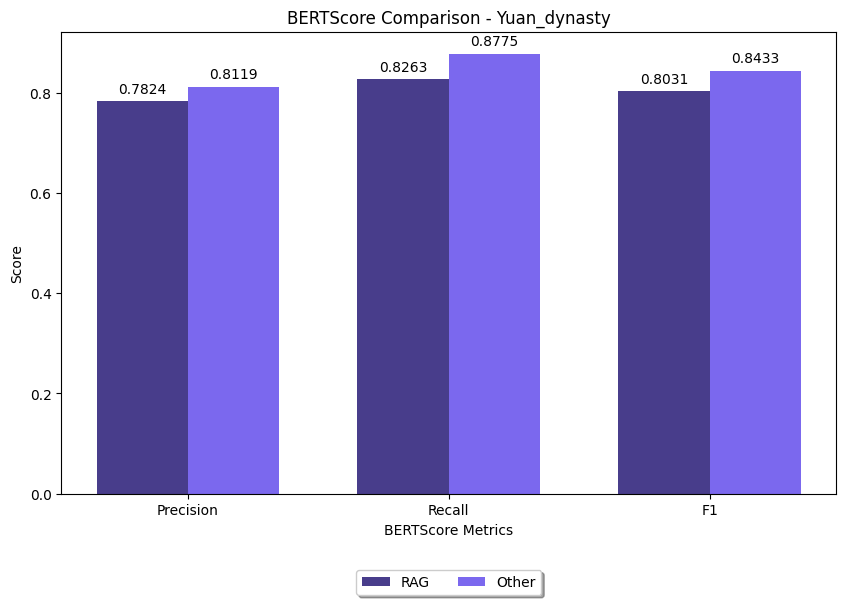

In [149]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Yuan_dynasty')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Kenya

In [150]:
# Ground Truth
references = ["Africa",
"East African Community",
"Nairobi",
"Tanzania",
"45 million people"
]

In [151]:
# RAG
predictions_rag = ["Kenya is located in Africa.",
"Kenya is a founding member of the East African Community (EAC).",
"The capital city of Kenya is Nairobi.",
"Tanzania borders the south of Kenya.",
"The population of Kenya in July 2014 was approximately 45 million people."
]

In [152]:
# Others
predictions_other = ["Kenya is located in Africa. It is bordered by Tanzania to the south, Uganda to the west, South Sudan to the northwest, Ethiopia to the north, and Somalia to the northeast. Kenya's territory lies on the equator and extends roughly from Lake Victoria to Lake Turkana (formerly called Lake Rudolf) and further southeast to the Indian Ocean. Its capital and largest city is Nairobi Kenya covers an area of 581,309 km2 (224,445 sq mi).In July 2014, Kenya had a population of approximately 45 million people.",
"Kenya is a founding member of the East African Community (EAC)",
"The capital of Kenya is Nairobi",
"Kenya is bordered by Tanzania to the south",
"The population of Kenya in July 2014 was approximately 45 million people"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


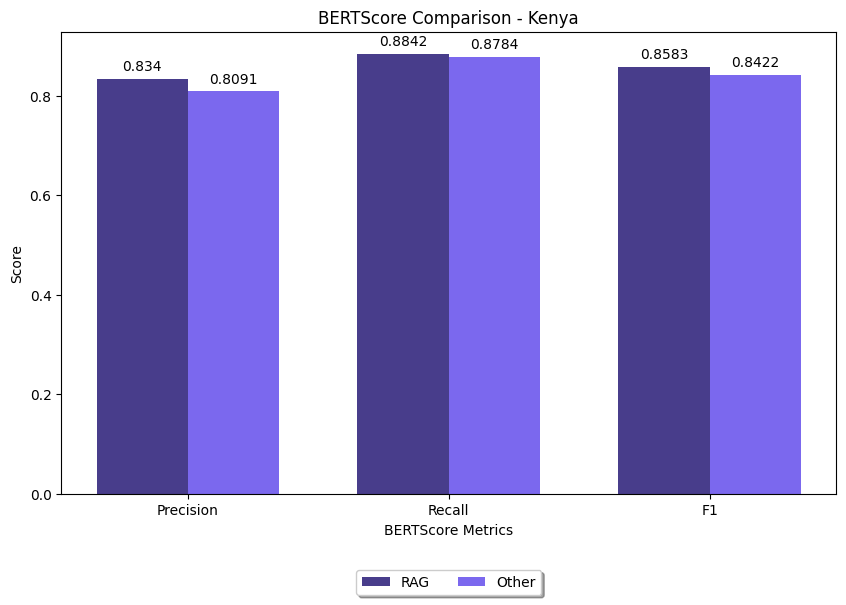

In [153]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Kenya')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Intergovernmental_Panel_on_Climate_Change

In [154]:
# Ground Truth
references = ["Hoesung Lee",
"Korean",
"Ismail El Gizouli",
"Bert Bolin",
"February 2015"
]

In [155]:
# RAG
predictions_rag = ["The chair of the IPCC is Hoesung Lee.",
"Hoesung Lee is a Korean economist.",
"The vice-chair of the IPCC is Ismail El Gizouli.",
"The first chair of the IPCC was Bert Bolin, who was elected in 1988.",
"Rajendra K. Pachauri resigned as chair of the IPCC in February 2015."
]

In [156]:
# Others
predictions_other = ["The chair of the IPCC is Hoesung Lee",
"Hoesung Lee is a Korean economist.",
"There is no information available in the provided sources about the current vice-chair of the IPCC.",
"The first chair of the IPCC was Bert Bolin in 1988.",
"Rajendra K. Pachauri resigned as chair of the IPCC in February 2015"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


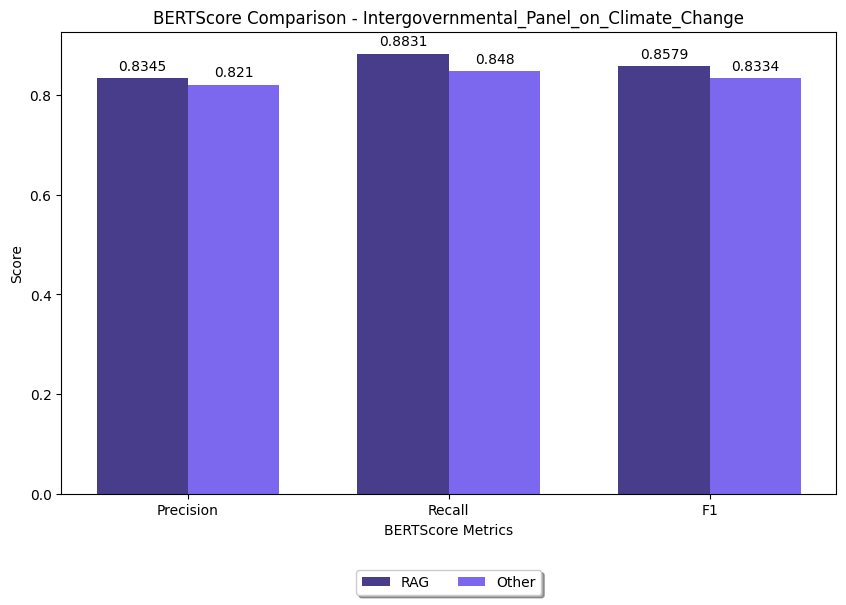

In [157]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Intergovernmental_Panel_on_Climate_Change')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

# Chloroplast

In [158]:
# Ground Truth
references = ["conduct photosynthesis",
"energy",
"energy",
"Calvin cycle",
"1"
]

In [159]:
# RAG
predictions_rag = ["The primary purpose of chloroplasts is to conduct photosynthesis.",
"ATP stores and carries energy in cells.",
"The primary purpose of NADPH is to store and transport energy in cells. It is a molecule that carries electrons and hydrogen ions, which are essential for many metabolic reactions, including the Calvin cycle in photosynthesis.",
"The term for the process of converting carbon dioxide into organic molecules is the Calvin cycle.",
"Algae typically has 1 chloroplast per cell."
]

In [160]:
# Others
predictions_other = ["The primary purpose of chloroplasts is to conduct photosynthesis. Chloroplasts contain the photosynthetic pigment chlorophyll, which captures sunlight energy and converts it into ATP and NADPH while releasing oxygen from water . They use the ATP and NADPH to synthesize organic molecules from carbon dioxide in a process called the Calvin cycle . Additionally, chloroplasts have other functions such as fatty acid synthesis, amino acid synthesis, and involvement in the immune response in plants . The number of chloroplasts per cell can vary, ranging from 1 in algae to up to 100 in plants like Arabidopsis and wheat.",
"ATP stores energy. ATP, or adenosine triphosphate, is an energy-storage molecule that is produced during photosynthesis in chloroplasts. It captures and stores the energy obtained from sunlight and is used as a source of energy for various cellular processes in plants and other organisms. ATP is composed of a nucleotide base (adenine), a sugar molecule (ribose), and three phosphate groups. The energy is stored in the high-energy bonds between the phosphate groups. When ATP is hydrolyzed, the terminal phosphate group is removed, releasing energy that can be used by cells for various metabolic reactions. This energy release is crucial for processes such as muscle contraction, active transport, and synthesis of macromolecules.",
"NADPH stores energy and reducing power. NADPH, or nicotinamide adenine dinucleotide phosphate, is a molecule that is produced during photosynthesis in chloroplasts . It serves as a carrier of high-energy electrons and hydrogen ions, which are used in various metabolic reactions. NADPH is generated through the light-dependent reactions of photosynthesis, where it receives electrons from water molecules and becomes reduced. This reduced form of NADPH is then used in the light-independent reactions, such as the Calvin cycle, to provide the necessary energy and reducing power for the synthesis of organic molecules from carbon dioxide . NADPH is involved in a wide range of cellular processes, including the production of carbohydrates, lipids, and amino acids, as well as in the detoxification of reactive oxygen species.",
"The process of turning CO2 into organic molecules is called the Calvin cycle. The Calvin cycle is a series of biochemical reactions that occur in the chloroplasts of plants during photosynthesis . It is also known as the light-independent reactions or the dark reactions . In this process, ATP and NADPH, which are produced during the light-dependent reactions, are used to convert carbon dioxide (CO2) into organic molecules, such as glucose . The Calvin cycle involves a series of enzyme-catalyzed reactions, including carbon fixation, reduction, and regeneration of the starting molecule, ribulose bisphosphate (RuBP) . Through a series of chemical reactions, carbon dioxide is incorporated into organic compounds, which can be used for energy storage and other metabolic processes in the plant.",
"Algae can have varying numbers of chloroplasts per cell. The number of chloroplasts per cell in algae can range from 1 to multiple chloroplasts per cell . The exact number of chloroplasts can depend on the species of algae and other factors such as environmental conditions and the stage of the algal life cycle. Some algae, such as diatoms, typically have a single chloroplast per cell . However, there are also algae species that can have multiple chloroplasts per cell, such as certain green algae and red algae. The number of chloroplasts per cell in algae can also vary depending on the specific physiological and metabolic requirements of the organism."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


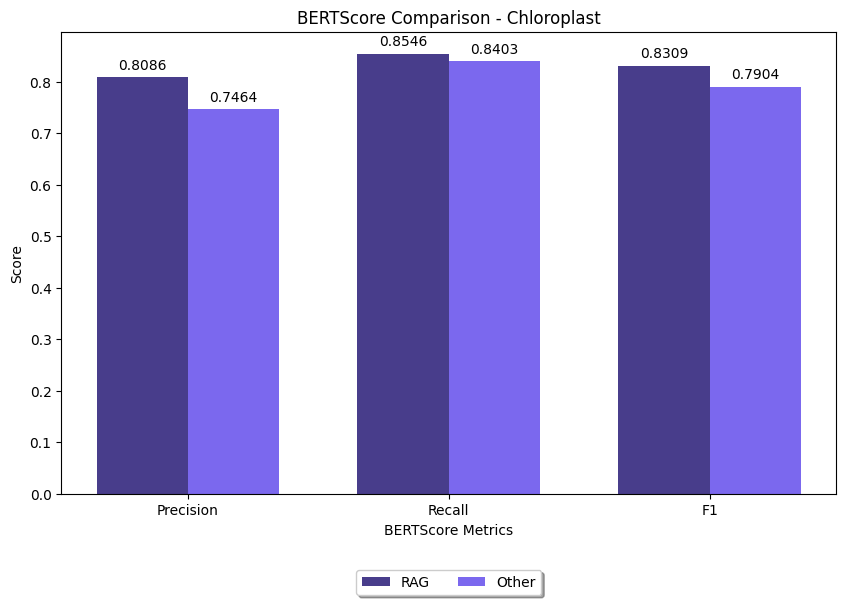

In [161]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Chloroplast')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Prime_number

In [162]:
# Ground Truth
references = ["primality",
"trial division",
"Miller–Rabin primality test",
"AKS primality test",
"22,338,618"
]

In [163]:
# RAG
predictions_rag = ["The property that designates a number as being prime or not is called primality.",
"The process that confirms the primality of a number n is called primality testing.",
"One algorithm useful for conveniently testing the primality of large numbers is the Miller-Rabin primality test.",
"Another algorithm that can be used to conveniently test the primality of large numbers is the Miller-Rabin primality test.",
"The largest known prime number as of January 2016 consists of 22,338,618 decimal digits."
]

In [164]:
# Others
predictions_other = ["The property that designates a number as being prime or not is called primality",
"The process which confirms the primality of a number n is called primality testing",
"The Miller-Rabin primality test is an algorithm useful for conveniently testing the primality of large numbers. It is faster than the trial division method but has a small probability of error. The test involves randomly selecting bases and performing modular exponentiation to check if the number is composite or probably prime. The more bases that are tested, the lower the probability of error. The Miller-Rabin primality test is widely used in practice due to its efficiency and reliability for large number.",
"The AKS primality test is another algorithm useful for conveniently testing the primality of large numbers. Unlike the Miller-Rabin primality test, the AKS primality test always produces the correct answer in polynomial time. However, it is considered too slow to be practical for large numbers. The AKS primality test is based on the concept of polynomial-time deterministic algorithms and uses modular arithmetic and algebraic properties to determine if a number is prime. While it is not commonly used in practice due to its inefficiency, the AKS primality test is significant in the field of number theory as it provides a deterministic algorithm for primality testing.",
"As of January 2016, the largest known prime number consists of 22,338,618 decimal digits."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


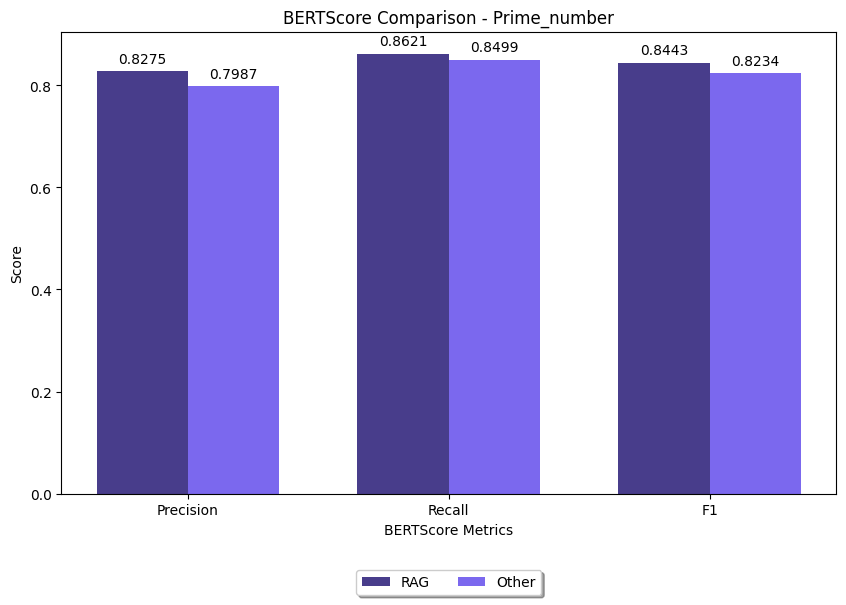

In [165]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Prime_number')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Rhine

In [166]:
# Ground Truth
references = ["Rhine-Meuse",
"Millingen aan de Rijn",
"Rhine Delta"
]

In [167]:
# RAG
predictions_rag = ["The name of the delta in the Netherlands is the Rhine-Meuse Delta.",
"The Delta in the Netherlands begins near Millingen aan de Rijn, close to the Dutch-German border with the division of the Rhine into Waal and Nederrijn.",
"The nickname for the delta in the Netherlands is the Rhine-Meuse Delta"
]

In [168]:
# Others
predictions_other = ["The name of the Delta in the Netherlands is the Rhine-Meuse Delta.",
"The Delta in the Netherlands, known as the Rhine-Meuse Delta, begins near Millingen aan de Rijn, close to the Dutch-German border, with the division of the Rhine into Waal and Nederrijn",
"The nickname for the Delta in the Netherlands is the Rhine-Meuse Delta"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


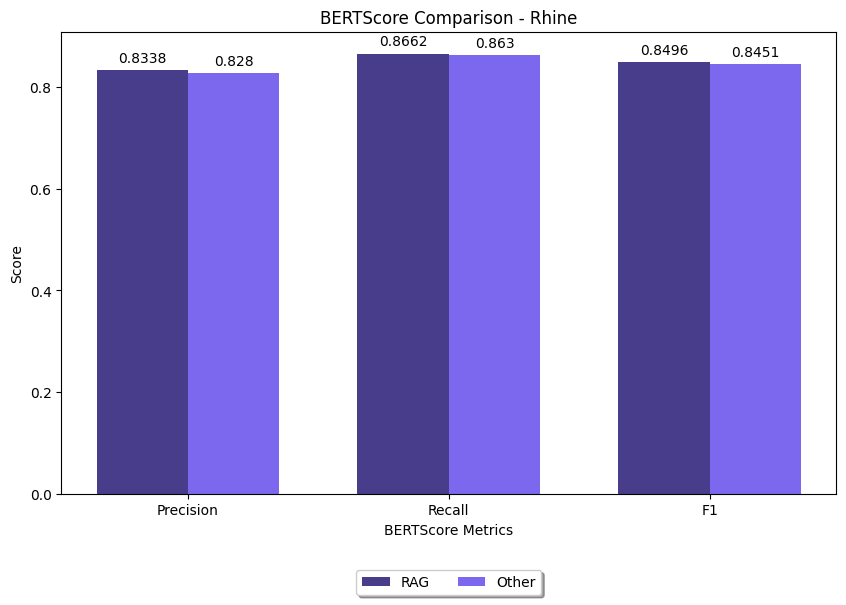

In [169]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Rhine')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Scottish_Parliament

In [170]:
# Ground Truth
references = ["1998",
"Scotland Act",
"in which it can make laws",
"Parliament of the United Kingdom",
"Westminster"
]

In [171]:
# RAG
predictions_rag = ["The current Parliament of Scotland was convened on 12 May 1999.",
"The Scotland Act 1998 outlined the powers of the Scottish Parliament as a devolved legislature",
"The legislative competence of the Scottish Parliament includes all areas that are not explicitly reserved to the Parliament of the United Kingdom.",
"The Scotland Act 1998 explicitly specifies certain powers as being reserved for the Parliament of the United Kingdom.",
"The Scottish Parliament may legislate as it pleases as long as the powers aren't already reserved by the Parliament of the United Kingdom (Westminster)."
]

In [172]:
# Others
predictions_other = ["The current parliament of Scotland was convened by the Scotland Act 1998.",
"The Scotland Act 1998 set out the powers of the Scottish Parliament as a devolved legislature.",
"The legislative competence of the Scottish Parliament includes the power to make laws in all areas that are not explicitly reserved to the Parliament of the United Kingdom. The Scotland Act 1998 delineates the legislative competence of the Scottish Parliament by specifying powers that are reserved to the UK Parliament. The British Parliament retains the ability to amend the terms of reference of the Scottish Parliament, and can extend or reduce the areas in which it can make laws. However, the Scottish Parliament has the authority to legislate in all areas that are not explicitly reserved to Westminster",
"The powers that are explicitly specified as being reserved for the Parliament of the United Kingdom.",
"The Scottish Parliament may legislate in areas that are not explicitly reserved to the Parliament of the United Kingdom. The Scotland Act 1998 outlines the legislative competence of the Scottish Parliament, specifying powers that are reserved to the UK Parliament. The British Parliament has the authority to amend the terms of reference of the Scottish Parliament and can extend or reduce the areas in which it can make laws. However, the Scottish Parliament retains the power to make laws in all areas that are not explicitly reserved to Westminster."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


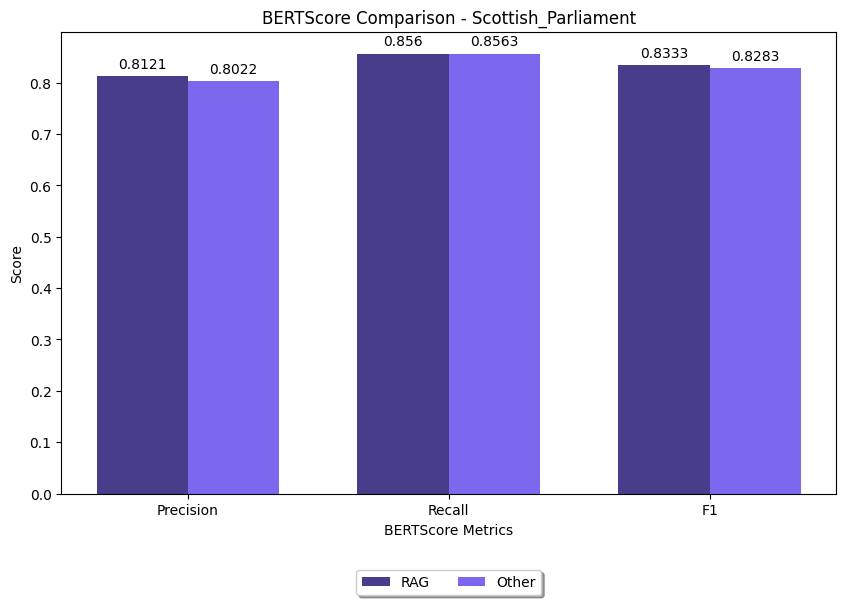

In [173]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Scottish_Parliament')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Islamism

In [174]:
# Ground Truth
references = ["Islamism",
"all spheres of life",
"reordering of government and society in accordance with the Shari'a",
"two poles",
"revolution or invasion"
]

In [175]:
# RAG
predictions_rag = ["The name for an Islamic revival movement is Islamism or Political Islam.",
"Islamism aims to incorporate itself into all spheres of life.",
"Islamism aims to reorder society and government in accordance with the principles of Shari'a, which is Islamic law. It seeks to implement Islamic values in all aspects of life and promote moral conservatism.",
"The two different Islamist movements have been described as oscillating between two poles: one end is a strategy of Islamization of society through state power seized by revolution or invasion, and at the other end is a reformist pole where Islamists work to Islamize society gradually from the bottom up.",
"One strategy of Islamization is to seize power through revolution or invasion."
]

In [176]:
# Others
predictions_other = ["Islamic revival movement refers to a movement within Islam that seeks to revive and strengthen Islamic values and practices in society. It is characterized by moral conservatism, literalism, and the desire to implement Islamic principles in all aspects of life . This movement aims to reorder government and society in accordance with Sharia, the Islamic law . There are two main strategies within the Islamic revival movement: Islamization of society through state power: Some Islamists advocate for the Islamization of society by seizing state power through revolution or invasion . Gradual Islamization from the bottom up: Other Islamists work towards Islamizing society gradually, starting from the grassroots level",
"These movements have had a significant impact on the Middle East, redefining politics and even borders in the region",
"Government: Islamism aims to reorder government in accordance with Sharia, the Islamic law, favoring the implementation of Islamic values in the governance of a society . Society: Islamism seeks to Islamize society by promoting and enforcing Islamic principles and values in various spheres of life . Politics: Islamic revival movements have had a significant impact on politics in the Middle East, redefining political dynamics and influencing political decision-making processes . Borders: According to journalist Robin Wright, Islamist movements have redefined borders in the Middle East, suggesting that their influence extends beyond national boundaries. Note: The provided sources do not explicitly mention all aspects of life that Islamism seeks to integrate into. However, based on the information provided, these are the aspects that can be inferred.",
"Islamism seeks to implement Islamic values in all spheres of life and integrate them into society . It aims to reorder government and society in accordance with Sharia, the Islamic law . Islamism advocates for the Islamization of society by promoting and enforcing Islamic principles and values . It strives to establish a moral conservative society based on Islamic teachings . Islamism aims to transform politics by influencing political decision-making processes and redefining political dynamics . It seeks to alter the Middle East by redefining politics and even borders in the region. Note: The provided sources do not explicitly mention the specific goals of Islamism in society and government. However, based on the information provided, these are the goals that can be inferred.",
"The two different Islamist movements have been described as oscillating between two poles: One pole is the strategy of Islamization of society through state power seized by revolution or invasion. The other pole is the reformist approach, where Islamists work to Islamize society gradually from the bottom up. Note: The provided source, Context_1, explicitly mentions the oscillation between these two poles in describing the different Islamist movements. Islamization can be achieved through seizing power by revolution or invasion . Some Islamist movements employ a strategy of taking control of the state through revolutionary means in order to implement Islamic values in society . This approach involves using force or overthrowing existing governments to establish an Islamic state . By seizing power through revolution or invasion, Islamists aim to reorder government and society according to Sharia, the Islamic law. Note: The provided source, Context_1, mentions the strategy of Islamization through seizing power by revolution or invasion. The information provided in the answer is based on this source."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


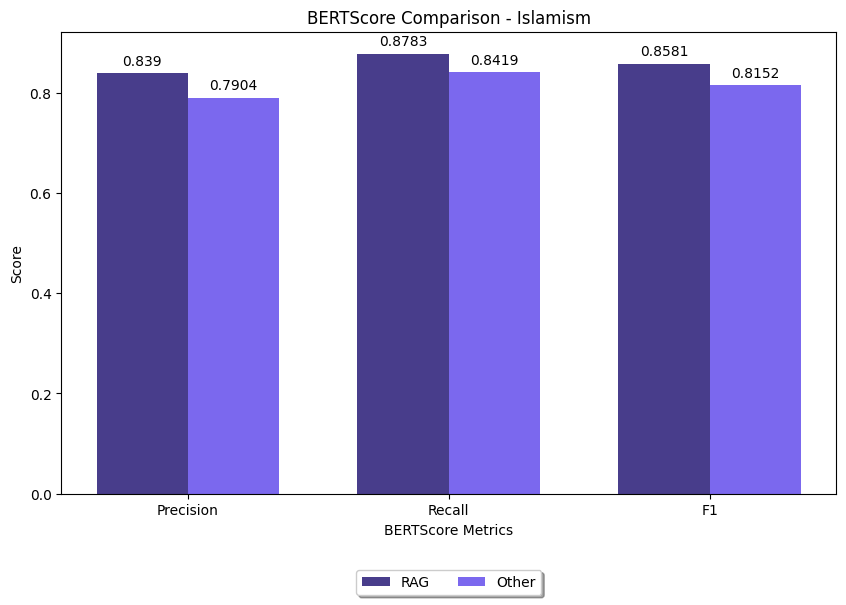

In [177]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Islamism')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Imperialism

In [178]:
# Ground Truth
references = ["Latin",
"colonization, use of military force, or other means",
"Japanese",
"technologies and ideas"
]

In [179]:
# RAG
predictions_rag = ["The word imperialism originated from the Latin language.",
"Imperialism is usually administered through various means, including colonization, the use of military force, and economic dominance.",
"The term imperialism has been applied to both Western and Japanese political and economic dominance",
"The rapid spread attributed to imperialism includes the spread of technologies and ideas."
]

In [180]:
# Others
predictions_other = ["The word imperialism has its origins in the ancient language of Latin.",
"Colonization: Imperial powers establish colonies in foreign territories to extend their control and influence. Colonies serve as a means to exploit resources, establish political control, and spread cultural influence. Military force: Imperialism often involves the use of military power to assert dominance and control over other nations. This can include military interventions, occupations, and the establishment of military bases. Economic dominance: Imperial powers exert control over the economies of other nations through economic exploitation, trade dominance, and unequal economic relationships. This can involve the extraction of resources, establishment of trade networks, and imposition of economic policies. System of domination and subordination: Some scholars, like Edward Said, use the term imperialism more broadly to describe any system of domination and subordination organized with an imperial center and a periphery. This can include political, economic, and cultural mechanisms that maintain unequal power relations.",
"Imperialism has been applied to Western countries, as well as Japan, as an example of an Eastern country that engaged in imperialistic practices.",
"Technologies: Imperialism has facilitated the rapid spread of technologies across different regions. The imperial powers, particularly Western countries, introduced and disseminated technologies such as transportation, communication, and industrial machinery to their colonies and territories, leading to their adoption and integration into local societies. Ideas: Imperialism has also played a significant role in the spread of ideas. Western imperialism, in particular, brought with it Western political, economic, and cultural ideologies, which were imposed on colonized territories. This led to the diffusion of Western ideas and values, such as democracy, capitalism, and modernization, influencing the political and social landscapes of colonized regions. Cultural influences: Imperialism has facilitated the exchange and diffusion of cultures. Through colonization and the establishment of imperial centers, Western powers spread their cultural practices, languages, and customs to their colonies. This resulted in the blending and hybridization of cultures, as well as the adoption of Western cultural elements by colonized societies"
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


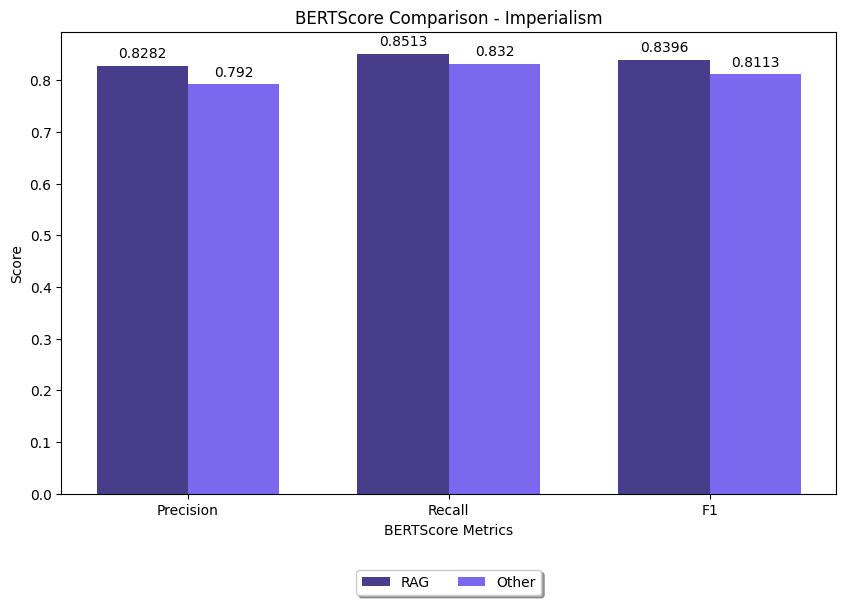

In [181]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Imperialism')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## United_Methodist_Church

In [182]:
# Ground Truth
references = ["United Methodist Church",
"mainline Protestant Methodist denomination",
"1968",
"union of the Methodist Church (USA) and the Evangelical United Brethren Church",
"Wesleyan"
]

In [183]:
# RAG
predictions_rag = ["UMC stands for United Methodist Church.",
"The United Methodist Church (UMC) is a mainline Protestant Methodist denomination that was founded in 1968 through the union of the Methodist Church (USA) and the Evangelical United Brethren Church.",
"The United Methodist Church was founded in 1968.",
"The United Methodist Church was founded in 1968 by the union of the Methodist Church (USA) and the Evangelical United Brethren Church",
"The theological orientation of the United Methodist Church is decidedly Wesleyan."
]

In [184]:
# Others
predictions_other = ["UMC stands for United Methodist Church.",
"The United Methodist Church (UMC) is a mainline Protestant Methodist denomination that was founded in 1968 through the union of the Methodist Church (USA) and the Evangelical United Brethren Church. It traces its roots back to the revival movement of John and Charles Wesley in England as well as the Great Awakening in the United States. The UMC is known for its Wesleyan theological orientation, which combines both liturgical and evangelical elements.",
"The United Methodist Church (UMC) was founded in 1968 through the union of the Methodist Church (USA) and the Evangelical United Brethren Church. The Methodist Church (USA) itself had its roots in the 19th-century revival movement led by John and Charles Wesley in England, as well as the Great Awakening in the United States. The UMC embraces a Wesleyan theological orientation, which is influenced by the teachings of John Wesley. It combines both liturgical and evangelical elements in its worship and practices. The UMC is considered a mainline Protestant denomination and is known for its commitment to social justice and community service.",
"The United Methodist Church (UMC) was founded in 1968 through the union of the Methodist Church (USA) and the Evangelical United Brethren Church . The Methodist Church (USA) itself traces its roots back to the revival movement of John and Charles Wesley in England as well as the Great Awakening in the United States . While John and Charles Wesley were influential figures in the development of Methodism, they did not directly found the United Methodist Church as it exists today. Instead, the UMC was formed through the merger of these two denominations in 1968",
"The United Methodist Church (UMC) has a theological orientation that is decidedly Wesleyan, reflecting its roots in the revival movement led by John and Charles Wesley in England and the Great Awakening in the United States . This theological orientation is influenced by the teachings of John Wesley, who emphasized the importance of personal faith, social justice, and holiness . The UMC embraces both liturgical and evangelical elements in its worship and practices, combining traditional liturgical rituals with a focus on evangelism and spreading the message of the Gospel . The church's theological orientation is characterized by a commitment to social justice and community service, aligning with Wesleyan principles of caring for the marginalized and working towards a more just society."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


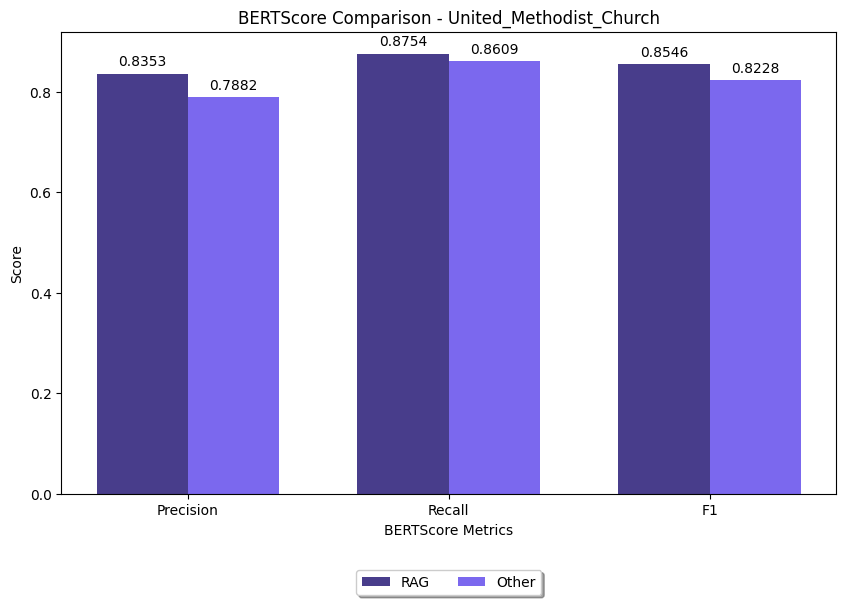

In [185]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - United_Methodist_Church')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## French_and_Indian_War

In [186]:
# Ground Truth
references = ["1754–1763",
"British America and New France",
"60,000 European settlers",
"2 million"
]

In [187]:
# RAG
predictions_rag = ["The French and Indian War took place from 1754 to 1763.",
"The countries involved in the French and Indian War were Great Britain and France.",
"The population of the French North American colonies at the start of the French and Indian War was roughly 60,000 European settlers.",
"The population of the British North American colonies at the start of the French and Indian War was approximately 2 million."
]

In [188]:
# Others
predictions_other = ["The French and Indian War took place from 1754 to 1763.",
"The French and Indian War was fought between the colonies of British America and New France. Both sides were supported by military units from their parent countries of Great Britain and France. Native American allies also supported both sides in the war",
"At the start of the French and Indian War, the French North American colonies had a population of roughly 60,000 European settlers.",
"At the start of the French and Indian War, the British North American colonies had a population of 2 million European settlers."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


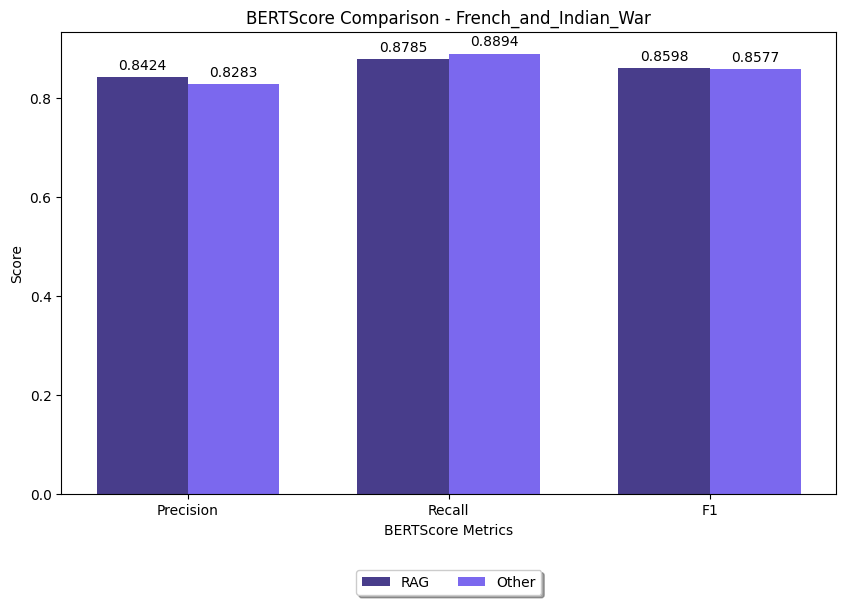

In [189]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - French_and_Indian_War')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

## Force

In [190]:
# Ground Truth
references = ["the concept of force",
"A fundamental error",
"Sir Isaac Newton",
"nearly three hundred years",
"Einstein"
]

In [191]:
# RAG
predictions_rag = ["Philosophers in antiquity used the concept of force to study simple machines.",
"In antiquity, there was a belief that a force is required to maintain motion, even at a constant velocity.",
"Sir Isaac Newton had mathematical insight.",
"It took nearly three hundred years to improve on Sir Isaac Newton's laws of motion.",
"Einstein developed the theory of relativity."
]

In [192]:
# Others
predictions_other = ["Philosophers in antiquity used the concept of force to study simple machines",
"The belief that maintaining motion required force was a fundamental error in the understanding of motion and force held by philosophers in antiquity, such as Aristotle and Archimedes . They believed that a force is required to keep an object in motion, even at a constant velocity . However, this belief was eventually corrected by the insights of Galileo Galilei and Sir Isaac Newton . Newton formulated laws of motion that demonstrated that an object in motion will remain in motion unless acted upon by an external force, known as the principle of inertia . This understanding revolutionized the study of motion and force and laid the foundation for modern physic",
"Sir Isaac Newton had mathematical insight.",
"Improvements on Sir Isaac Newton's laws of motion took nearly three hundred years to occur. Newton formulated the laws of motion with his mathematical insight, and these laws remained unimproved for a significant period of time. However, in the early 20th century, Albert Einstein developed the theory of relativity, which provided a new understanding of forces and motion. Einstein's theory correctly predicted the action of forces on objects with increasing momenta near the speed of light and also provided insights into the forces produced by gravitation and inertia. This development in the field of physics built upon Newton's laws and expanded our understanding of motion and force.",
"Albert Einstein developed the theory of relativity. In the early 20th century, Einstein formulated the theory of relativity, which revolutionized our understanding of space, time, and gravity. The theory of relativity consists of two major parts: the special theory of relativity and the general theory of relativity. The special theory of relativity, published by Einstein in 1905, introduced the concept of the constancy of the speed of light and the equivalence of mass and energy (E=mc²). The general theory of relativity, published by Einstein in 1915, provided a new understanding of gravity as the curvature of spacetime caused by mass and energy. Einstein's theory of relativity has been extensively tested and confirmed through various experiments and observations, and it remains one of the fundamental pillars of modern physics."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


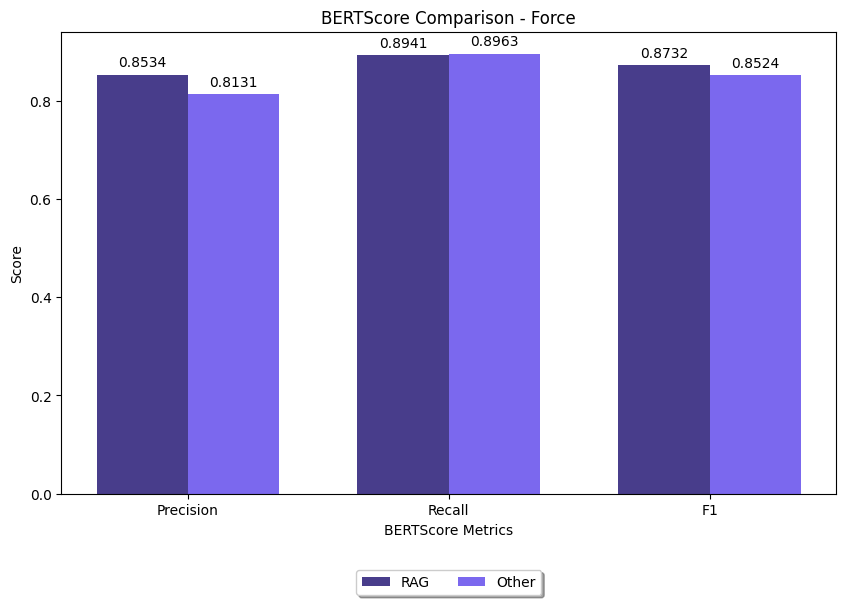

In [193]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison - Force')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)

# ALL COMPARISON

In [194]:
# Ground Truth
references = ["six",
"45",
"10",
"27",
"Greg Olsen",
"45",
"99.4",
"77",
"receivers",
"Jonathan Stewart",
"six",
"Cam Newton",
"3,837",
"45",
"six",
"500",
"3,837",
"45",
"99.4",
"39",
"Nobel Prize",
"1745",
"Maria Skłodowska-Curie",
"Famous musicians",
"seven months old",
"France",
"10th and 11th centuries",
"Denmark, Iceland and Norway",
"Rollo",
"10th century",
"1893",
"high-voltage",
"mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging",
"Colorado Springs",
"1893",
"boat",
"Wardenclyffe Tower project",
"Computational complexity theory",
"inherent difficulty",
"computational problem",
"the curriculum",
"pedagogy",
"university or college",
"lesson plan",
"school",
"10 November 1483",
"Eisleben, Saxony",
"Holy Roman Empire",
"Catholic",
"lawyer",
"Pacific",
"seven",
"over 12 million inhabitants",
"San Diego",
"17.5 million",
"Sky+ PVR",
"September 2007",
"monthly fee",
"January 2010",
"Sky+HD Box",
"highly diversified",
"second",
"fourth",
"Melbourne",
"Melbourne Cricket Ground",
"derision",
"Geneva",
"Besançon Hugues",
"Amboise plot",
"1560",
"atmospheric engine",
"Thomas Newcomen",
"1712",
"steam pump",
"Papin",
"monatomic",
"simplest",
"HO",
"hydrogen",
"Avogadro's law",
"to avoid being targeted by the boycott",
"They arranged for Israel to pull back from the Sinai Peninsula and the Golan Heights",
"January 18, 1974",
"March 1974",
"Project Mercury",
"National Aeronautics and Space Administration (NASA)",
"1968",
"John F. Kennedy",
"two-man",
"administrative law",
"1986",
"All actions",
"constitutional law",
"Deforestation",
"1960s",
"slash and burn",
"loss of soil fertility and weed invasion",
"areas cleared of forest are visible to the naked eye",
"tentilla",
"specialized mushroom-shaped cells in the outer layer of the epidermis",
"they contain striated muscle",
"three types of movement",
"capturing prey",
"Fresno",
"220 miles (350 km)",
"ash tree",
"ash leaf",
"(/ˈfrɛznoʊ/ FREZ-noh)",
"complete addressing information",
"individually",
"destination address, source address, and port numbers",
"reassembled",
"Central Asia",
"merchant ships",
"30–60% of Europe's total population",
"17th century",
"19th century",
"melt (magma and/or lava)",
"metamorphic rock",
"new magma",
"igneous, sedimentary, and metamorphic",
"heat and pressure",
"103 miles",
"8.5 mi",
"the English Core Cities Group and Eurocities",
"Northumberland",
"Geordie",
"12.5 acres",
"145 galleries",
"5,000 years",
"Europe, North America, Asia and North Africa",
"post-classical sculpture",
"October 12, 1943",
"radio network",
"1948",
"ESPN",
"Capital Cities Communications",
"Ögedei Khan",
"1227",
"Western Xia",
"his sons and grandsons",
"Mongolia",
"pharma",
"ingredients for medicines, sold tobacco and patent medicines",
"sorcery or even poison",
"outdated",
"many other herbs",
"pattern recognition receptors",
"innate immune system",
"microorganisms",
"non-specific",
"acquittal and avoid imprisonment",
"use the proceedings as a forum to inform the jury and the public of the political circumstances surrounding the case",
"inform the jury and the public of the political circumstances",
"Vietnam War",
"jury nullification",
"Construction",
"manufacturing",
"six to nine percent",
"planning, design, and financing",
"a known client",
"independent schools",
"academic",
"tuition",
"select their students",
"John Harvard",
"1977",
"James Bryant Conant",
"Association of American Universities",
"Charles W. Eliot",
"Jacksonville",
"1,345,596",
"12th",
"Duval County",
"1968",
"market",
"Economist",
"rare and desired skills",
"political power generated by wealth",
"rent-seeking",
"BBC",
"1963",
"TARDIS",
"a blue British police box",
"science-fiction",
"a private research university",
"1890",
"seven",
"four",
"15,000",
"Yuán Cháo",
"the Great Yuan",
"Kublai Khan",
"Kublai Khan",
"1271",
"Africa",
"East African Community",
"Nairobi",
"Tanzania",
"45 million people",
"Hoesung Lee",
"Korean",
"Ismail El Gizouli",
"Bert Bolin",
"February 2015",
"conduct photosynthesis",
"energy",
"energy",
"Calvin cycle",
"1",
"primality",
"trial division",
"Miller–Rabin primality test",
"AKS primality test",
"22,338,618",
"Rhine-Meuse",
"Millingen aan de Rijn",
"Rhine Delta",
"1998",
"Scotland Act",
"in which it can make laws",
"Parliament of the United Kingdom",
"Westminster",
"Islamism",
"all spheres of life",
"reordering of government and society in accordance with the Shari'a",
"two poles",
"revolution or invasion",
"Latin",
"colonization, use of military force, or other means",
"Japanese",
"technologies and ideas",
"United Methodist Church",
"mainline Protestant Methodist denomination",
"1968",
"union of the Methodist Church (USA) and the Evangelical United Brethren Church",
"Wesleyan",
"1754–1763",
"British America and New France",
"60,000 European settlers",
"2 million",
"the concept of force",
"A fundamental error",
"Sir Isaac Newton",
"nearly three hundred years",
"Einstein"
]

In [195]:
# RAG
predictions_rag = ["There were six Pro Bowlers on the Panthers offense.",
"Cam Newton scored a total of 45 touchdowns on the Panthers offense.",
"Cam Newton threw a total of 10 interceptions.",
"Ted Ginn Jr. returned 27 punts.",
"Greg Olsen started at tight end for the Panthers.",
"The record number of touchdowns Cam Newton has had is 45, with 35 passing touchdowns and 10 rushing touchdowns.",
"The highest quarterback rating that Cam Newton holds is 99.4.",
"The given context does not provide information about the most passes that Greg Olsen has had in a season.",
"Jerricho Cotchery plays as a wide receiver.",
"The Panthers RB who scored 6 TDs in the 13 games leading up to Super Bowl 50 was Jonathan Stewart.",
"There were six offensive players from the Panthers who were selected to play in the Pro Bowl.",
"The quarterback for the Carolina Panthers is Cam Newton.",
"Cam Newton threw for 3,837 yards in 2015.",
"Cam Newton had a total of 35 passing touchdowns and 10 rushing touchdowns in the 2015 season, making a total of 45 touchdowns.",
"Jonathan Stewart had six touchdowns in 13 games.",
"Carolina led the NFL in scoring with 500 points for offensive plays.",
"Cam Newton accumulated 3,837 passing yards in the 2015 season.",
"Cam Newton had a total of 45 touchdowns in the 2015 season.",
"Newton's quarterback rating for the 2015 season was 99.4.",
"Jerricho Cotchery had 39 receptions for the 2015 season.",
"Maria Skłodowska-Curie was the first female recipient of the Nobel Prize.",
"Casimir Pulaski was born in Warsaw in the year 1745.",
"One of the most famous people born in Warsaw is Maria Skłodowska-Curie.",
"Frédéric Chopin was a famous musician, composer, and pianist. He was born in the village of Żelazowa Wola, Poland in 1810 and later moved to Warsaw with his family. Chopin is known for his compositions for the piano, including his numerous nocturnes, waltzes, and études. He is considered one of the greatest composers for the piano in the Romantic era.",
"Chopin moved to Warsaw with his family when he was seven months old.",
"Normandy is located in France.",
"The Normans were in Normandy in the 10th and 11th centuries.",
"The Norse originated from Denmark, Iceland, and Norway.",
"The Norse leader was Rollo.",
"The Normans first gained their separate identity in the first half of the 10th century.",
"Tesla made pronouncements on the possibility of wireless communication with his devices in 1893.",
"Tesla's experiments were conducted with high-voltage.",
"Some of Tesla's experiments included high-voltage, high-frequency power experiments, wireless lighting and electricity distribution experiments, experiments with mechanical oscillators/generators, electrical discharge tubes, early X-ray imaging, and the construction of a wireless controlled boat.",
"Tesla conducted experiments in both New York and Colorado Springs.",
"Tesla first mentioned the possibility of wireless communication with his devices in 1893.",
"Tesla built a wireless controlled boat.",
"His unfinished project was called the Wardenclyffe Tower.",
"The branch of theoretical computer science that deals with broadly classifying computational problems by difficulty and class of relationship is computational complexity theory.",
"Computational problems are classified utilizing computational complexity theory based on their inherent difficulty.",
"The term for a task that is generally well-suited for computer-based solutions is a computational problem.",
"A course of study is called the curriculum.",
"The science of teaching is called pedagogy.",
"Most teachers typically obtain their credentials from a university or college.",
"A teacher can use a lesson plan to facilitate student learning.",
"A teacher is most likely to be teaching at a school or another place of formal education.",
"Martin Luther was born on November 10, 1483.",
"Martin Luther was born in Eisleben, Saxony, which was part of the Holy Roman Empire at the time.",
"Saxony belonged to the region of the Holy Roman Empire.",
"Martin Luther was baptized as a Catholic.",
"Martin's father, Hans Luther, wanted his son to become a lawyer.",
"Southern California touches the Pacific coast.",
"Southern California's population encompasses seven metropolitan areas.",
"The population of the Los Angeles area is over 12 million inhabitants.",
"The San Diego area has the least number of inhabitants among the three heavily populated areas.",
"The Greater Los Angeles Area has over 17.5 million people.",
"BSkyB initially charged additional subscription fees for using a Sky+ PVR with their service.",
"The TV advertising campaign targeting Sky+ at women was launched in September 2007.",
"Customers who do not subscribe to BSkyB's channels can still pay a monthly fee to enable Sky+ functions.",
"The Sky+ Box was discontinued by BSkyB in January 2010.",
"The Sky+ Box was replaced by the Sky+HD Box.",
"The economy of Victoria is highly diversified, with service sectors such as financial and property services, health, education, wholesale, retail, hospitality, and manufacturing constituting the majority of employment.",
"Victoria is ranked second in terms of gross state product (GSP) among the Australian states.",
"Victoria is ranked fourth in terms of gross state product (GSP) per capita in Australia.",
"The city in Victoria known as the sporting capital of Australia is Melbourne.",
"The largest stadium in Australia is the Melbourne Cricket Ground (MCG).",
"The term Huguenot was originally meant to confer a derogatory nickname.",
"The Swiss city that was the center of the Calvinist movement was Geneva.",
"The term Huguenot may be related to the Swiss politician Besançon Hugues.",
"The name given to the plot to usurp power from the French House of Guise was the Amboise plot of 1560.",
"The attempt referred to as the Amboise plot took place in 1560.",
"The first commercially successful true engine was the atmospheric engine, invented by Thomas Newcomen around 1712.",
"The atmospheric engine was invented by Thomas Newcomen.",
"The atmospheric engine was invented around 1712.",
"Savery invented the steam pump.",
"The piston was proposed by Denis Papin.",
"John Dalton believed that all elements were monatomic.",
"According to Dalton's belief, the atomic ratios between atoms in compounds were assumed to be the simplest ratios with respect to one another.",
"Dalton's incorrect formula for water was HO.",
"Gay-Lussac and von Humboldt discovered that hydrogen was present in twice the amount of oxygen in water.",
"The theory that presented the assumption of diatomic molecules in 1811 is Avogadro's law.",
"The European nations and Japan sought to disassociate themselves from United States foreign policy in the Middle East during the crisis to avoid being targeted by the boycott.",
"The context does not provide specific details on how the Nixon Administration negotiated with the uncooperative countries during the 1973 oil crisis. It only mentions that the administration began multilateral negotiations with the combatants and that US Secretary of State Henry Kissinger negotiated an Israeli troop withdrawal from parts of the Sinai Peninsula. The exact methods and strategies used in the negotiations are not mentioned.",
"Henry Kissinger negotiated the withdrawal of Israeli troops from the Sinai Peninsula on January 18, 1974.",
"Arab oil producers lifted the embargo in March 1974.",
"The project that put the first Americans into space was Project Mercury.",
"The program that was created to carry out the projects and missions that put the first Americans into space and the first manned Apollo flight in 1968 is the Apollo program.",
"The first manned Apollo flight occurred in 1968.",
"President John F. Kennedy is credited with the original notion of putting Americans in space.",
"The project that followed Project Mercury was Project Gemini, which involved two people in each mission.",
"Administrative law makes EU institutions and its member states follow the law.",
"Citizens or corporations were said to have no ability to bring claims against non-state parties in 1986.",
"All actions by EU institutions can be subject to judicial review.",
"Constitutional law concerns the European Union's governance structure.",
"The process of removing trees from a forest is known as deforestation.",
"Access to the Amazon rainforest was restricted prior to the early 1960s.",
"The slash and burn method was used to clear the forest for crop cultivation in the Amazon forest.",
"Two factors that made it difficult for colonists in the Amazon forest to survive were the loss of soil fertility and weed invasion.",
"When seen from space, the Amazon forest appears to have cleared areas where deforestation has taken place. These cleared areas are visible to the naked eye, indicating the extent of deforestation and the environmental damage caused.",
"The tentacles of cydippid ctenophores are typically fringed with tentilla (""little tentacles"").",
"Colloblasts are specialized mushroom-shaped cells found in the outer layer of the epidermis of cydippid ctenophores. They have three main components: a domed head with adhesive-containing vesicles, a stalk that anchors the cell, and a spiral thread that coils around the stalk. Colloblasts are densely present on the tentacles and tentilla of ctenophores and are responsible for capturing prey by sticking to it.",
"The tentilla of Euplokamis, a genus of ctenophores, differ from those of other cydippids in a few ways. Firstly, Euplokamis' tentilla contain striated muscle, which is a cell type not typically found in the phylum Ctenophora.",
"Euplokamis tentilla have three types of movement: flicking, wriggling, and coiling.",
"The euplokamis uses the three types of movement (flicking, wriggling, and coiling) for capturing prey",
"Fresno is the fifth-largest city in California.",
"The distance between Fresno and Los Angeles is approximately 220 miles (350 km).",
"The name Fresno means ash tree in Spanish.",
"An ash leaf is featured on the flag of the city of Fresno.",
"Fresno is pronounced as FREZ-noh.",
"In connectionless mode, each packet includes complete addressing information. This includes the destination address, source address, port numbers, and potentially the sequence number of the packet.",
"In connectionless mode, each packet is routed individually.",
"Each packet label includes the following information: Destination address, Source address, Port numbers, Sequence number (optional)",
"At the destination, the original message or data is reassembled in the correct order based on the packet sequence number.",
"The Black Death is thought to have originated in the arid plains of Central Asia.",
"The Black Death is believed to have spread to the Mediterranean and Europe through the movement of merchant ships.",
"The Black Death is estimated to have killed 30-60% of Europe's total population.",
"The world's population did not recover to pre-plague levels until the 17th century.",
"The plague recurred occasionally in Europe until the 19th century.",
"An igneous rock crystallizes from melt, specifically from magma and/or lava.",
"Sedimentary rock can be turned into metamorphic rock.",
"When the three types of rock (igneous, sedimentary, and metamorphic) are re-melted, a new magma is formed. From this magma, an igneous rock may once again crystallize.",
"The three major types of rock are igneous, sedimentary, and metamorphic.",
"Heat and pressure can change the mineral content of a rock, transforming it into a metamorphic rock.",
"Newcastle is located 103 miles (166 km) south of Edinburgh.",
"Newcastle is located 8.5 miles (13.7 km) from the North Sea.",
"Newcastle belongs to the Eurocities network of European cities.",
"Newcastle was part of the county of Northumberland until 1400.",
"The regional nickname for Newcastle and its surrounding area is Geordie.",
"The V&A covers 12.5 acres.",
"The V&A has 145 galleries.",
"The V&A's collections span 5,000 years of art, from ancient times to the present day.",
"The V&A's collections represent the cultures of Europe, North America, Asia, and North Africa.",
"The V&A owns the largest collection of post-classical sculpture.",
"ABC first started as a radio network on October 12, 1943.",
"ABC originally began as a radio network.",
"ABC started televising broadcasts in 1948.",
"In the 1980s, ABC purchased an 80% interest in the cable sports channel ESPN.",
"The ABC network's parent company merged with Capital Cities Communications in the 1980s.",
"Genghis Khan assigned Ögedei Khan as his successor.",
"Genghis Khan died in 1227",
"Before Genghis Khan died, the last empire he conquered was the Western Xia.",
"Genghis Khan's empire was divided among his sons and grandsons.",
"Genghis Khan was buried in an unmarked grave somewhere in Mongolia at an unknown location.",
"The word pharmacy is derived from its root word pharma.",
"In addition to ingredients for medicines, pharmacies historically sold tobacco and patent medicines. However, the specific goods sold in a pharmacy can vary depending on the time period and location.",
"The Greek root pharmakos implied sorcery or even poison.",
"The word ""apothecary"" would be seen as outdated by contemporary English speakers.",
"The text mentions that in addition to the term ""pharmacy,"" the term ""apothecary"" was commonly used by pharmaceutical companies.",
"Pattern recognition receptors (PRRs) are responsible for identifying microbes and triggering the immune response in the innate immune system.",
"The dominant system of defense for most organisms is the innate immune system.",
"Pattern recognition receptors (PRRs) recognize components that are conserved among broad groups of microorganisms.",
"When we say that the innate immune system responds in a generic way, it means that it does not specifically target a particular pathogen",
"The primary goal of pleading not guilty when arrested for civil disobedience can vary depending on the individual defendant. However, according to Steven Barkan, the primary goal can be either to win an acquittal and avoid imprisonment or to use the proceedings as a platform to inform the jury and the public about the political circumstances surrounding the case and the reasons for breaking the law through civil disobedience.",
"Some secondary goals of pleading not guilty may include: Winning an acquittal and avoiding imprisonment or fines. Using the trial as a platform to inform the jury and the public about the political circumstances surrounding the case and the reasons for breaking the law through civil disobedience.",
"Some common actions that someone engaging in civil disobedience may take in court include: Choosing a defense strategy: Defendants must decide whether their primary goal is to win an acquittal and avoid punishment or to use the court proceedings as a platform to inform the jury and the public about the political circumstances and reasons for their civil disobedience. Seeking jury nullification: In countries like the United States, where the right to a jury trial is guaranteed but political motivations do not excuse lawbreaking, some civil disobedients may seek jury nullification. Jury nullification occurs when jurors, despite evidence of guilt, choose to acquit a defendant based on their belief that the law being violated is unjust or should not be applied in a particular case. It should be noted that the effectiveness and consequences of these actions may vary depending on the specific legal system and court decisions in a given jurisdiction.",
"The Vietnam War had a significant number of civil disobedients.",
"Sympathetic jurors in cases involving civil disobedience can potentially exercise their power of jury nullification. Jury nullification occurs when jurors, despite evidence of the defendant's guilt, choose to acquit the defendant because they believe the law being violated is unjust or that the punishment is too severe",
"The term used to describe the process of constructing a building or infrastructure is construction.",
"Manufacturing typically involves mass production of similar items without a designated purchaser.",
"Construction comprises six to nine percent of the gross domestic product of developed countries.",
"The three things needed for construction to take place are planning, design, and financing.",
"Construction takes place on location for a known client",
"Another name for private schools is independent schools.",
"One type of talent scholarship that may be available at private schools is an academic scholarship.",
"The primary source of funding for private schools is tuition fees paid by students, rather than taxation.",
"Private schools have the right to select their students based on various criteria, such as academic ability, talent, or financial need. They are not administered by local, state, or national governments, which gives them more autonomy in decision-making and curriculum development.",
"The school is named after John Harvard, its first benefactor.",
"The undergraduate program at Harvard University became coeducational after its merger with Radcliffe College in 1977.",
"The leader through the Great Depression and World War II at Harvard University was James Bryant Conant.",
"Harvard University founded the Association of American Universities in 1900.",
"President Charles W. Eliot (1869-1909) transformed Harvard University into a modern research university.",
"The city with the biggest population in Florida is Jacksonville.",
"The population of Jacksonville city as of 2010 was 1,345,596.",
"Jacksonville is ranked as the 12th most populous city in the United States based on population alone.",
"Jacksonville resides in Duval County.",
"Consolidation resulted in Jacksonville becoming part of Duval County in 1968.",
"According to economist Joseph Stiglitz, market forces should serve as a brake on wealth concentration.",
"Joseph Stiglitz is an economist.",
"The market offers higher compensation for rare and desired skills, such as wealth creation, greater productivity, and other skills that contribute to increasing profits.",
"Certain wealthy groups use their political power and influence to obtain policies that are financially beneficial to them. This process is known as rent-seeking.",
"The term economists use to refer to income that is not derived from the creation of wealth but from obtaining a larger share of it is rent-seeking.",
"The producer of Doctor Who is the BBC (British Broadcasting Corporation).",
"Doctor Who first appeared on television in 1963.",
"The name of Doctor Who's space ship is the TARDIS.",
"The exterior of the TARDIS resembles a blue British police box.",
"Doctor Who is a science-fiction television programme.",
"The University of Chicago is a private research university.",
"The University of Chicago was established in 1890.",
"The University of Chicago has seven professional schools.",
"The University of Chicago has four academic research divisions.",
"Currently, approximately 5,000 students are enrolled at the college and around 15,000 students in total at the University of Chicago.",
"The Chinese name for the Yuan dynasty is 元朝 (Yuán Cháo).",
"The official name of the Yuan dynasty is the Great Yuan (Chinese: 大元; pinyin: Dà Yuán; Mongolian: Yehe Yuan Ulus).",
"The Yuan dynasty was established by Kublai Khan, the leader of the Mongolian Borjigin clan.",
"The leader of the Mongolian Borjigin clan was Kublai Khan.",
"Kublai Khan formally declared the Yuan dynasty in 1271.",
"Kenya is located in Africa.",
"Kenya is a founding member of the East African Community (EAC).",
"The capital city of Kenya is Nairobi.",
"Tanzania borders the south of Kenya.",
"The population of Kenya in July 2014 was approximately 45 million people.",
"The chair of the IPCC is Hoesung Lee.",
"Hoesung Lee is a Korean economist.",
"The vice-chair of the IPCC is Ismail El Gizouli.",
"The first chair of the IPCC was Bert Bolin, who was elected in 1988.",
"Rajendra K. Pachauri resigned as chair of the IPCC in February 2015.",
"The primary purpose of chloroplasts is to conduct photosynthesis.",
"ATP stores and carries energy in cells.",
"The primary purpose of NADPH is to store and transport energy in cells. It is a molecule that carries electrons and hydrogen ions, which are essential for many metabolic reactions, including the Calvin cycle in photosynthesis.",
"The term for the process of converting carbon dioxide into organic molecules is the Calvin cycle.",
"Algae typically has 1 chloroplast per cell.",
"The property that designates a number as being prime or not is called primality.",
"The process that confirms the primality of a number n is called primality testing.",
"One algorithm useful for conveniently testing the primality of large numbers is the Miller-Rabin primality test.",
"Another algorithm that can be used to conveniently test the primality of large numbers is the Miller-Rabin primality test.",
"The largest known prime number as of January 2016 consists of 22,338,618 decimal digits.",
"The name of the delta in the Netherlands is the Rhine-Meuse Delta.",
"The Delta in the Netherlands begins near Millingen aan de Rijn, close to the Dutch-German border with the division of the Rhine into Waal and Nederrijn.",
"The nickname for the delta in the Netherlands is the Rhine-Meuse Delta",
"The current Parliament of Scotland was convened on 12 May 1999.",
"The Scotland Act 1998 outlined the powers of the Scottish Parliament as a devolved legislature.",
"The legislative competence of the Scottish Parliament includes all areas that are not explicitly reserved to the Parliament of the United Kingdom.",
"The Scotland Act 1998 explicitly specifies certain powers as being reserved for the Parliament of the United Kingdom.",
"The Scottish Parliament may legislate as it pleases as long as the powers aren't already reserved by the Parliament of the United Kingdom (Westminster).",
"The name for an Islamic revival movement is Islamism or Political Islam.",
"Islamism aims to incorporate itself into all spheres of life.",
"Islamism aims to reorder society and government in accordance with the principles of Shari'a, which is Islamic law. It seeks to implement Islamic values in all aspects of life and promote moral conservatism.",
"The two different Islamist movements have been described as oscillating between two poles: one end is a strategy of Islamization of society through state power seized by revolution or invasion, and at the other end is a reformist pole where Islamists work to Islamize society gradually from the bottom up.",
"One strategy of Islamization is to seize power through revolution or invasion.",
"The word imperialism originated from the Latin language.",
"Imperialism is usually administered through various means, including colonization, the use of military force, and economic dominance.",
"The term imperialism has been applied to both Western and Japanese political and economic dominance",
"The rapid spread attributed to imperialism includes the spread of technologies and ideas.",
"UMC stands for United Methodist Church.",
"The United Methodist Church (UMC) is a mainline Protestant Methodist denomination that was founded in 1968 through the union of the Methodist Church (USA) and the Evangelical United Brethren Church.",
"The United Methodist Church was founded in 1968.",
"The United Methodist Church was founded in 1968 by the union of the Methodist Church (USA) and the Evangelical United Brethren Church",
"The theological orientation of the United Methodist Church is decidedly Wesleyan.",
"The French and Indian War took place from 1754 to 1763.",
"The countries involved in the French and Indian War were Great Britain and France.",
"The population of the French North American colonies at the start of the French and Indian War was roughly 60,000 European settlers.",
"The population of the British North American colonies at the start of the French and Indian War was approximately 2 million.",
"Philosophers in antiquity used the concept of force to study simple machines.",
"In antiquity, there was a belief that a force is required to maintain motion, even at a constant velocity.",
"Sir Isaac Newton had mathematical insight.",
"It took nearly three hundred years to improve on Sir Isaac Newton's laws of motion.",
"Einstein developed the theory of relativity."
]

In [196]:
# Others
predictions_other = ["The Panthers offense had a total of six Pro Bowl selections.",
"Cam Newton recorded a career-high and league-leading 45 total touchdowns, with 35 passing touchdowns and 10 rushing touchdowns.",
"The provided sources do not mention the number of interceptions thrown by Cam Newton.",
"The provided sources do not mention the number of punts that Ted Ginn Jr. returned.",
"The starting tight end for the Panthers was Greg Olsen, who had a career-high 77 receptions for 1,104 yards and seven touchdowns.",
"Cam Newton recorded a career-high and league-leading 45 total touchdowns in the mentioned season. This includes 35 passing touchdowns and 10 rushing touchdowns.",
"The provided sources do not mention Cam Newton's best QB ranking.",
"Greg Olsen caught a career-high 77 passes in the mentioned season.",
"Jerricho Cotchery played as a wide receiver for the Panthers offense in the mentioned season.",
"Jonathan Stewart, the Panthers running back, scored six touchdowns in the 13 games leading up to Super Bowl 50",
"The Panthers offense had a total of six players selected to play in the Pro Bowl. Additional Information: The Pro Bowl selections from the Panthers offense included: Pro Bowl quarterback Cam Newton Tight end Greg OlsenWide receiver Ted Ginn, Jr. Veteran Jerricho Cotchery Rookie Devin Funchess Second-year receiver Corey Brown",
"Cam Newton is the quarterback for the Carolina Panthers.",
"Newton threw for 3,837 yards in 2015",
"Newton had a total of 45 touchdowns in 2015",
"Jonathan Stewart had six touchdowns in 13 games in 2015",
"The provided sources do not contain information about the number of points that the Carolina Panthers led the NFL in scoring for offensive plays.",
"Cam Newton threw for 3,837 yards in the 2015 season",
"Cam Newton recorded a career-high and league-leading 45 total touchdowns (35 passing, 10 rushing) in the 2015 season",
"Cam Newton had a career-best quarterback rating of 99.4 in the 2015 season",
"Jerricho Cotchery had 39 receptions for the 2015 season",
"Maria Curie was the first female recipient of the Nobel Prize.",
"Casimir Pulaski was born in 1745 in Warsaw.",
"One of the most famous people born in Warsaw was Maria Skłodowska-Curie",
"Frédéric Chopin was a famous musician born in Warsaw. He was a renowned composer and pianist, known for his contributions to the Romantic era of classical music. Chopin was born in the village of Żelazowa Wola, but he moved to Warsaw with his family when he was seven months old. He is considered one of the greatest composers in history, particularly known for his compositions for the piano. His works often showcased his technical skill and emotional depth, with pieces ranging from delicate and introspective to passionate and virtuosic. Chopin's music continues to be widely performed and admired today, and he remains an important figure in the world of classical music.",
"Frédéric Chopin moved to Warsaw with his family when he was seven months old.",
"Normandy is located in France.",
"The Normans were in Normandy in the 10th and 11th centuries.",
"The Norse originated from Denmark, Iceland, and Norway.",
"The Norse leader who played a significant role in the emergence of the Normans was Rollo. Rollo was a Norse raider and pirate from Denmark, Iceland, or Norway, depending on the source . He led a group of Norsemen who agreed to swear fealty to King Charles III of West Francia in the 10th century . This agreement allowed them to settle in the region of Normandy, which eventually became their namesake . Rollo's leadership and the subsequent assimilation and mixing of the Normans with the native Frankish and Roman-Gaulish populations contributed to the development of the distinct cultural and ethnic identity of the Normans over the centuries",
"The Normans first gained their separate identity in the first half of the 10th century. The distinct cultural and ethnic identity of the Normans emerged during this period and continued to evolve over the succeeding centuries. The Normans were originally descended from Norse raiders and pirates from Denmark, Iceland, and Norway, who settled in the region of Normandy under the leadership of Rollo. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, the Normans gradually merged with the Carolingian-based cultures of West Francia. This process of assimilation and cultural evolution contributed to the development of the Normans' unique identity as a separate group within the broader context of medieval Europe.",
"Tesla discovered the possibility of wireless connectivity in his high-voltage, high-frequency power experiments in New York and Colorado Springs, and made early pronouncements on the possibility of wireless communication with his devices in 1893",
"Tesla discovered the possibility of wireless connectivity in his high-voltage, high-frequency power experiments in New York and Colorado Springs, and made early pronouncements on the possibility of wireless communication with his devices in 1893.",
"Tesla's Experiments: Tesla conducted high-voltage, high-frequency power experiments in New York and Colorado Springs, focusing on wireless lighting and electricity distribution. He made early pronouncements in 1893 about the possibility of wireless communication with his devices. Tesla conducted experiments with mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging in his lab. He built a wireless controlled boat, which was one of the first ever exhibited. ",
"Tesla's Experiments in Locations Other Than New York: Tesla conducted experiments in Colorado Springs, where he continued his high-voltage, high-frequency power experiments and explored wireless lighting and electricity distribution. Tesla also conducted experiments in his lab, which included working with mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging. Additionally, Tesla built a wireless controlled boat, which was one of the first ever exhibited. ",
"Tesla first mentioned the possibility of wireless communication with his devices in 1893. ",
"Tesla built a wireless controlled boat, which was one of the first ever exhibited.",
"Tesla's unfinished project was called the Wardenclyffe Tower project, which was an ill-fated attempt at intercontinental wireless transmission.",
"Computational complexity theory is the branch of theoretical computer science that deals with broadly classifying computational problems by difficulty and class of relationship",
"Computational problems are classified utilizing computational complexity theory based on their inherent difficulty",
"The term for a task that generally lends itself to being solved by a computer is a computational problem",
"A course of study is called the curriculum",
"The science of teaching is also known as pedagogy",
"Most teachers obtain their credentials from universities or colleges",
"Teachers can use various tools and strategies to help students learn: Lesson plans: Teachers can create lesson plans to provide a structured course of study for students, guiding their learning process . Curriculum: Teachers can use the curriculum, which is a set of educational materials and objectives, to design their teaching approach and ensure that students are exposed to the necessary content and skills . Teaching methods: Teachers can employ different teaching methods such as lectures, discussions, group work, and hands-on activities to engage students and facilitate their learning . Technology: Teachers can integrate technology into their teaching, using tools like interactive whiteboards, educational software, and online resources to enhance student learning experiences . Assessment: Teachers can use various assessment methods, such as tests, quizzes, projects, and presentations, to evaluate student understanding and provide feedback for improvement. Overall, teachers have a range of resources and strategies at their disposal to support student learning and promote academic growth.",
"Teachers are most likely to be teaching at schools or other formal educational institutions",
"Martin Luther was born on 10 November 1483 in Eisleben, Saxony, which was part of the Holy Roman Empire.",
"Martin Luther was born in Eisleben, Saxony, which was part of the Holy Roman Empire.",
"Saxony was a part of the Holy Roman Empire during the time of Martin Luther's birth",
"Martin Luther was baptized as a Catholic.",
"Martin Luther's father wanted his son to become a lawyer.",
"Southern California touches the Pacific coastline",
"Southern California's population encompasses seven metropolitan areas",
"The Los Angeles area contains over 12 million inhabitants",
"Heavily Populated Areas in Southern California: Los Angeles area has over 12 million inhabitants. Riverside-San Bernardino area has over four million inhabitants. San Diego area has over 3 million inhabitants. Therefore, the San Diego area has the least number of inhabitants among the three heavily populated areas in Southern California.",
"Population of the Greater Los Angeles Area: The Greater Los Angeles Area is made up of five counties: Los Angeles, Orange, Riverside, San Bernardino, and Ventura. It has a population of over 17.5 million people. The Greater Los Angeles Area is the most populous metropolitan area in California and the second most populous in the United States, after the New York metropolitan area. The Greater Los Angeles Area includes the heavily built-up urban area stretching along the Pacific coast from Ventura, through the Greater Los Angeles Area and the Inland Empire, and down to Greater San Diego. Southern California, which includes the Greater Los Angeles Area, has a population of over 22 million people, accounting for roughly 60 percent of California's population. The Greater Los Angeles Area is a major economic center and cultural hub, attracting millions of residents and visitors each year. The Greater Los Angeles Area is known for its diverse population, vibrant entertainment industry, and iconic landmarks such as Hollywood and Disneyland.",
"BSkyB initially charged additional subscription fees for using a Sky+ PVR with their service.",
"Sky launched a TV advertising campaign targeting Sky+ at women in September 2007.",
"Customers who do not subscribe to BSkyB's channels can still pay a monthly fee to enable Sky+ functions.",
"BSkyB discontinued the Sky+ Box in January 2010.",
"BSkyB discontinued the Sky+ Box in January 2010. The Sky+HD Box replaced the Sky+ Box as the standard offering for new subscribers. In February 2011, BSkyB discontinued the non-HD variant of its Multiroom box and started offering a smaller version of the SkyHD box without Sky+ functionality. Therefore, the Sky+HD Box replaced the Sky+ Box as the standard offering, while a smaller version of the SkyHD box without Sky+ functionality was introduced for Multiroom subscribers.",
"Victoria has a highly diversified economy, with service sectors such as financial and property services, health, education, wholesale, retail, hospitality, and manufacturing being the major sources of employment . The state's total gross state product (GSP) is ranked second in Australia . However, Victoria is ranked fourth in terms of GSP per capita due to its limited mining activity . Melbourne, the capital of Victoria, is known as the sporting capital of Australia and is home to various museums, art galleries, and theaters . The Melbourne Cricket Ground, the largest stadium in Australia, is considered the spiritual home of Australian cricket and Australian rules football . Victoria also has eight public universities, with the University of Melbourne being the oldest, founded in 1853.",
"Victoria is ranked second in Australia in terms of total gross state product (GSP)",
"Victoria is ranked fourth in Australia in terms of gross state product (GSP) per capita. This is due to its limited mining activity, which affects its overall GSP per capita ranking",
"Melbourne is the city in Victoria that is called the sporting capital of Australia. Melbourne is known for its vibrant sports culture and is home to iconic sporting venues such as the Melbourne Cricket Ground (MCG), which is considered the spiritual home of Australian cricket and Australian rules football. The MCG is the largest stadium in Australia and has hosted major sporting events like the 1956 Summer Olympics and the 2006 Commonwealth Games. It also hosts the grand final of the Australian Football League (AFL) each year, drawing large crowds of over 95,000 people. Melbourne's reputation as the sporting capital is further enhanced by its numerous museums, art galleries, and theaters, making it a hub for sports and cultural activities in Australia.",
"The Melbourne Cricket Ground (MCG) is the largest stadium in Australia. It is located in Melbourne, Victoria. The MCG has a seating capacity of over 95,000 people and is known as the spiritual home of Australian cricket and Australian rules football. It has hosted major sporting events such as the 1956 Summer Olympics and the 2006 Commonwealth Games. The MCG is also the venue for the grand final of the Australian Football League (AFL) each year, which draws large crowds. With its impressive size and historical significance, the MCG is a prominent landmark in Melbourne and plays a significant role in the city's reputation as the sporting capital of Australia.",
"The term Huguenot was originally meant to confer: The term Huguenot was originally used as a nickname for the conspirators involved in the Amboise plot of 1560, which was a failed attempt to seize power in France from the House of Guise. This nickname was given to them because they were aristocratic members of the Reformed Church and were associated with the Protestant cause. The term Huguenot may have originated from a combination of the Swiss politician Besançon Hugues and the Dutch word Huisgenoten, which means housemates. This combination was a clever derogatory pun on the name Hugues and referred to the connotations of the German word Eidgenosse, which means Confederates. This association with Swiss republicanism and independence from the Duke of Savoy through an alliance with the Swiss Confederation further linked the term Huguenot to politics unpopular in France.",
"The Swiss city that was the center of the Calvinist movement was Geneva.",
"The term Huguenot may be related to the Swiss politician Besançon Hugues. The nickname Huguenot is believed to have originated from a combination of Hugues' name and the Dutch word Huisgenoten, which means housemates. This combination was a clever derogatory pun on Hugues' name and was used to refer to the connotations of the German word Eidgenosse, which means Confederates. Hugues, although Catholic, was a leader of the Confederate Party in Geneva, which favored independence from the Duke of Savoy through an alliance between Geneva and the Swiss Confederation. The term Huguenot was purportedly first applied in France to the conspirators involved in the Amboise plot of 1560, who were aristocratic members of the Reformed Church and were associated with the Protestant cause.",
"The plot to usurp power from the French House of Guise was called the Amboise plot of 1560. This plot involved conspirators who were aristocratic members of the Reformed Church in France and were associated with the Protestant cause. The aim of the plot was to wrest power from the influential House of Guise and foster relations with the Swiss. The conspirators were labeled as Huguenots, which was a nickname associating the Protestant cause with politics unpopular in France. The term Huguenot is believed to have originated from a combination of the Swiss politician Besançon Hugues' name and the Dutch word Huisgenoten, which means housemates, and was used as a clever derogatory pun",
"The provided sources do not mention any specific date for the Amboise plot of 1560.",
"The first commercially successful true engine was the atmospheric engine, invented by Thomas Newcomen around 1712.",
"Thomas Newcomen was the inventor of the atmospheric engine.",
"The atmospheric engine was invented around 1712.",
"Savery invented the steam pump, which was an earlier version of the atmospheric engine.",
"Thomas Newcomen conceptualized the use of a piston in the atmospheric engine, which was an improvement over Savery's steam pump.",
"John Dalton believed that all elements were present in compounds in specific atomic ratios.",
"John Dalton believed that the atoms in compounds would normally have the simplest atomic ratios with respect to one another.",
"John Dalton's erroneous formula for water was HO, where he assumed that the atomic mass of oxygen was 8 times that of hydrogen.",
"Gay-Lussac and von Humboldt discovered that water is formed of two volumes of hydrogen and one volume of oxygen.",
"In 1811, Amedeo Avogadro arrived at the theory of diatomic elemental molecules.",
"Reasons why European nations and Japan separated themselves from the United States during the crisis: European nations and Japan sought to disassociate themselves from United States foreign policy in the Middle East to avoid being targeted by the boycott. The crisis had a major impact on international relations and created a rift within NATO. Therefore, European nations and Japan separated themselves from the United States during the crisis due to their desire to avoid being targeted by the boycott and the impact of the crisis on international relations and NATO.",
"Negotiations by the Nixon Administration with uncooperative countries during the crisis: The Nixon Administration began multilateral negotiations with the combatants to address the crisis and its impact on international relations. Therefore, the Nixon Administration negotiated with uncooperative countries by initiating multilateral negotiations with the combatants involved in the crisis.",
"The provided sources do not contain any information about Henry Kissinger negotiating an Israeli troop withdrawal from the Sinai Peninsula.",
"The provided sources do not contain any information about the specific date when the Arab oil producers lifted the embargo.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Administrative law makes EU institutions and member states follow the law. Both member states and the Commission have the legal right to bring claims against EU institutions and other member states for breaching the treaties. The Court of Justice has held that citizens or corporations can also bring claims against EU and member state institutions for violating the Treaties and Regulations, as long as they create rights and obligations. However, under Directives, citizens or corporations were not allowed to bring claims against non-state parties. This means that member state courts are not bound to apply EU law if it conflicts with national rules, although the member state government can be sued if it imposes an obligation on another citizen or corporation. EU institutions can be subject to judicial review, and courts can grant monetary damages, specific performance, or injunctions as remedies for breaches of the law.",
"Citizens or corporations were said in 1986 to not be allowed to bring claims against other non-state parties.",
"Actions by EU institutions that can be subject to judicial review include: All actions by EU institutions can be subject to judicial review. EU institutions can be judged by standards of proportionality, particularly where general principles of law or fundamental rights are engaged. Note: The provided sources do not explicitly mention specific actions by EU institutions that can be subject to judicial review. However, it is stated that all actions by EU institutions can be subject to judicial review, and they can be judged by standards of proportionality when general principles of law or fundamental rights are involved.",
"Constitutional law concerns the European Union's governance structure.",
"Deforestation is the process of removing trees from a forest.",
"Access to the Amazon rainforest was highly restricted prior to the early 1960s",
"Slash and burn method was used to clear the forest for crop cultivation in the Amazon forest. This method involved cutting down trees and then burning the vegetation to clear the land for farming",
"Factors that made it difficult for colonists in the Amazon forest to survive: Loss of soil fertility: The colonists faced challenges in managing their fields and crops due to the loss of soil fertility caused by farming practices in the Amazon. The soils in the region are productive for only a short period of time, leading to a decline in fertility over time . Weed invasion: Another difficulty faced by the colonists was weed invasion. The slash and burn method used for clearing the land resulted in the growth of unwanted vegetation, making it harder for the colonists to cultivate crops successfully. These factors, loss of soil fertility and weed invasion, posed significant challenges for the colonists in the Amazon forest, making it difficult for them to sustain their agricultural activities and survive in the long term.",
"Notable features of the Amazon forest when seen from space: Visible deforestation: Deforestation in the Amazon is significant, and areas cleared of forest are visible to the naked eye from outer space . This indicates the extent of deforestation and the impact it has had on the landscape.  Vastness and intactness: Prior to the early 1960s, the Amazon forest remained basically intact, with restricted access to its interior. This suggests that the Amazon forest is vast and largely undisturbed, making it a prominent and recognizable feature when observed from space. Green canopy: The Amazon forest is known for its dense and vibrant green canopy, which is visible from space. The lush vegetation and diverse tree cover create a distinct and recognizable appearance when viewed from above. Biodiversity hotspot: The Amazon forest is renowned for its exceptional biodiversity, housing numerous plant and animal species. This rich biodiversity contributes to the unique and vibrant appearance of the forest when observed from space. Environmental damage: The extensive environmental damage caused by deforestation in the Amazon is also visible from space. The cleared areas and the resulting impact on the ecosystem can be observed, highlighting the consequences of human activities on this important natural resource. Overall, the Amazon forest stands out when seen from space due to its visible deforestation, vastness, intactness, green canopy, biodiversity, and the environmental damage caused by human activities.",
"The tentacles of cydippid ctenophores are usually fringed with tentilla little tentacles.",
"Colloblasts are specialized mushroom-shaped cells found in the outer layer of the epidermis of cydippid ctenophores. They are densely distributed on the tentacles and tentilla of these organisms. The colloblasts have three main components: a domed head with adhesive-containing vesicles, a stalk that anchors the cell, and a spiral thread that coils around the stalk and is attached to the head and root of the stalk. These cells play a crucial role in capturing prey by sticking to them. The adhesive produced by the colloblasts helps in immobilizing the prey, allowing the ctenophores to feed on them. The spiral thread in the colloblasts may absorb stress when prey tries to escape, preventing the collobast from being torn apart",
"The tentilla of Euplokamis differ significantly from those of other cydippid ctenophores. Here are the key differences: Euplokamis' tentilla contain striated muscle, which is a cell type otherwise unknown in the phylum Ctenophora. Unlike the tentilla of other ctenophores that elongate when relaxed, Euplokamis' tentilla are coiled when relaxed. Euplokamis' tentilla exhibit three types of movement in capturing prey: quick flicking, wriggling, and coiling around prey . The unique flicking movement of Euplokamis' tentilla is powered by contraction of the striated muscle . The wriggling motion of Euplokamis' tentilla is produced by smooth muscles, but of a highly specialized type . Coiling around prey is accomplished largely by the return of the tentilla to their inactive state, but the coils may be tightened by smooth muscle. These unique characteristics of Euplokamis' tentilla set them apart from the tentilla of other cydippid ctenophores.",
"Euplokamis tentilla have three types of movements that are used in capturing prey: They can flick out very quickly (in 40 to 60 milliseconds) powered by contraction of the striated muscle . They can wriggle, which may lure prey by behaving like small planktonic worms. The wriggling motion is produced by smooth muscles, but of a highly specialized type . They can coil round prey. Coiling around prey is accomplished largely by the return of the tentilla to their inactive state, but the coils may be tightened by smooth muscle. These three types of movements allow Euplokamis tentilla to effectively capture and secure their prey.",
"Euplokamis uses the three types of movement of its tentilla for different purposes in capturing prey: The quick flicking movement, powered by the contraction of the striated muscle, allows Euplokamis to rapidly extend its tentilla and potentially strike prey. The wriggling motion, produced by specialized smooth muscles, may serve to mimic small planktonic worms and attract prey. Coiling around prey is accomplished by the return of the tentilla to their inactive state, but the coils may be tightened by smooth muscle. This coiling action helps Euplokamis secure its prey and potentially immobilize it. These three types of movement provide Euplokamis with a versatile and effective strategy for capturing and subduing its prey.",
"Fresno is the fifth-largest city in California.",
"Fresno is approximately 220 miles (350 km) northwest of Los Angeles.",
"The name Fresno means ash tree in Spanish ",
"On the city of Fresno's city flag, an ash leaf is featured. The name Fresno means ash tree in Spanish, and this is represented on the city's flag.",
"Fresno is pronounced as /ˈfrɛznoʊ/ FREZ-noh",
"Each packet in connectionless mode includes: Complete addressing information, including a destination address, source address, and port numbers. It may also include the sequence number of the packet. The packets are routed individually, potentially resulting in different paths and out-of-order delivery. The packet header in connectionless mode is larger because it needs to contain more information, such as addressing and sequencing details. This information needs to be looked up in power-hungry content-addressable memory. At the destination, the original message/data is reassembled in the correct order based on the packet sequence number. Connectionless mode provides a virtual connection, also known as a virtual circuit or byte stream, to the end-user through a transport layer protocol, even though intermediate network nodes only provide a connectionless network layer service.",
"Packets in connectionless mode are routed individually, potentially resulting in different paths and out-of-order delivery. Each packet is labeled with a destination address, source address, and port numbers, allowing it to find its way to its destination without the need for a dedicated path. The routing of packets in connectionless mode is not predetermined or fixed, and each packet can take a different route to reach its destination. This flexibility allows for efficient use of network resources but requires more work for every packet as compared to a connection-oriented system. The routing decisions are made by intermediate network nodes based on the destination address in the packet header",
"Each packet label in connectionless mode includes: Destination address, source address, and port numbers, providing complete addressing information for the packet. Sequence number of the packet, which helps in reassembling the original message/data in the correct order at the destination. Note: The provided sources do not explicitly mention any other information included with each packet label in connectionless mode.",
"At the destination, the packets in connectionless mode are reassembled to retrieve the original message/data in the correct order. This reassembly is based on the packet sequence number, which is included in the packet label. The transport layer protocol provides a virtual connection, also known as a virtual circuit or byte stream, to the end-user. However, it is important to note that intermediate network nodes only provide a connectionless network layer service, meaning that each packet may have taken a different route to reach the destination.",
"The Black Death originated in the arid plains of Central Asia.",
"The Black Death most likely reached the Mediterranean and Europe through the Silk Road, a major trade route that connected Central Asia to the Mediterranean region. It is believed that the disease was carried by Oriental rat fleas that lived on black rats, which were regular passengers on merchant ships. These infected rats and fleas would have spread the disease as they traveled on the ships, allowing the Black Death to spread throughout the Mediterranean and Europe. The movement of merchant ships and trade activities played a significant role in the transmission of the disease across different regions. The Black Death had a devastating impact on the population, estimated to have killed 30-60% of Europe's total population. The plague recurred occasionally in Europe until the 19th century, indicating that the disease continued to be transmitted through various means over several centuries.",
"The Black Death is estimated to have killed 30-60% of Europe's total population. This devastating plague had a significant impact on the population, resulting in a substantial loss of life across Europe. The world population as a whole did not recover to pre-plague levels until the 17th century, indicating the long-lasting effects of the Black Death on European population numbers. The plague recurred occasionally in Europe until the 19th century, further affecting the population over an extended period. Note: The provided sources do not provide an exact percentage of the European population killed by the Black Death, but they do indicate that it ranged from 30-60%.",
"The world population did not recover to pre-plague levels until the 17th century. The Black Death had a significant impact on the population, estimated to have killed 30-60% of Europe's total population. The plague recurred occasionally in Europe until the 19th century, indicating that the disease continued to affect the population over an extended period. Note: The provided sources do not give an exact year or specific timeframe for when the world's population finally recovered from the Black Death. However, it is mentioned that the recovery to pre-plague levels occurred in the 17th century.",
"The plague, known as the Black Death, recurred occasionally in Europe until the 19th century. The initial outbreak of the Black Death is believed to have occurred in the arid plains of Central Asia and then spread along the Silk Road, reaching Crimea by 1343. From there, it was likely carried by Oriental rat fleas living on black rats that traveled on merchant ships. The plague then spread throughout the Mediterranean and Europe. The Black Death had a devastating impact on the population, estimated to have killed 30-60% of Europe's total population. The world population as a whole did not recover to pre-plague levels until the 17th century. The long-lasting effects of the Black Death on population numbers indicate the severity and duration of the plague's impact. It took several centuries for the world population to rebound from the significant loss of life caused by the Black Death. Note: The provided sources do not give a specific duration for the plague, but they indicate that it recurred occasionally in Europe until the 19th century.",
"Igneous rocks crystallize from melt (magma and/or lava).",
"Sedimentary rock can be turned into a metamorphic rock due to heat and pressure that change the mineral content of the rock, giving it a characteristic fabric. Sedimentary rock can also be re-eroded and redeposited, ultimately becoming another sedimentary rock",
"When the three types of rock are re-melted, a new magma is formed. From this magma, an igneous rock may once again crystallize.",
"Igneous rock, which forms when magma or lava cools and solidifies. Sedimentary rock, which forms when sediment (such as sand, silt, or clay) is deposited, compacted, and cemented together. Metamorphic rock, which forms when existing rock is subjected to high heat and pressure, causing changes in its mineral composition and texture.",
"The mineral content of a rock can be changed by heat and pressure during the process of metamorphism, which is the transformation of existing rock into a new rock type. Metamorphism occurs when rocks are subjected to high temperatures and pressures deep within the Earth's crust. These conditions cause the minerals in the rock to recrystallize and rearrange, resulting in a change in mineral composition. The specific minerals that form during metamorphism depend on the original composition of the rock and the intensity of the heat and pressure. For example, limestone can be transformed into marble, a metamorphic rock, through the recrystallization of calcite minerals. Note: The provided sources do not explicitly mention the term mineral content in relation to the changes in a rock. However, they do discuss the process of metamorphism, which involves changes in the mineral composition of a rock due to heat and pressure.",
"Newcastle upon Tyne is located south of Edinburgh, but the exact distance in miles is not mentioned in the provided sources.",
"Newcastle upon Tyne is located on the eastern coast of England, near the North Sea. However, the exact distance from the North Sea to Newcastle is not mentioned in the provided sources.",
"Newcastle upon Tyne is not mentioned in the provided sources. Therefore, I cannot provide a specific answer to the question regarding the network that Newcastle is a member of.",
"Newcastle upon Tyne was part of the county of Northumberland until 1400.",
"The regional nickname for Newcastle and its surrounding area is The Toon or Geordieland.",
"The V&A covers 12.5 acres (51,000 m2) of land.",
"The V&A has 145 galleries.",
"The V&A's collections span 5,000 years of art.",
"Cultures represented in the V&A's collections include: Europe North America Asia North Africa South Asia China Japan Korea Islamic world",
"The V&A owns the largest collection of post-classical sculpture.",
"ABC first started as a radio network on October 12, 1943",
"ABC was originally launched as a radio network",
"ABC first entered television broadcasts in 1948",
"In the 1980s, ABC purchased an 80% interest in the cable sports channel ESPN",
"In the 1980s, the ABC network's parent company merged with Capital Cities Communications",
"Genghis Khan assigned Ã-gedei Khan as his successor.",
"Genghis Khan died in 1227.",
"Genghis Khan conquered the Western Xia Empire before he died.",
"Genghis Khan's empire was split among his sons and grandsons after his death.",
"Genghis Khan was buried in an unmarked grave somewhere in Mongolia at an unknown location.",
"The word pharmacy is taken from the root word pharma.",
"Goods sold in a pharma (pharmacy) included: Ingredients for medicines, such as herbs and other substances. Tobacco products. Patent medicines. Please note that the term pharma refers to the historical context of pharmacies, and the practices mentioned may not be applicable to modern pharmacies.",
"The Greek root pharmakos implied sorcery or even poison.",
"Contemporary English speakers would view the word apothecary as outdated or only appropriate if herbal remedies were being offered to a large extent. The term apothecary was often used in the past to refer to a place that sold ingredients for medicines, tobacco, and patent medicines, similar to a modern pharmacy. However, in English, the term apothecary is now considered outdated and not commonly used in modern language . It would only be seen as appropriate if the establishment primarily focused on offering herbal remedies . In other languages, such as several European languages, the term apothecary or its equivalent is still the dominant term for a pharmacy, even though their practices may align more closely with modern pharmacies",
"Pharmas used many other herbs in addition to the ones listed in the sources.",
"Pattern recognition receptors (PRRs) identify microbes and trigger the immune response in the innate immune system",
"The dominant system of defense in most organisms is the innate immune system",
"Pattern recognition receptors (PRRs) recognize components present in broad groups of microorganisms",
"The innate immune system responds in a generic way, meaning it is non-specific in its defense mechanisms^. This means that the innate immune system does not specifically target individual pathogens but instead has broad mechanisms to recognize and respond to a wide range of microorganisms. The response is triggered when pattern recognition receptors (PRRs) identify components that are conserved among broad groups of microorganisms^. These PRRs recognize common patterns in the pathogens, allowing the innate immune system to mount a rapid response. However, it is important to note that the innate immune system does not confer long-lasting immunity against a specific pathogen^. Instead, it provides immediate defense against a variety of pathogens, serving as the dominant system of host defense in most organisms",
"Defendants must decide whether their primary goal will be to win an acquittal and avoid imprisonment or a fine, or to use the proceedings as a forum to inform the jury and the public of the political circumstances surrounding the case and their reasons for breaking the law via civil disobedience.",
"A secondary goal of pleading not guilty may be to use the proceedings as a forum to inform the jury and the public of the political circumstances surrounding the case and their reasons for breaking the law via civil disobedience. By pleading not guilty, defendants have the opportunity to present a political defense, where they can raise awareness about the political motivations behind their actions and advocate for their cause. This approach aims to generate public support, raise awareness, and potentially influence public opinion on the issue at hand. However, it is important to note that using a political defense may result in more boring proceedings and reduced press coverage compared to a technical defense, which focuses solely on legal arguments.",
"Someone who is civilly disobedient may plead not guilty in court to challenge the charges brought against them. They may choose to use the court proceedings as a platform to inform the jury and the public about the political circumstances surrounding their actions and their reasons for breaking the law. They may present a political defense, aiming to raise awareness, generate public support, and potentially influence public opinion on the issue at hand. In some cases, civil disobedients may seek jury nullification, where jurors acquit a defendant despite evidence of guilt, as a means to challenge the law and its application.However, it is important to note that seeking jury nullification and openly discussing it in court may be restricted by court decisions and may not always be allowed by the judge",
"The Vietnam War era in the United States saw a significant amount of civil disobedience. During this time, there were numerous protests and acts of civil disobedience against the war, with individuals openly defying the government's policies and engaging in nonviolent resistance. The Chicago Eight, a group of activists charged with conspiracy and inciting a riot during the 1968 Democratic National Convention, used a political defense in court, highlighting the political circumstances surrounding their actions. Benjamin Spock, a prominent pediatrician and anti-war activist, also used a technical defense during his trial related to his involvement in anti-war protests. The Vietnam War era is often associated with assignificant amount of civil disobedience and resistance against the government's policies, making it a notable period in US history for civil disobedience",
"Sympathetic jurors in cases with civil disobedients may be more inclined to consider the political circumstances surrounding the defendant's actions and their reasons for breaking the law. They may be more open to understanding the defendant's motivations and may be more likely to support a political defense or jury nullification. However, it is important to note that court decisions such as Sparf v. United States and United States v. Dougherty have made it more difficult for defendants to openly seek jury nullification or for judges to inform jurors of their nullification prerogative. Therefore, sympathetic jurors may face limitations in openly expressing their support for civil disobedients in court",
"The process of constructing a building or infrastructure involves several steps: Planning: The construction process begins with planning, which includes determining the scope of the project, setting goals, and creating a timeline for completion. Design: Once the planning phase is complete, the next step is the design phase. This involves creating detailed drawings and specifications for the building or infrastructure, including architectural, structural, and mechanical plans. Financing: After the design is finalized, financing needs to be secured for the project. This may involve obtaining loans or funding from investors or government agencies. Construction: With the planning, design, and financing in place, the actual construction work can begin. This includes site preparation, foundation construction, framing, installation of utilities, and finishing work. Completion: Once the construction is finished, the building or infrastructure is inspected to ensure it meets all safety and quality standards. After passing inspections, the project is considered ready for use",
"Mass production of similar items without a designated purchaser typically involves manufacturing. Manufacturing is a process that involves the production of goods on a large scale, often using assembly lines and standardized processes. It typically involves the creation of identical or similar items that are produced in large quantities without a specific buyer in mind. Manufacturing is different from construction, which involves the on-site creation of buildings or infrastructure for a known client",
"Construction comprises six to nine percent of the gross domestic product (GDP) of developed countries. This indicates that construction plays a significant role in the economy of these countries. However, it is important to note that the specific percentile within this range may vary depending on the country and its level of development. The construction industry contributes to economic growth by creating jobs, stimulating demand for materials and services, and driving investment in infrastructure and real estate. The GDP is a measure of the total value of goods and services produced within a country, and the construction sector's contribution to this measure highlights its importance in the overall economy.",
"Planning: Construction starts with the process of planning, which involves determining the scope of the project, setting objectives, and creating a roadmap for the construction process. Design: Once the planning phase is complete, the next step is the design phase. This involves creating detailed plans and specifications for the construction project, including architectural drawings, structural engineering designs, and other technical details. Financing: Construction projects require financial resources to cover the costs of materials, labor, equipment, and other expenses. Financing is necessary to secure the necessary funds for the construction project, which can come from various sources such as private investors, banks, or government funding. These three elements - planning, design, and financing - are essential for the successful execution of a construction project. They provide the foundation for the construction process, ensuring that the project is well-organized, well-designed, and adequately funded.",
"Construction takes place on location for a known client. The client is the individual or organization that initiates the construction project and has specific requirements for the building or infrastructure being constructed. The construction process is tailored to meet the client's needs and preferences, ensuring that the final product aligns with their expectations. The client may be a private individual, a business, a government agency, or any other entity that requires a construction project to be carried out. The client's involvement in the construction process is crucial, as they provide the project specifications, provide the necessary funding, and ultimately benefit from the completed project.",
"Private schools are also known as independent schools and non-governmental or nonstate schools",
"Academic scholarship is another type of talent scholarship that may be available at private schools, along with sport and art scholarships. Academic scholarships are awarded to students based on their academic achievements and abilities. These scholarships can help reduce the cost of tuition for students who excel academically.",
"Private schools are largely funded by charging tuition fees to their students. Unlike public schools, private schools do not rely on mandatory taxation through public (government) funding for their financial support. Instead, they retain the right to select their students and charge them tuition fees to cover the costs of education. These tuition fees can vary depending on the school and the services provided. In some cases, private schools may also receive additional funding through scholarships, which can make the cost of education cheaper for students with specific talents, financial need, or tax credit scholarships that might be available. Overall, private schools primarily rely on tuition fees paid by students as their main source of funding.",
"Private schools have the right to select their students, which is a right that public schools do not have. Private schools are not administered by local, state, or national governments, giving them the autonomy to choose the students they admit based on their own criteria. This means that private schools can have selective admissions processes and set their own standards for student enrollment. Public schools, on the other hand, are typically required to accept all students within their designated catchment area, without the ability to select students based on specific criteria. This difference in the selection process is one of the key distinctions between private and public schools.",
"The school is named after John Harvard.",
"The undergraduate program at Harvard became coeducational after its merger with Radcliffe College in 1977",
"James Bryant Conant was the leader of Harvard University through the Great Depression and World War II. He served as the president of Harvard from 1933 to 1953. During his tenure, Conant implemented significant reforms in the curriculum and admissions process, aiming to modernize the university. He played a crucial role in expanding Harvard's influence and reputation as a leading research institution. Conant's leadership during challenging times such as the Great Depression and World War II helped shape the university's trajectory and solidify its position as a prominent academic institution",
"Harvard University founded the Association of American Universities in 1900. The Association of American Universities (AAU) is an organization that consists of leading research universities in the United States and Canada. Its purpose is to promote and advance higher education, research, and innovation. Harvard's involvement in founding the AAU reflects its commitment to being at the forefront of academic excellence and research. The AAU has played a significant role in shaping higher education policies and advocating for the importance of research universities in society. Today, the AAU continues to be a prestigious organization that represents the interests of its member institutions and contributes to the advancement of knowledge and scholarship.",
"Charles W. Eliot transformed Harvard University into a modern research university. He served as the president of Harvard from 1869 to 1909 and played a pivotal role in shaping the institution's direction and development. Under Eliot's leadership, Harvard underwent significant changes, transitioning from a primarily undergraduate-focused college to a comprehensive research university. He introduced reforms in the curriculum, emphasizing a broader and more flexible education that included elective courses. Eliot also expanded the university's faculty, established new departments and professional schools, and encouraged research and scholarship across disciplines. His vision and efforts laid the foundation for Harvard's emergence as a leading institution of higher learning and research in the United States.",
"Jacksonville is the Florida city with the biggest population.",
"The population of Jacksonville city as of 2010 was 1,345,596.",
"Jacksonville is the 12th most populous city in the United States based on population alone.",
"Jacksonville is located in Duval County.",
"Consolidation caused Jacksonville to become part of Duval County in 1968.",
"Market forces should serve as a brake on wealth concentration, according to economist Joseph Stiglitz. Market forces prevent successful entrepreneurs from earning excess profits by fostering competition to cut prices, profits, and large compensation. This ensures that wealth is not concentrated in the hands of a few individuals",
"Joseph Stiglitz is an economist.",
"The market bids up compensation for rare and desired skills that contribute to wealth creation and greater productivity. These skills include expertise in specific industries, advanced technical knowledge, innovation, and entrepreneurial abilities. The market rewards individuals who possess these skills by offering higher compensation to attract and retain their talent",
"Rent-seeking is used by certain wealthy groups to obtain policies financially beneficial for them. Rent-seeking refers to the process of using political power and influence to shape government policies in a way that favors specific individuals or groups financially. These individuals or groups, often with significant wealth, leverage their resources and connections to lobby for policies that give them an advantage and allow them to capture a larger share of the wealth that would otherwise have been produced without their effort. This non-market force of rent-seeking allows certain wealthy groups to secure policies that protect their interests and increase their wealth, contributing to growing inequality.",
"Rent-seeking is the term used by economists to describe the process where certain individuals or groups obtain income not from the creation of wealth, but by grabbing a larger share of the wealth that would otherwise have been produced without their effort. Rent-seeking involves using political power and influence to shape government policies in a way that financially benefits specific individuals or groups. These wealthy groups leverage their resources and connections to lobby for policies that give them an advantage and allow them to capture a larger portion of the wealth. This non-market force contributes to growing inequality as it diverts income towards those who are able to manipulate the political system in their favor.",
"The producer of Doctor Who is the BBC.",
"Doctor Who first aired on TV in 1963.",
"Doctor Who's space ship is called the TARDIS.",
"The outside of the TARDIS resembles a blue British police box.",
"Doctor Who is a British science-fiction television programme",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
"The Chinese name for the Yuan dynasty is 元朝 (Yuán Cháo)",
"The official name of the Yuan dynasty was 大元 (Dà Yuán), which translates to Great Yuan in English.",
"Kublai Khan started the Yuan dynasty.",
"Kublai Khan led the Mongolian Borjigin clan.",
"Kublai Khan formally declared the Yuan dynasty in 1271.",
"Kenya is located in Africa. It is bordered by Tanzania to the south, Uganda to the west, South Sudan to the northwest, Ethiopia to the north, and Somalia to the northeast. Kenya's territory lies on the equator and extends roughly from Lake Victoria to Lake Turkana (formerly called Lake Rudolf) and further southeast to the Indian Ocean. Its capital and largest city is Nairobi Kenya covers an area of 581,309 km2 (224,445 sq mi).In July 2014, Kenya had a population of approximately 45 million people.",
"Kenya is a founding member of the East African Community (EAC)",
"The capital of Kenya is Nairobi",
"Kenya is bordered by Tanzania to the south",
"The population of Kenya in July 2014 was approximately 45 million people",
"The chair of the IPCC is Hoesung Lee",
"Hoesung Lee is a Korean economist.",
"There is no information available in the provided sources about the current vice-chair of the IPCC.",
"The first chair of the IPCC was Bert Bolin in 1988.",
"Rajendra K. Pachauri resigned as chair of the IPCC in February 2015",
"The primary purpose of chloroplasts is to conduct photosynthesis. Chloroplasts contain the photosynthetic pigment chlorophyll, which captures sunlight energy and converts it into ATP and NADPH while releasing oxygen from water . They use the ATP and NADPH to synthesize organic molecules from carbon dioxide in a process called the Calvin cycle . Additionally, chloroplasts have other functions such as fatty acid synthesis, amino acid synthesis, and involvement in the immune response in plants . The number of chloroplasts per cell can vary, ranging from 1 in algae to up to 100 in plants like Arabidopsis and wheat.",
"ATP stores energy. ATP, or adenosine triphosphate, is an energy-storage molecule that is produced during photosynthesis in chloroplasts. It captures and stores the energy obtained from sunlight and is used as a source of energy for various cellular processes in plants and other organisms. ATP is composed of a nucleotide base (adenine), a sugar molecule (ribose), and three phosphate groups. The energy is stored in the high-energy bonds between the phosphate groups. When ATP is hydrolyzed, the terminal phosphate group is removed, releasing energy that can be used by cells for various metabolic reactions. This energy release is crucial for processes such as muscle contraction, active transport, and synthesis of macromolecules.",
"NADPH stores energy and reducing power. NADPH, or nicotinamide adenine dinucleotide phosphate, is a molecule that is produced during photosynthesis in chloroplasts . It serves as a carrier of high-energy electrons and hydrogen ions, which are used in various metabolic reactions. NADPH is generated through the light-dependent reactions of photosynthesis, where it receives electrons from water molecules and becomes reduced. This reduced form of NADPH is then used in the light-independent reactions, such as the Calvin cycle, to provide the necessary energy and reducing power for the synthesis of organic molecules from carbon dioxide . NADPH is involved in a wide range of cellular processes, including the production of carbohydrates, lipids, and amino acids, as well as in the detoxification of reactive oxygen species.",
"The process of turning CO2 into organic molecules is called the Calvin cycle. The Calvin cycle is a series of biochemical reactions that occur in the chloroplasts of plants during photosynthesis . It is also known as the light-independent reactions or the dark reactions . In this process, ATP and NADPH, which are produced during the light-dependent reactions, are used to convert carbon dioxide (CO2) into organic molecules, such as glucose . The Calvin cycle involves a series of enzyme-catalyzed reactions, including carbon fixation, reduction, and regeneration of the starting molecule, ribulose bisphosphate (RuBP) . Through a series of chemical reactions, carbon dioxide is incorporated into organic compounds, which can be used for energy storage and other metabolic processes in the plant.",
"Algae can have varying numbers of chloroplasts per cell. The number of chloroplasts per cell in algae can range from 1 to multiple chloroplasts per cell . The exact number of chloroplasts can depend on the species of algae and other factors such as environmental conditions and the stage of the algal life cycle. Some algae, such as diatoms, typically have a single chloroplast per cell . However, there are also algae species that can have multiple chloroplasts per cell, such as certain green algae and red algae. The number of chloroplasts per cell in algae can also vary depending on the specific physiological and metabolic requirements of the organism.",
"The property that designates a number as being prime or not is called primality",
"The process which confirms the primality of a number n is called primality testing",
"The Miller-Rabin primality test is an algorithm useful for conveniently testing the primality of large numbers. It is faster than the trial division method but has a small probability of error. The test involves randomly selecting bases and performing modular exponentiation to check if the number is composite or probably prime. The more bases that are tested, the lower the probability of error. The Miller-Rabin primality test is widely used in practice due to its efficiency and reliability for large number.",
"The AKS primality test is another algorithm useful for conveniently testing the primality of large numbers. Unlike the Miller-Rabin primality test, the AKS primality test always produces the correct answer in polynomial time. However, it is considered too slow to be practical for large numbers. The AKS primality test is based on the concept of polynomial-time deterministic algorithms and uses modular arithmetic and algebraic properties to determine if a number is prime. While it is not commonly used in practice due to its inefficiency, the AKS primality test is significant in the field of number theory as it provides a deterministic algorithm for primality testing.",
"As of January 2016, the largest known prime number consists of 22,338,618 decimal digits.",
"The name of the Delta in the Netherlands is the Rhine-Meuse Delta.",
"The Delta in the Netherlands, known as the Rhine-Meuse Delta, begins near Millingen aan de Rijn, close to the Dutch-German border, with the division of the Rhine into Waal and Nederrijn",
"The nickname for the Delta in the Netherlands is the Rhine-Meuse Delta",
"The current parliament of Scotland was convened by the Scotland Act 1998.",
"The Scotland Act 1998 set out the powers of the Scottish Parliament as a devolved legislature.",
"The legislative competence of the Scottish Parliament includes the power to make laws in all areas that are not explicitly reserved to the Parliament of the United Kingdom. The Scotland Act 1998 delineates the legislative competence of the Scottish Parliament by specifying powers that are reserved to the UK Parliament. The British Parliament retains the ability to amend the terms of reference of the Scottish Parliament, and can extend or reduce the areas in which it can make laws. However, the Scottish Parliament has the authority to legislate in all areas that are not explicitly reserved to Westminster",
"The powers that are explicitly specified as being reserved for the Parliament of the United Kingdom.",
"The Scottish Parliament may legislate in areas that are not explicitly reserved to the Parliament of the United Kingdom. The Scotland Act 1998 outlines the legislative competence of the Scottish Parliament, specifying powers that are reserved to the UK Parliament. The British Parliament has the authority to amend the terms of reference of the Scottish Parliament and can extend or reduce the areas in which it can make laws. However, the Scottish Parliament retains the power to make laws in all areas that are not explicitly reserved to Westminster.",
"Islamic revival movement refers to a movement within Islam that seeks to revive and strengthen Islamic values and practices in society. It is characterized by moral conservatism, literalism, and the desire to implement Islamic principles in all aspects of life . This movement aims to reorder government and society in accordance with Sharia, the Islamic law . There are two main strategies within the Islamic revival movement: Islamization of society through state power: Some Islamists advocate for the Islamization of society by seizing state power through revolution or invasion . Gradual Islamization from the bottom up: Other Islamists work towards Islamizing society gradually, starting from the grassroots level",
"These movements have had a significant impact on the Middle East, redefining politics and even borders in the region",
"Government: Islamism aims to reorder government in accordance with Sharia, the Islamic law, favoring the implementation of Islamic values in the governance of a society . Society: Islamism seeks to Islamize society by promoting and enforcing Islamic principles and values in various spheres of life . Politics: Islamic revival movements have had a significant impact on politics in the Middle East, redefining political dynamics and influencing political decision-making processes . Borders: According to journalist Robin Wright, Islamist movements have redefined borders in the Middle East, suggesting that their influence extends beyond national boundaries. Note: The provided sources do not explicitly mention all aspects of life that Islamism seeks to integrate into. However, based on the information provided, these are the aspects that can be inferred.",
"Islamism seeks to implement Islamic values in all spheres of life and integrate them into society . It aims to reorder government and society in accordance with Sharia, the Islamic law . Islamism advocates for the Islamization of society by promoting and enforcing Islamic principles and values . It strives to establish a moral conservative society based on Islamic teachings . Islamism aims to transform politics by influencing political decision-making processes and redefining political dynamics . It seeks to alter the Middle East by redefining politics and even borders in the region. Note: The provided sources do not explicitly mention the specific goals of Islamism in society and government. However, based on the information provided, these are the goals that can be inferred.",
"The two different Islamist movements have been described as oscillating between two poles: One pole is the strategy of Islamization of society through state power seized by revolution or invasion. The other pole is the reformist approach, where Islamists work to Islamize society gradually from the bottom up. Note: The provided source, Context_1, explicitly mentions the oscillation between these two poles in describing the different Islamist movements. Islamization can be achieved through seizing power by revolution or invasion . Some Islamist movements employ a strategy of taking control of the state through revolutionary means in order to implement Islamic values in society . This approach involves using force or overthrowing existing governments to establish an Islamic state . By seizing power through revolution or invasion, Islamists aim to reorder government and society according to Sharia, the Islamic law. Note: The provided source, Context_1, mentions the strategy of Islamization through seizing power by revolution or invasion. The information provided in the answer is based on this source.",
"The word imperialism has its origins in the ancient language of Latin.",
"Colonization: Imperial powers establish colonies in foreign territories to extend their control and influence. Colonies serve as a means to exploit resources, establish political control, and spread cultural influence. Military force: Imperialism often involves the use of military power to assert dominance and control over other nations. This can include military interventions, occupations, and the establishment of military bases. Economic dominance: Imperial powers exert control over the economies of other nations through economic exploitation, trade dominance, and unequal economic relationships. This can involve the extraction of resources, establishment of trade networks, and imposition of economic policies. System of domination and subordination: Some scholars, like Edward Said, use the term imperialism more broadly to describe any system of domination and subordination organized with an imperial center and a periphery. This can include political, economic, and cultural mechanisms that maintain unequal power relations.",
"Imperialism has been applied to Western countries, as well as Japan, as an example of an Eastern country that engaged in imperialistic practices.",
"Technologies: Imperialism has facilitated the rapid spread of technologies across different regions. The imperial powers, particularly Western countries, introduced and disseminated technologies such as transportation, communication, and industrial machinery to their colonies and territories, leading to their adoption and integration into local societies. Ideas: Imperialism has also played a significant role in the spread of ideas. Western imperialism, in particular, brought with it Western political, economic, and cultural ideologies, which were imposed on colonized territories. This led to the diffusion of Western ideas and values, such as democracy, capitalism, and modernization, influencing the political and social landscapes of colonized regions. Cultural influences: Imperialism has facilitated the exchange and diffusion of cultures. Through colonization and the establishment of imperial centers, Western powers spread their cultural practices, languages, and customs to their colonies. This resulted in the blending and hybridization of cultures, as well as the adoption of Western cultural elements by colonized societies",
"UMC stands for United Methodist Church.",
"The United Methodist Church (UMC) is a mainline Protestant Methodist denomination that was founded in 1968 through the union of the Methodist Church (USA) and the Evangelical United Brethren Church. It traces its roots back to the revival movement of John and Charles Wesley in England as well as the Great Awakening in the United States. The UMC is known for its Wesleyan theological orientation, which combines both liturgical and evangelical elements.",
"The United Methodist Church (UMC) was founded in 1968 through the union of the Methodist Church (USA) and the Evangelical United Brethren Church. The Methodist Church (USA) itself had its roots in the 19th-century revival movement led by John and Charles Wesley in England, as well as the Great Awakening in the United States. The UMC embraces a Wesleyan theological orientation, which is influenced by the teachings of John Wesley. It combines both liturgical and evangelical elements in its worship and practices. The UMC is considered a mainline Protestant denomination and is known for its commitment to social justice and community service.",
"The United Methodist Church (UMC) was founded in 1968 through the union of the Methodist Church (USA) and the Evangelical United Brethren Church . The Methodist Church (USA) itself traces its roots back to the revival movement of John and Charles Wesley in England as well as the Great Awakening in the United States . While John and Charles Wesley were influential figures in the development of Methodism, they did not directly found the United Methodist Church as it exists today. Instead, the UMC was formed through the merger of these two denominations in 1968",
"The United Methodist Church (UMC) has a theological orientation that is decidedly Wesleyan, reflecting its roots in the revival movement led by John and Charles Wesley in England and the Great Awakening in the United States . This theological orientation is influenced by the teachings of John Wesley, who emphasized the importance of personal faith, social justice, and holiness . The UMC embraces both liturgical and evangelical elements in its worship and practices, combining traditional liturgical rituals with a focus on evangelism and spreading the message of the Gospel . The church's theological orientation is characterized by a commitment to social justice and community service, aligning with Wesleyan principles of caring for the marginalized and working towards a more just society.",
"The French and Indian War took place from 1754 to 1763.",
"The French and Indian War was fought between the colonies of British America and New France. Both sides were supported by military units from their parent countries of Great Britain and France. Native American allies also supported both sides in the war",
"At the start of the French and Indian War, the French North American colonies had a population of roughly 60,000 European settlers.",
"At the start of the French and Indian War, the British North American colonies had a population of 2 million European settlers.",
"Philosophers in antiquity used the concept of force to study simple machines",
"The belief that maintaining motion required force was a fundamental error in the understanding of motion and force held by philosophers in antiquity, such as Aristotle and Archimedes . They believed that a force is required to keep an object in motion, even at a constant velocity . However, this belief was eventually corrected by the insights of Galileo Galilei and Sir Isaac Newton . Newton formulated laws of motion that demonstrated that an object in motion will remain in motion unless acted upon by an external force, known as the principle of inertia . This understanding revolutionized the study of motion and force and laid the foundation for modern physic",
"Sir Isaac Newton had mathematical insight.",
"Improvements on Sir Isaac Newton's laws of motion took nearly three hundred years to occur. Newton formulated the laws of motion with his mathematical insight, and these laws remained unimproved for a significant period of time. However, in the early 20th century, Albert Einstein developed the theory of relativity, which provided a new understanding of forces and motion. Einstein's theory correctly predicted the action of forces on objects with increasing momenta near the speed of light and also provided insights into the forces produced by gravitation and inertia. This development in the field of physics built upon Newton's laws and expanded our understanding of motion and force.",
"Albert Einstein developed the theory of relativity. In the early 20th century, Einstein formulated the theory of relativity, which revolutionized our understanding of space, time, and gravity. The theory of relativity consists of two major parts: the special theory of relativity and the general theory of relativity. The special theory of relativity, published by Einstein in 1905, introduced the concept of the constancy of the speed of light and the equivalence of mass and energy (E=mc²). The general theory of relativity, published by Einstein in 1915, provided a new understanding of gravity as the curvature of spacetime caused by mass and energy. Einstein's theory of relativity has been extensively tested and confirmed through various experiments and observations, and it remains one of the fundamental pillars of modern physics."
]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


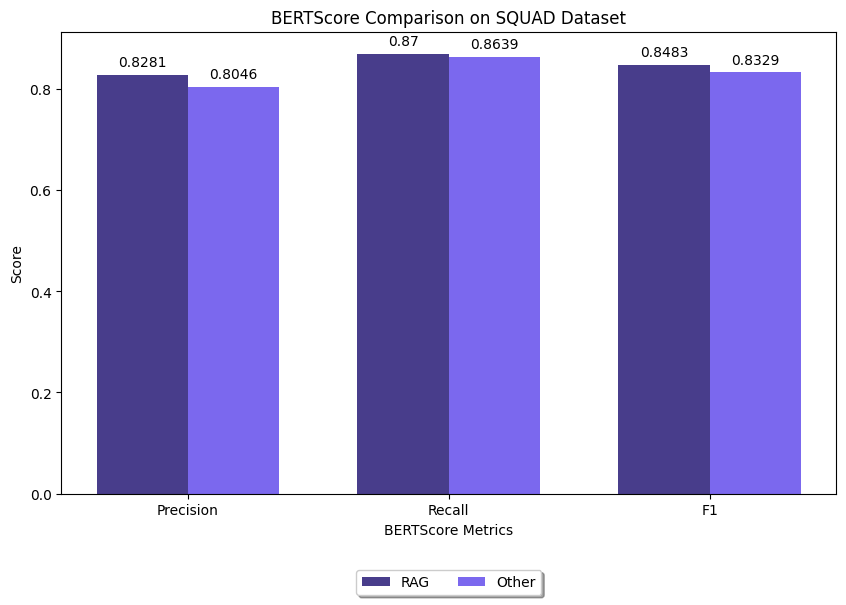

In [197]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Calculate BERTScore precision, recall, and F1-score for predictions_rag
scorer_rag = BERTScorer(model_type='roberta-large')
P_rag, R_rag, F1_rag = scorer_rag.score(predictions_rag, references)

# Calculate BERTScore precision, recall, and F1-score for predictions_other
scorer_other = BERTScorer(model_type='roberta-large')
P_other, R_other, F1_other = scorer_other.score(predictions_other, references)

def visualize_bert_score(precision_rag, recall_rag, f1_rag, precision_other, recall_other, f1_other):
    metrics = ['Precision', 'Recall', 'F1']

    scores_rag = [precision_rag.mean(), recall_rag.mean(), f1_rag.mean()]
    scores_other = [precision_other.mean(), recall_other.mean(), f1_other.mean()]

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35
    index = range(len(metrics))

    # Bars for predictions_rag
    bar1 = ax.bar(index, scores_rag, width, label='RAG', color='darkslateblue')

    # Bars for predictions_other
    bar2 = ax.bar([i + width for i in index], scores_other, width, label='Other', color='mediumslateblue')

    ax.set_title('BERTScore Comparison on SQUAD Dataset')
    ax.set_xlabel('BERTScore Metrics')
    ax.set_ylabel('Score')
    ax.set_xticks([i + width/2 for i in index])
    ax.set_xticklabels(metrics)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Annotate bars with values
    for bars in [bar1, bar2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

    plt.show()

visualize_bert_score(P_rag, R_rag, F1_rag, P_other, R_other, F1_other)